# H3 Python API

In [1]:
!pip install h3

You should consider upgrading via the 'D:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from h3 import h3
import folium

def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [3]:
h3_address = h3.geo_to_h3(24.3615593, 46.0553238, 9) # lat, lng, hex resolution
#h3_address2 = h3.geo_to_h3(67.3615593, -10.0553238, 9)
m = visualize_hexagons([h3_address])
display(m)

In [4]:
h3_address = h3.geo_to_h3(24.3615593, 46.0553238, 9) # lat, lng, hex resolution                                                                                                        
hex_center_coordinates = h3.h3_to_geo(h3_address) # array of [lat, lng]                                                                                                                  
hex_boundary = h3.h3_to_geo_boundary(h3_address) # array of arrays of [lat, lng]                                                                                                                                                                                                                                                         
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[3]), color="purple")
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[2]), color="blue", folium_map=m)
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[1]), color="green", folium_map=m)
m = visualize_hexagons(list(h3.k_ring_distances(h3_address, 4)[0]), color = "red", folium_map=m)
display(m)

In [5]:
geoJson = {'type': 'Polygon',
 'coordinates': [[[24.813318999983238, 48.4089866999972145], [ 24.7866302000007224, 48.3805436999997056 ], [24.7198061999978478, 48.3544736999993603], [ 24.7076131999975672, 48.5123436999983966 ], [24.7835871999971715, 48.5247187000021967],  [24.8151571999998453, 48.4798767000009008]]] }

polyline = geoJson['coordinates'][0]
polyline.append(polyline[0])
lat = [p[0] for p in polyline]
lng = [p[1] for p in polyline]
m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color="green")
m.add_child(my_PolyLine)

hexagons = list(h3.polyfill(geoJson, 8))
polylines = []
lat = []
lng = []
for hex in hexagons:
    polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
    # полигоны в цикл.
    outlines = [loop for polygon in polygons for loop in polygon]
    polyline = [outline + [outline[0]] for outline in outlines][0]
    lat.extend(map(lambda v:v[0],polyline))
    lng.extend(map(lambda v:v[1],polyline))
    polylines.append(polyline)
for polyline in polylines:
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color='red')
    m.add_child(my_PolyLine)
display(m)

In [6]:
lat

[24.725863410197135,
 24.72175801464317,
 24.71751493443297,
 24.71737723425837,
 24.721482323509836,
 24.725725419224588,
 24.725863410197135,
 24.753247356147227,
 24.749002298943612,
 24.748866093165052,
 24.752974654475544,
 24.75721972783309,
 24.75735622373997,
 24.753247356147227,
 24.760917170489584,
 24.756809324861244,
 24.752564458115785,
 24.752427421102396,
 24.756534960505263,
 24.760779843133207,
 24.760917170489584,
 24.79335725767586,
 24.78911183628228,
 24.788972348913536,
 24.793077992173203,
 24.79732342875976,
 24.797463206907405,
 24.79335725767586,
 24.7540617978924,
 24.749816328847317,
 24.749681038883782,
 24.75379092812311,
 24.758036413641186,
 24.758171993460678,
 24.7540617978924,
 24.749274252810494,
 24.753383478112276,
 24.75762875772744,
 24.757764795741114,
 24.753655264133673,
 24.749410000831954,
 24.749274252810494,
 24.771434114225766,
 24.76718980849463,
 24.767049907068944,
 24.77115402032519,
 24.775398341013126,
 24.77553853350181,
 24.771434

In [7]:
lng

[48.47473945005657,
 48.47198658587248,
 48.474158286162506,
 48.479082397054256,
 48.481835174637645,
 48.47966392795327,
 48.47473945005657,
 48.39269819886064,
 48.39487613438919,
 48.39980696793189,
 48.402560234089066,
 48.40038275220588,
 48.395451550496695,
 48.39269819886064,
 48.41792793473006,
 48.415174381257586,
 48.417350817008064,
 48.42228035250805,
 48.425033820162035,
 48.42285783815795,
 48.41792793473006,
 48.454750015864335,
 48.45692445887279,
 48.46185317648273,
 48.464607818787414,
 48.462433829973136,
 48.457504744636594,
 48.454750015864335,
 48.36310419294707,
 48.36528422091171,
 48.370217029174086,
 48.37297017796852,
 48.370790603564664,
 48.36585742678206,
 48.36310419294707,
 48.385013479683124,
 48.38776668738185,
 48.38558815928073,
 48.38065596985418,
 48.377902676895665,
 48.38008165859997,
 48.385013479683124,
 48.49025310737399,
 48.492424589408174,
 48.49734991281751,
 48.500104121318344,
 48.49793309338912,
 48.49300740283082,
 48.49025310737399,


In [8]:
# Данные 

In [9]:
import sys
sys.path.append('D:\Delivery\h3_predict_orders_6month')

In [10]:
import pandas as pd
df = pd.read_csv("D:\Delivery\h3_predict_orders_6month\h3_predict_orders_6month.csv")

In [11]:
dfh3 = pd.read_csv("D:\Delivery\delivery_orders_6month\delivery_orders_6month.csv")

In [12]:
# Данные широты и долготы для преобразования в хексагоны 

In [13]:
ll = ['lat','lon']

In [14]:
dfh3d = dfh3[ll]

In [15]:
dfh3d 

,lat,lon
0,26.443006,50.080817
1,24.574021,46.608757
2,21.507399,39.224191
3,24.762050,46.722209
4,21.440776,39.783394
...,...,...
6622115,24.427578,39.648272
6622116,24.476324,39.560414
6622117,24.788915,46.702935
6622118,28.426441,36.576229


In [16]:
df

,fid,operation_area,pred_date,pred_orders,resolution
0,8953736f493ffff,SA_Riyadh,2022-02-03 23:00:00.000000,0.999,9
1,8953736d613ffff,SA_Riyadh,2022-02-03 23:00:00.000000,0.666,9
2,89536326a77ffff,SA_Dammam,2022-02-03 23:00:00.000000,0.894,9
3,893e696d86fffff,SA_Tabuk,2022-02-03 23:00:00.000000,0.854,9
4,8953a9c1893ffff,SA_Jeddah_and_Mecca,2022-02-03 23:00:00.000000,1.133,9
...,...,...,...,...,...
4117395,8953a957437ffff,SA_Jeddah_and_Mecca,2021-12-11 02:00:00.000000,0.099,9
4117396,89536326b2fffff,SA_Dammam,2021-12-11 02:00:00.000000,0.490,9
4117397,895354a6987ffff,SA_Riyadh,2021-12-11 02:00:00.000000,0.146,9
4117398,8953736e14fffff,SA_Riyadh,2021-12-11 02:00:00.000000,0.073,9


In [17]:
# результат

In [18]:
dfh3

,id,creation_date,status,lat,lon
0,f468ce49-daf1-412d-875f-8c6e55b102e9,2021-12-24 09:21:18.346000,COMPLETED,26.443006,50.080817
1,de8c179f-8f99-4751-ac0c-19daa45a17df,2021-08-28 18:12:59.072000,COMPLETED,24.574021,46.608757
2,18dd6717-5c1d-4ea0-8695-baadc6db7187,2021-12-29 18:05:23.048000,COMPLETED,21.507399,39.224191
3,ca32e5a3-1916-4250-a37e-19b6f819815f,2022-01-07 18:05:18.523000,COMPLETED,24.762050,46.722209
4,8ac6eeae-59fb-433f-9365-9c83ec2c7b30,2021-12-31 19:47:39.692000,COMPLETED,21.440776,39.783394
...,...,...,...,...,...
6622115,147f317c-20ae-4d88-81cd-6e9ee5dc0e7c,2021-12-19 08:55:35.355000,CANCELLED,24.427578,39.648272
6622116,5918adb9-9beb-4398-843b-3446bbf1d526,2021-11-01 14:11:05.374000,COMPLETED,24.476324,39.560414
6622117,51acfba0-db0c-4a2a-921d-00b2998df9e7,2021-09-02 16:13:46.618000,COMPLETED,24.788915,46.702935
6622118,07db041b-7e99-4f5e-bbde-bf8cec4934aa,2021-11-12 18:01:11.384000,CANCELLED,28.426441,36.576229


In [19]:
import h3

In [20]:
l = ['fid']

In [21]:
df[l]

,fid
0,8953736f493ffff
1,8953736d613ffff
2,89536326a77ffff
3,893e696d86fffff
4,8953a9c1893ffff
...,...
4117395,8953a957437ffff
4117396,89536326b2fffff
4117397,895354a6987ffff
4117398,8953736e14fffff


In [22]:
import geopandas as gpd
from h3 import h3

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [23]:
dfh3

,id,creation_date,status,lat,lon
0,f468ce49-daf1-412d-875f-8c6e55b102e9,2021-12-24 09:21:18.346000,COMPLETED,26.443006,50.080817
1,de8c179f-8f99-4751-ac0c-19daa45a17df,2021-08-28 18:12:59.072000,COMPLETED,24.574021,46.608757
2,18dd6717-5c1d-4ea0-8695-baadc6db7187,2021-12-29 18:05:23.048000,COMPLETED,21.507399,39.224191
3,ca32e5a3-1916-4250-a37e-19b6f819815f,2022-01-07 18:05:18.523000,COMPLETED,24.762050,46.722209
4,8ac6eeae-59fb-433f-9365-9c83ec2c7b30,2021-12-31 19:47:39.692000,COMPLETED,21.440776,39.783394
...,...,...,...,...,...
6622115,147f317c-20ae-4d88-81cd-6e9ee5dc0e7c,2021-12-19 08:55:35.355000,CANCELLED,24.427578,39.648272
6622116,5918adb9-9beb-4398-843b-3446bbf1d526,2021-11-01 14:11:05.374000,COMPLETED,24.476324,39.560414
6622117,51acfba0-db0c-4a2a-921d-00b2998df9e7,2021-09-02 16:13:46.618000,COMPLETED,24.788915,46.702935
6622118,07db041b-7e99-4f5e-bbde-bf8cec4934aa,2021-11-12 18:01:11.384000,CANCELLED,28.426441,36.576229


In [43]:
# Декодирование в хексагоны

In [44]:
h3_level = 8
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.geometry.y, row.geometry.x, h3_level)
 
#incidents['h3'] = incidents.apply(lat_lng_to_h3, axis=1)

In [24]:
h3_level = 9
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.lat, row.lon, h3_level)
 
orders = dfh3d.apply(lat_lng_to_h3, axis=1)

In [25]:
orders

0          89536ec9a73ffff
1          895355da297ffff
2          8953a955133ffff
3          89537368eafffff
4          8953a938e67ffff
                ...       
6622115    89531139057ffff
6622116    8953110c17bffff
6622117    895373681d7ffff
6622118    893e696dba3ffff
6622119    8953a95284fffff
Length: 6622120, dtype: object

In [26]:
dfh3['fid'] = orders
dfh3
# результат

,id,creation_date,status,lat,lon,fid
0,f468ce49-daf1-412d-875f-8c6e55b102e9,2021-12-24 09:21:18.346000,COMPLETED,26.443006,50.080817,89536ec9a73ffff
1,de8c179f-8f99-4751-ac0c-19daa45a17df,2021-08-28 18:12:59.072000,COMPLETED,24.574021,46.608757,895355da297ffff
2,18dd6717-5c1d-4ea0-8695-baadc6db7187,2021-12-29 18:05:23.048000,COMPLETED,21.507399,39.224191,8953a955133ffff
3,ca32e5a3-1916-4250-a37e-19b6f819815f,2022-01-07 18:05:18.523000,COMPLETED,24.762050,46.722209,89537368eafffff
4,8ac6eeae-59fb-433f-9365-9c83ec2c7b30,2021-12-31 19:47:39.692000,COMPLETED,21.440776,39.783394,8953a938e67ffff
...,...,...,...,...,...,...
6622115,147f317c-20ae-4d88-81cd-6e9ee5dc0e7c,2021-12-19 08:55:35.355000,CANCELLED,24.427578,39.648272,89531139057ffff
6622116,5918adb9-9beb-4398-843b-3446bbf1d526,2021-11-01 14:11:05.374000,COMPLETED,24.476324,39.560414,8953110c17bffff
6622117,51acfba0-db0c-4a2a-921d-00b2998df9e7,2021-09-02 16:13:46.618000,COMPLETED,24.788915,46.702935,895373681d7ffff
6622118,07db041b-7e99-4f5e-bbde-bf8cec4934aa,2021-11-12 18:01:11.384000,CANCELLED,28.426441,36.576229,893e696dba3ffff


In [27]:
#df["Time"] = pd.to_timedelta(df["Time"], unit="H")
#df.set_index("Time").resample("0.01S").ffill()

In [29]:
df

,fid,operation_area,pred_date,pred_orders,resolution
0,8953736f493ffff,SA_Riyadh,2022-02-03 23:00:00.000000,0.999,9
1,8953736d613ffff,SA_Riyadh,2022-02-03 23:00:00.000000,0.666,9
2,89536326a77ffff,SA_Dammam,2022-02-03 23:00:00.000000,0.894,9
3,893e696d86fffff,SA_Tabuk,2022-02-03 23:00:00.000000,0.854,9
4,8953a9c1893ffff,SA_Jeddah_and_Mecca,2022-02-03 23:00:00.000000,1.133,9
...,...,...,...,...,...
4117395,8953a957437ffff,SA_Jeddah_and_Mecca,2021-12-11 02:00:00.000000,0.099,9
4117396,89536326b2fffff,SA_Dammam,2021-12-11 02:00:00.000000,0.490,9
4117397,895354a6987ffff,SA_Riyadh,2021-12-11 02:00:00.000000,0.146,9
4117398,8953736e14fffff,SA_Riyadh,2021-12-11 02:00:00.000000,0.073,9


In [30]:
k1 = ['pred_date','fid']
df2 = df[k1]

In [31]:
k = ['creation_date','fid']
df1 = dfh3[k]
k1 = ['pred_date','fid']
df2 = df[k1]
k4 = ['pred_date','fid','pred_orders']


In [32]:

df2

,pred_date,fid
0,2022-02-03 23:00:00.000000,8953736f493ffff
1,2022-02-03 23:00:00.000000,8953736d613ffff
2,2022-02-03 23:00:00.000000,89536326a77ffff
3,2022-02-03 23:00:00.000000,893e696d86fffff
4,2022-02-03 23:00:00.000000,8953a9c1893ffff
...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff
4117396,2021-12-11 02:00:00.000000,89536326b2fffff
4117397,2021-12-11 02:00:00.000000,895354a6987ffff
4117398,2021-12-11 02:00:00.000000,8953736e14fffff


In [33]:
df1

,creation_date,fid
0,2021-12-24 09:21:18.346000,89536ec9a73ffff
1,2021-08-28 18:12:59.072000,895355da297ffff
2,2021-12-29 18:05:23.048000,8953a955133ffff
3,2022-01-07 18:05:18.523000,89537368eafffff
4,2021-12-31 19:47:39.692000,8953a938e67ffff
...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff
6622116,2021-11-01 14:11:05.374000,8953110c17bffff
6622117,2021-09-02 16:13:46.618000,895373681d7ffff
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff


In [34]:
df1['orders'] = 1
df1

C:\Users\mucle\AppData\Local\Temp/ipykernel_7624/3148698224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['orders'] = 1


,creation_date,fid,orders
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,1
1,2021-08-28 18:12:59.072000,895355da297ffff,1
2,2021-12-29 18:05:23.048000,8953a955133ffff,1
3,2022-01-07 18:05:18.523000,89537368eafffff,1
4,2021-12-31 19:47:39.692000,8953a938e67ffff,1
...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,1
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,1
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,1
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,1


In [37]:
df1

,creation_date,fid,orders
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,1
1,2021-08-28 18:12:59.072000,895355da297ffff,1
2,2021-12-29 18:05:23.048000,8953a955133ffff,1
3,2022-01-07 18:05:18.523000,89537368eafffff,1
4,2021-12-31 19:47:39.692000,8953a938e67ffff,1
...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,1
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,1
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,1
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,1


In [ ]:
df2['time'] = df2['pred_date'].astype('datetime64[h]')

In [39]:
ssss = df1.groupby(["fid", "creation_date"], as_index=False)["orders"].count()

In [40]:

ssss1 = ssss
ssss

,fid,creation_date,orders
0,0,2021-08-03 15:41:31.830000,1
1,0,2021-08-03 16:07:58.738000,1
2,0,2021-08-03 16:31:42.539000,1
3,0,2021-08-03 16:38:45.481000,1
4,0,2021-08-03 16:39:10.453000,1
...,...,...,...
6621419,8953a9cf6c3ffff,2022-01-18 09:10:01.294000,1
6621420,8953a9cf6c3ffff,2022-01-18 09:11:21.103000,1
6621421,8953a9d8b37ffff,2021-08-21 08:05:29.340000,1
6621422,8953a9d8b8fffff,2021-10-01 21:29:22.125000,1


In [528]:
#ssss1['ts1'] = ssss1.time.values.astype(np.int64) // 10 ** 9
#ddff1 = ddff
#ddff1['ts2'] = ddff1.time.values.astype(np.int64) // 10 ** 9


In [42]:
dff1 = df2['fid'].apply(int, base=16)
#dff4 = df4['fid'].apply(int, base=16)

In [43]:
df2['fid1'] = dff1
df2

C:\Users\mucle\AppData\Local\Temp/ipykernel_7624/2230022657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fid1'] = dff1


,pred_date,fid,fid1
0,2022-02-03 23:00:00.000000,8953736f493ffff,618461233004412927
1,2022-02-03 23:00:00.000000,8953736d613ffff,618461232492707839
2,2022-02-03 23:00:00.000000,89536326a77ffff,618460113995825151
3,2022-02-03 23:00:00.000000,893e696d86fffff,618091109430591487
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,618464965934972927
...,...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff,618464937407676415
4117396,2021-12-11 02:00:00.000000,89536326b2fffff,618460114007883775
4117397,2021-12-11 02:00:00.000000,895354a6987ffff,618459117547683839
4117398,2021-12-11 02:00:00.000000,8953736e14fffff,618461232681189375


In [44]:
df2['pred_orders'] = df['pred_orders']
df2

C:\Users\mucle\AppData\Local\Temp/ipykernel_7624/2101284566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pred_orders'] = df['pred_orders']


,pred_date,fid,fid1,pred_orders
0,2022-02-03 23:00:00.000000,8953736f493ffff,618461233004412927,0.999
1,2022-02-03 23:00:00.000000,8953736d613ffff,618461232492707839,0.666
2,2022-02-03 23:00:00.000000,89536326a77ffff,618460113995825151,0.894
3,2022-02-03 23:00:00.000000,893e696d86fffff,618091109430591487,0.854
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,618464965934972927,1.133
...,...,...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff,618464937407676415,0.099
4117396,2021-12-11 02:00:00.000000,89536326b2fffff,618460114007883775,0.490
4117397,2021-12-11 02:00:00.000000,895354a6987ffff,618459117547683839,0.146
4117398,2021-12-11 02:00:00.000000,8953736e14fffff,618461232681189375,0.073


In [46]:
kk = ['pred_date','fid1','pred_orders']

ddff = df2[kk] 
ddff

,pred_date,fid1,pred_orders
0,2022-02-03 23:00:00.000000,618461233004412927,0.999
1,2022-02-03 23:00:00.000000,618461232492707839,0.666
2,2022-02-03 23:00:00.000000,618460113995825151,0.894
3,2022-02-03 23:00:00.000000,618091109430591487,0.854
4,2022-02-03 23:00:00.000000,618464965934972927,1.133
...,...,...,...
4117395,2021-12-11 02:00:00.000000,618464937407676415,0.099
4117396,2021-12-11 02:00:00.000000,618460114007883775,0.490
4117397,2021-12-11 02:00:00.000000,618459117547683839,0.146
4117398,2021-12-11 02:00:00.000000,618461232681189375,0.073


In [48]:
dfssort2 = ddff.sort_values(by = ['pred_date'], ascending = [False])
dfssort2

,pred_date,fid1,pred_orders
0,2022-02-03 23:00:00.000000,618461233004412927,0.999
2678,2022-02-03 23:00:00.000000,613961336050679807,3.193
2665,2022-02-03 23:00:00.000000,613957277627449343,0.149
2666,2022-02-03 23:00:00.000000,613957633354760191,0.111
2667,2022-02-03 23:00:00.000000,613954461160701951,0.528
...,...,...,...
4117261,2021-12-11 02:00:00.000000,618461231283961855,0.365
4117262,2021-12-11 02:00:00.000000,618460877339492351,0.392
4117263,2021-12-11 02:00:00.000000,618461232683810815,0.365
4117264,2021-12-11 02:00:00.000000,618461231261155327,1.387


In [50]:
#ssss['ntime'] = ssss['time']

In [51]:

ddff

,pred_date,fid1,pred_orders
0,2022-02-03 23:00:00.000000,618461233004412927,0.999
1,2022-02-03 23:00:00.000000,618461232492707839,0.666
2,2022-02-03 23:00:00.000000,618460113995825151,0.894
3,2022-02-03 23:00:00.000000,618091109430591487,0.854
4,2022-02-03 23:00:00.000000,618464965934972927,1.133
...,...,...,...
4117395,2021-12-11 02:00:00.000000,618464937407676415,0.099
4117396,2021-12-11 02:00:00.000000,618460114007883775,0.490
4117397,2021-12-11 02:00:00.000000,618459117547683839,0.146
4117398,2021-12-11 02:00:00.000000,618461232681189375,0.073


In [52]:
ssss


,fid,creation_date,orders
0,0,2021-08-03 15:41:31.830000,1
1,0,2021-08-03 16:07:58.738000,1
2,0,2021-08-03 16:31:42.539000,1
3,0,2021-08-03 16:38:45.481000,1
4,0,2021-08-03 16:39:10.453000,1
...,...,...,...
6621419,8953a9cf6c3ffff,2022-01-18 09:10:01.294000,1
6621420,8953a9cf6c3ffff,2022-01-18 09:11:21.103000,1
6621421,8953a9d8b37ffff,2021-08-21 08:05:29.340000,1
6621422,8953a9d8b8fffff,2021-10-01 21:29:22.125000,1


In [55]:
ssss1 = ssss1['fid'].apply(int, base=16)

In [56]:
ssss1

0                           0
1                           0
2                           0
3                           0
4                           0
                  ...        
6621419    618464969662660607
6621420    618464969662660607
6621421    618464972153290751
6621422    618464972159057919
6621423    618464972160892927
Name: fid, Length: 6621424, dtype: int64

In [58]:
ssss['fid'] = ssss1
ssss

,fid,creation_date,orders
0,0,2021-08-03 15:41:31.830000,1
1,0,2021-08-03 16:07:58.738000,1
2,0,2021-08-03 16:31:42.539000,1
3,0,2021-08-03 16:38:45.481000,1
4,0,2021-08-03 16:39:10.453000,1
...,...,...,...
6621419,618464969662660607,2022-01-18 09:10:01.294000,1
6621420,618464969662660607,2022-01-18 09:11:21.103000,1
6621421,618464972153290751,2021-08-21 08:05:29.340000,1
6621422,618464972159057919,2021-10-01 21:29:22.125000,1


In [59]:
ssss['time'] = ssss['creation_date'].astype('datetime64[h]')

In [60]:
ssss

,fid,creation_date,orders,time
0,0,2021-08-03 15:41:31.830000,1,2021-08-03 15:00:00
1,0,2021-08-03 16:07:58.738000,1,2021-08-03 16:00:00
2,0,2021-08-03 16:31:42.539000,1,2021-08-03 16:00:00
3,0,2021-08-03 16:38:45.481000,1,2021-08-03 16:00:00
4,0,2021-08-03 16:39:10.453000,1,2021-08-03 16:00:00
...,...,...,...,...
6621419,618464969662660607,2022-01-18 09:10:01.294000,1,2022-01-18 09:00:00
6621420,618464969662660607,2022-01-18 09:11:21.103000,1,2022-01-18 09:00:00
6621421,618464972153290751,2021-08-21 08:05:29.340000,1,2021-08-21 08:00:00
6621422,618464972159057919,2021-10-01 21:29:22.125000,1,2021-10-01 21:00:00


In [62]:
f = ['fid','orders','time']

ssss4 = ssss[f]

In [63]:
ssss1 = ssss4.groupby(["fid", "time"], as_index=False)["orders"].count()

In [64]:
ssss1

,fid,time,orders
0,0,2021-08-03 15:00:00,1
1,0,2021-08-03 16:00:00,10
2,0,2021-08-03 17:00:00,2
3,0,2021-08-03 18:00:00,3
4,0,2021-08-03 19:00:00,5
...,...,...,...
3240792,618464969662660607,2022-01-17 18:00:00,1
3240793,618464969662660607,2022-01-18 09:00:00,2
3240794,618464972153290751,2021-08-21 08:00:00,1
3240795,618464972159057919,2021-10-01 21:00:00,1


In [65]:
ddff

,pred_date,fid1,pred_orders
0,2022-02-03 23:00:00.000000,618461233004412927,0.999
1,2022-02-03 23:00:00.000000,618461232492707839,0.666
2,2022-02-03 23:00:00.000000,618460113995825151,0.894
3,2022-02-03 23:00:00.000000,618091109430591487,0.854
4,2022-02-03 23:00:00.000000,618464965934972927,1.133
...,...,...,...
4117395,2021-12-11 02:00:00.000000,618464937407676415,0.099
4117396,2021-12-11 02:00:00.000000,618460114007883775,0.490
4117397,2021-12-11 02:00:00.000000,618459117547683839,0.146
4117398,2021-12-11 02:00:00.000000,618461232681189375,0.073


In [66]:
ddff['pred_date'] = ddff['pred_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_7624/134246715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddff['pred_date'] = ddff['pred_date'].astype('datetime64[h]')


In [67]:
merged_df11pp = ssss1.merge(ddff, how='inner', left_on=["time", "fid"], right_on=["pred_date","fid1"])

In [68]:
merged_df11pp 

,fid,time,orders,pred_date,fid1,pred_orders
0,617777515360944127,2021-12-11 09:00:00,1,2021-12-11 09:00:00,617777515360944127,0.088
1,617777515360944127,2021-12-11 15:00:00,1,2021-12-11 15:00:00,617777515360944127,0.264
2,617777515360944127,2021-12-11 16:00:00,1,2021-12-11 16:00:00,617777515360944127,0.440
3,617777515360944127,2021-12-12 18:00:00,1,2021-12-12 18:00:00,617777515360944127,0.351
4,617777515360944127,2021-12-13 12:00:00,1,2021-12-13 12:00:00,617777515360944127,0.236
...,...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,2022-01-10 16:00:00,618464969645883391,0.002
680917,618464969647194111,2022-01-12 18:00:00,1,2022-01-12 18:00:00,618464969647194111,0.006
680918,618464969647456255,2021-12-13 16:00:00,2,2021-12-13 16:00:00,618464969647456255,0.064
680919,618464969647456255,2022-01-13 19:00:00,1,2022-01-13 19:00:00,618464969647456255,0.001


In [ ]:
merged_df11pp ############################################################################################################

In [70]:
dfssort = merged_df11pp.sort_values(by = ['time'], ascending = [False])

In [71]:
dfssort = merged_df11pp.sort_values(by = ['pred_date'], ascending = [False])

In [72]:
dfssort

,fid,time,orders,pred_date,fid1,pred_orders
142226,618454484461027327,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618454484461027327,0.124
98828,618454471905902591,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618454471905902591,2.604
595239,618464937013673983,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618464937013673983,1.133
4670,617795438535770111,2022-02-03 07:00:00,1,2022-02-03 07:00:00,617795438535770111,0.246
382010,618461231084732415,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618461231084732415,0.222
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618454472555757567,2.354
129856,618454483966623743,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618454483966623743,5.457
270938,618459198254481407,2021-12-11 02:00:00,2,2021-12-11 02:00:00,618459198254481407,1.168
185077,618457067768512511,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618457067768512511,3.100


In [74]:
import numpy as np; 
np.random.seed(0)
import seaborn as sns; 

In [75]:
merged_df2222= dfssort['pred_orders'].apply(np.ceil)

In [76]:
merged_df2222

142226    1.0
98828     3.0
595239    2.0
4670      1.0
382010    1.0
         ... 
121420    3.0
129856    6.0
270938    2.0
185077    4.0
649823    3.0
Name: pred_orders, Length: 680921, dtype: float64

In [77]:
dfssort['pred_orders'] = merged_df2222

In [78]:
dfssort

,fid,time,orders,pred_date,fid1,pred_orders
142226,618454484461027327,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618454484461027327,1.0
98828,618454471905902591,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618454471905902591,3.0
595239,618464937013673983,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618464937013673983,2.0
4670,617795438535770111,2022-02-03 07:00:00,1,2022-02-03 07:00:00,617795438535770111,1.0
382010,618461231084732415,2022-02-03 07:00:00,1,2022-02-03 07:00:00,618461231084732415,1.0
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618454472555757567,3.0
129856,618454483966623743,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618454483966623743,6.0
270938,618459198254481407,2021-12-11 02:00:00,2,2021-12-11 02:00:00,618459198254481407,2.0
185077,618457067768512511,2021-12-11 02:00:00,1,2021-12-11 02:00:00,618457067768512511,4.0


In [79]:
dfssort['orders'] = dfssort['orders'].astype(float)

In [82]:
dfssort

,fid,time,orders,pred_date,fid1,pred_orders
142226,618454484461027327,2022-02-03 07:00:00,1.0,2022-02-03 07:00:00,618454484461027327,1.0
98828,618454471905902591,2022-02-03 07:00:00,1.0,2022-02-03 07:00:00,618454471905902591,3.0
595239,618464937013673983,2022-02-03 07:00:00,1.0,2022-02-03 07:00:00,618464937013673983,2.0
4670,617795438535770111,2022-02-03 07:00:00,1.0,2022-02-03 07:00:00,617795438535770111,1.0
382010,618461231084732415,2022-02-03 07:00:00,1.0,2022-02-03 07:00:00,618461231084732415,1.0
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1.0,2021-12-11 02:00:00,618454472555757567,3.0
129856,618454483966623743,2021-12-11 02:00:00,1.0,2021-12-11 02:00:00,618454483966623743,6.0
270938,618459198254481407,2021-12-11 02:00:00,2.0,2021-12-11 02:00:00,618459198254481407,2.0
185077,618457067768512511,2021-12-11 02:00:00,1.0,2021-12-11 02:00:00,618457067768512511,4.0


In [84]:
dfssort.to_csv('orders.csv')

In [81]:
y_true = dfssort['pred_orders']
y_pred = dfssort['orders']

In [499]:
merged_df11ww = ssss.merge(ddff, how='inner', left_on=["ntime", "fidn"], right_on=["time","fid1"])

In [500]:
merged_df11ww

,fidn,time_x,orders,ntime,time_y,fid1,pred_orders
0,617777515360944127,2021-12-11 09:00:00,1,2021-12-11 09:00:00,2021-12-11 09:00:00,617777515360944127,0.088
1,617777515360944127,2021-12-11 15:00:00,1,2021-12-11 15:00:00,2021-12-11 15:00:00,617777515360944127,0.264
2,617777515360944127,2021-12-11 16:00:00,1,2021-12-11 16:00:00,2021-12-11 16:00:00,617777515360944127,0.440
3,617777515360944127,2021-12-12 18:00:00,1,2021-12-12 18:00:00,2021-12-12 18:00:00,617777515360944127,0.351
4,617777515360944127,2021-12-13 12:00:00,1,2021-12-13 12:00:00,2021-12-13 12:00:00,617777515360944127,0.236
...,...,...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,2022-01-10 16:00:00,2022-01-10 16:00:00,618464969645883391,0.002
680917,618464969647194111,2022-01-12 18:00:00,1,2022-01-12 18:00:00,2022-01-12 18:00:00,618464969647194111,0.006
680918,618464969647456255,2021-12-13 16:00:00,2,2021-12-13 16:00:00,2021-12-13 16:00:00,618464969647456255,0.064
680919,618464969647456255,2022-01-13 19:00:00,1,2022-01-13 19:00:00,2022-01-13 19:00:00,618464969647456255,0.001


In [ ]:
#########################################################

In [495]:
merged_df11

,fidn,time,orders,fid1,pred_orders
0,617777515360944127,2021-12-11 09:00:00,1,617777515360944127,0.088
1,617777515360944127,2021-12-11 15:00:00,1,617777515360944127,0.264
2,617777515360944127,2021-12-11 16:00:00,1,617777515360944127,0.440
3,617777515360944127,2021-12-12 18:00:00,1,617777515360944127,0.351
4,617777515360944127,2021-12-13 12:00:00,1,617777515360944127,0.236
...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,618464969645883391,0.002
680917,618464969647194111,2022-01-12 18:00:00,1,618464969647194111,0.006
680918,618464969647456255,2021-12-13 16:00:00,2,618464969647456255,0.064
680919,618464969647456255,2022-01-13 19:00:00,1,618464969647456255,0.001


In [403]:
merged_df1111 = merged_df11.fillna(0)

In [420]:
merged_df1111

,fidn,time,orders,fid1,pred_orders
0,617777515360944127,2021-12-11 09:00:00,1,617777515360944127,0.088
1,617777515360944127,2021-12-11 15:00:00,1,617777515360944127,0.264
2,617777515360944127,2021-12-11 16:00:00,1,617777515360944127,0.440
3,617777515360944127,2021-12-12 18:00:00,1,617777515360944127,0.351
4,617777515360944127,2021-12-13 12:00:00,1,617777515360944127,0.236
...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,618464969645883391,0.002
680917,618464969647194111,2022-01-12 18:00:00,1,618464969647194111,0.006
680918,618464969647456255,2021-12-13 16:00:00,2,618464969647456255,0.064
680919,618464969647456255,2022-01-13 19:00:00,1,618464969647456255,0.001


In [422]:
merged_df2222= merged_df1111['pred_orders'].apply(np.ceil)
merged_df2222

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
680916    1.0
680917    1.0
680918    1.0
680919    1.0
680920    1.0
Name: pred_orders, Length: 680921, dtype: float64

In [423]:
merged_df1111['pred_orders1'] = merged_df2222

In [424]:
y_true = merged_df1111['pred_orders1']
y_pred = merged_df1111['orders']


In [428]:
merged_df1111

,fidn,time,orders,fid1,pred_orders,pred_orders1
0,617777515360944127,2021-12-11 09:00:00,1,617777515360944127,0.088,1.0
1,617777515360944127,2021-12-11 15:00:00,1,617777515360944127,0.264,1.0
2,617777515360944127,2021-12-11 16:00:00,1,617777515360944127,0.440,1.0
3,617777515360944127,2021-12-12 18:00:00,1,617777515360944127,0.351,1.0
4,617777515360944127,2021-12-13 12:00:00,1,617777515360944127,0.236,1.0
...,...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,618464969645883391,0.002,1.0
680917,618464969647194111,2022-01-12 18:00:00,1,618464969647194111,0.006,1.0
680918,618464969647456255,2021-12-13 16:00:00,2,618464969647456255,0.064,1.0
680919,618464969647456255,2022-01-13 19:00:00,1,618464969647456255,0.001,1.0


In [460]:
dfssort = merged_df1111.sort_values(by = ['time'], ascending = [False])
dfssort

,fidn,time,orders,fid1,pred_orders,pred_orders1
142226,618454484461027327,2022-02-03 07:00:00,1,618454484461027327,0.124,1.0
98828,618454471905902591,2022-02-03 07:00:00,1,618454471905902591,2.604,3.0
595239,618464937013673983,2022-02-03 07:00:00,1,618464937013673983,1.133,2.0
4670,617795438535770111,2022-02-03 07:00:00,1,617795438535770111,0.246,1.0
382010,618461231084732415,2022-02-03 07:00:00,1,618461231084732415,0.222,1.0
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1,618454472555757567,2.354,3.0
129856,618454483966623743,2021-12-11 02:00:00,1,618454483966623743,5.457,6.0
270938,618459198254481407,2021-12-11 02:00:00,2,618459198254481407,1.168,2.0
185077,618457067768512511,2021-12-11 02:00:00,1,618457067768512511,3.100,4.0


In [462]:
dfssort['orders'] = dfssort['orders'].astype(float)
dfssort

,fidn,time,orders,fid1,pred_orders,pred_orders1
142226,618454484461027327,2022-02-03 07:00:00,1.0,618454484461027327,0.124,1.0
98828,618454471905902591,2022-02-03 07:00:00,1.0,618454471905902591,2.604,3.0
595239,618464937013673983,2022-02-03 07:00:00,1.0,618464937013673983,1.133,2.0
4670,617795438535770111,2022-02-03 07:00:00,1.0,617795438535770111,0.246,1.0
382010,618461231084732415,2022-02-03 07:00:00,1.0,618461231084732415,0.222,1.0
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1.0,618454472555757567,2.354,3.0
129856,618454483966623743,2021-12-11 02:00:00,1.0,618454483966623743,5.457,6.0
270938,618459198254481407,2021-12-11 02:00:00,2.0,618459198254481407,1.168,2.0
185077,618457067768512511,2021-12-11 02:00:00,1.0,618457067768512511,3.100,4.0


In [ ]:
pp = ['fidn', 'time', 'orders', 'fid1', 'pred_orders', 'pred_orders1']

dfssorty = 

In [502]:
dfssort2

,time,fid1,pred_orders
0,2022-02-03 23:00:00,618461233004412927,0.999
2678,2022-02-03 23:00:00,613961336050679807,3.193
2665,2022-02-03 23:00:00,613957277627449343,0.149
2666,2022-02-03 23:00:00,613957633354760191,0.111
2667,2022-02-03 23:00:00,613954461160701951,0.528
...,...,...,...
4117261,2021-12-11 02:00:00,618461231283961855,0.365
4117262,2021-12-11 02:00:00,618460877339492351,0.392
4117263,2021-12-11 02:00:00,618461232683810815,0.365
4117264,2021-12-11 02:00:00,618461231261155327,1.387


In [512]:
dfssort2['time1'] = dfssort2['time']


In [508]:
#ttconcat = pd.concat([dfssort, dfssort2.reindex(dfssort.index)], axis=1)
#ttconcat
#ffreal = ttconcat.loc[(ttconcat['time'] == ttconcat['time1']) & (ttconcat['fid1'] == ttconcat['fid1'])]

In [472]:
y_true = dfssort['pred_orders1']
y_pred = dfssort['orders']

In [473]:
from numpy import array
from permetrics.regression import Metrics

## 1-D array
y_true1 = y_true.to_numpy()
y_pred1 = y_pred.to_numpy()
obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array



0.74086


D:\anaconda3\lib\site-packages\permetrics\regression.py:244: RuntimeWarning: divide by zero encountered in true_divide
  return round(mean(arctan(divide(abs(y_true - y_pred), y_true))), decimal)


In [474]:
from numpy import array
from permetrics.regression import Metrics

y_true1 = y_true.to_numpy()
y_pred1 = y_pred.to_numpy()

obj1 = Metrics(y_true1, y_pred1)
print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=5))




0.8332


In [475]:
from numpy import array
from permetrics.regression import Metrics

obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_absolute_scaled_error(clean=True, decimal=5))

2.50849


In [476]:
from numpy import array
from permetrics.regression import Metrics

obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_absolute_percentage_error(clean=True, decimal=5))

inf


D:\anaconda3\lib\site-packages\permetrics\regression.py:218: RuntimeWarning: divide by zero encountered in true_divide
  temp = abs(y_true - y_pred) / abs(y_true)


In [477]:
from numpy import array
from permetrics.regression import Metrics

## 1-D array


obj1 = Metrics(y_true1, y_pred1)
print(obj1.root_mean_squared_error(clean=True, decimal=5))

2.52982


In [478]:
from numpy import array
from permetrics.regression import Metrics



obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_absolute_error(clean=True, decimal=5))

1.44996


In [438]:
merged_df1111

,fidn,time,orders,fid1,pred_orders,pred_orders1
0,617777515360944127,2021-12-11 09:00:00,1,617777515360944127,0.088,1.0
1,617777515360944127,2021-12-11 15:00:00,1,617777515360944127,0.264,1.0
2,617777515360944127,2021-12-11 16:00:00,1,617777515360944127,0.440,1.0
3,617777515360944127,2021-12-12 18:00:00,1,617777515360944127,0.351,1.0
4,617777515360944127,2021-12-13 12:00:00,1,617777515360944127,0.236,1.0
...,...,...,...,...,...,...
680916,618464969645883391,2022-01-10 16:00:00,1,618464969645883391,0.002,1.0
680917,618464969647194111,2022-01-12 18:00:00,1,618464969647194111,0.006,1.0
680918,618464969647456255,2021-12-13 16:00:00,2,618464969647456255,0.064,1.0
680919,618464969647456255,2022-01-13 19:00:00,1,618464969647456255,0.001,1.0


In [479]:
ss = ['orders', 'pred_orders1']
ss = dfssort[ss]

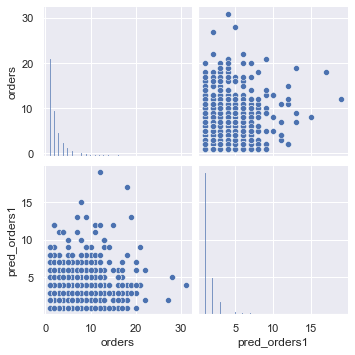

In [480]:
import numpy as np; 
np.random.seed(0)
import seaborn as sns; 


sns.pairplot(ss[0:10000])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                 2.961e+04
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:30:11   Log-Likelihood:            -1.4743e+06
No. Observations:              680921   AIC:                         2.949e+06
Df Residuals:                  680919   BIC:                         2.949e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8261      0.004    510.577   

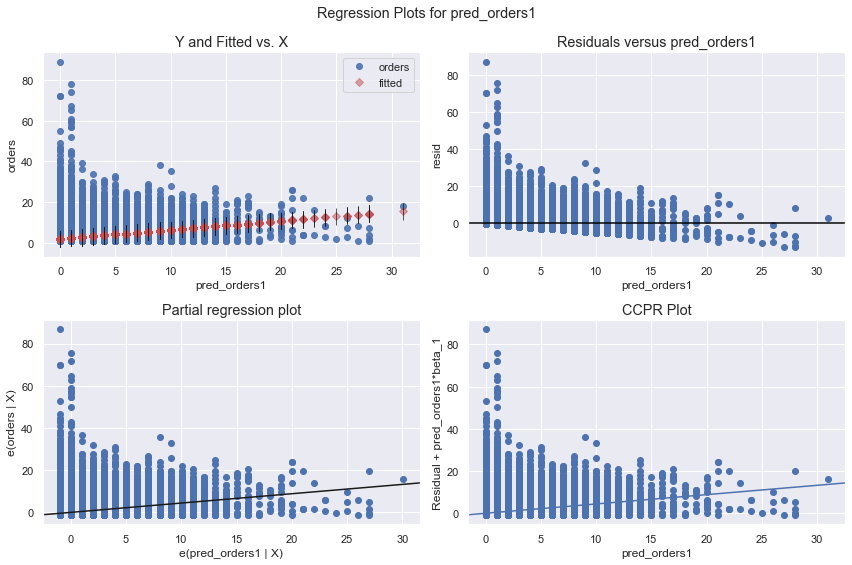

In [481]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('orders ~ pred_orders1', data = dfssort).fit()

#view model summary
print(model.summary())
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pred_orders1', fig=fig)

In [ ]:
sns.pairplot(tt[0:1000])
plt.show()

In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pred_orders', fig=fig)

In [ ]:
ss = ['orders', 'pred_orders1']

In [449]:
ss['orders'] = ss['orders'].astype(float)
ss['pred_orders1'] = ss['pred_orders1'].astype(float)

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/2758510677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['orders'] = ss['orders'].astype(float)
C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/2758510677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['pred_orders1'] = ss['pred_orders1'].astype(float)


In [450]:
ss

,orders,pred_orders1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
680916,1.0,1.0
680917,1.0,1.0
680918,2.0,1.0
680919,1.0,1.0


In [482]:
y_true = ss['orders']
y_pred = ss['pred_orders1'] 

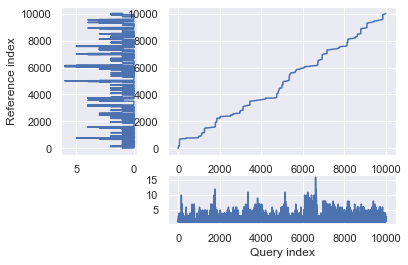

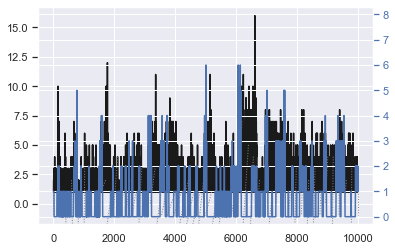

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


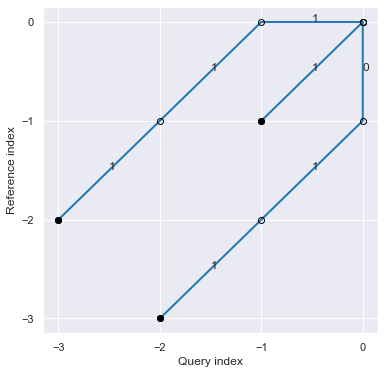

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [452]:
import numpy as np

s11 = y_true[0:10000]
s22 = y_pred[0:10000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

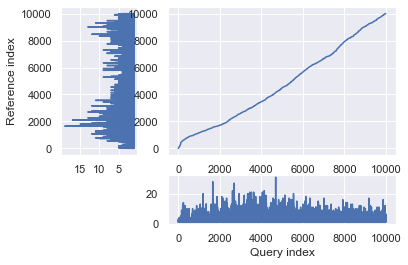

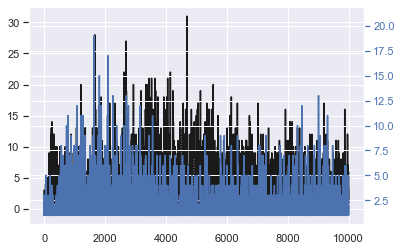

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


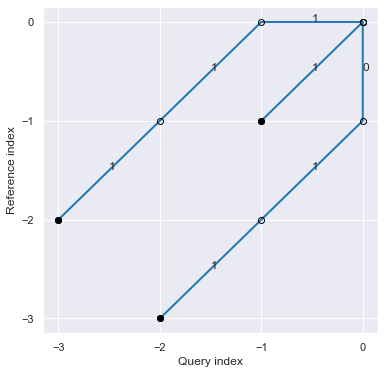

,fidn,time,orders,fid1,pred_orders,pred_orders1
142226,618454484461027327,2022-02-03 07:00:00,1.0,618454484461027327,0.124,1.0
98828,618454471905902591,2022-02-03 07:00:00,1.0,618454471905902591,2.604,3.0
595239,618464937013673983,2022-02-03 07:00:00,1.0,618464937013673983,1.133,2.0
4670,617795438535770111,2022-02-03 07:00:00,1.0,617795438535770111,0.246,1.0
382010,618461231084732415,2022-02-03 07:00:00,1.0,618461231084732415,0.222,1.0
...,...,...,...,...,...,...
121420,618454472555757567,2021-12-11 02:00:00,1.0,618454472555757567,2.354,3.0
129856,618454483966623743,2021-12-11 02:00:00,1.0,618454483966623743,5.457,6.0
270938,618459198254481407,2021-12-11 02:00:00,2.0,618459198254481407,1.168,2.0
185077,618457067768512511,2021-12-11 02:00:00,1.0,618457067768512511,3.100,4.0


In [483]:
import numpy as np

s11 = y_true[0:10000]
s22 = y_pred[0:10000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()


dfssort

In [ ]:
#######################################################
#####################################################
#######################################################
#######################################################

In [386]:
g = ['fid','time']
df2 = df2[g]
df2

,fid,time
0,8953736f493ffff,2022-02-03 23:00:00
1,8953736d613ffff,2022-02-03 23:00:00
2,89536326a77ffff,2022-02-03 23:00:00
3,893e696d86fffff,2022-02-03 23:00:00
4,8953a9c1893ffff,2022-02-03 23:00:00
...,...,...
4117395,8953a957437ffff,2021-12-11 02:00:00
4117396,89536326b2fffff,2021-12-11 02:00:00
4117397,895354a6987ffff,2021-12-11 02:00:00
4117398,8953736e14fffff,2021-12-11 02:00:00


In [ ]:
merged_df1 = df2.merge(df11, how='inner', left_on=["time", "fid"], right_on=["time","fid"])

In [383]:
df2['time'] = df2['pred_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/1124085559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time'] = df2['pred_date'].astype('datetime64[h]')


In [ ]:
ssss = df1.groupby(["fidn", "time"], as_index=False)["orders"].count()

In [355]:
fffff = df1.groupby(by=["orders"]).sum()

In [328]:
df1['time'] = df1['creation_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/2599981011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = df1['creation_date'].astype('datetime64[h]')


In [334]:
df2['time1'] = df2['pred_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/3803694926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time1'] = df2['pred_date'].astype('datetime64[h]')


In [340]:
df2['time'] = df2['time1']

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/1672571999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time'] = df2['time1']


In [347]:
df2

,pred_date,fid,time1,time
0,2022-02-03 23:00:00.000000,8953736f493ffff,2022-02-03 23:00:00,2022-02-03 23:00:00
1,2022-02-03 23:00:00.000000,8953736d613ffff,2022-02-03 23:00:00,2022-02-03 23:00:00
2,2022-02-03 23:00:00.000000,89536326a77ffff,2022-02-03 23:00:00,2022-02-03 23:00:00
3,2022-02-03 23:00:00.000000,893e696d86fffff,2022-02-03 23:00:00,2022-02-03 23:00:00
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,2022-02-03 23:00:00,2022-02-03 23:00:00
...,...,...,...,...
3999995,2021-12-12 13:00:00.000000,875354b69ffffff,2021-12-12 13:00:00,2021-12-12 13:00:00
3999996,2021-12-12 13:00:00.000000,8853736f3bfffff,2021-12-12 13:00:00,2021-12-12 13:00:00
3999997,2021-12-12 13:00:00.000000,87537369effffff,2021-12-12 13:00:00,2021-12-12 13:00:00
3999998,2021-12-12 13:00:00.000000,875363261ffffff,2021-12-12 13:00:00,2021-12-12 13:00:00


In [348]:
df1

,creation_date,fid,creation_date_m,fidn,time
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,2021-12-24 09:00:00,618460913664786431,2021-12-24 09:00:00
1,2021-08-28 18:12:59.072000,895355da297ffff,2021-08-28 18:00:00,618459200109412351,2021-08-28 18:00:00
2,2021-12-29 18:05:23.048000,8953a955133ffff,2021-12-29 18:00:00,618464936820211711,2021-12-29 18:00:00
3,2022-01-07 18:05:18.523000,89537368eafffff,2022-01-07 18:00:00,618461231294971903,2022-01-07 18:00:00
4,2021-12-31 19:47:39.692000,8953a938e67ffff,2021-12-31 19:00:00,618464929257095167,2021-12-31 19:00:00
...,...,...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,2021-12-19 08:00:00,618454483929137151,2021-12-19 08:00:00
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,2021-11-01 14:00:00,618454471868678143,2021-11-01 14:00:00
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,2021-09-02 16:00:00,618461231079489535,2021-09-02 16:00:00
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,2021-11-12 18:00:00,618091109484331007,2021-11-12 18:00:00


In [349]:
ffreal = df1111.loc[(df2['time'] == df11['time']) & (df2['fid'] == df11['fid'])]

In [350]:
ffreal

,creation_date,fid,creation_date_m,fidn,time


In [335]:
merged_df = df2.merge(df11, how='inner', left_on=["time1", "fid"], right_on=["time","fid"])

In [341]:
merged_df1 = df2.merge(df11, how='inner', left_on=["time", "fid"], right_on=["time","fid"])

In [351]:
merged_df1

,pred_date,fid,time1,time,creation_date,creation_date_m,fidn
0,2022-02-03 07:00:00.000000,8953a9ce427ffff,2022-02-03 07:00:00,2022-02-03 07:00:00,2022-02-03 07:02:16.618000,2022-02-03 07:00:00,618464969350447103
1,2022-02-03 07:00:00.000000,89536324903ffff,2022-02-03 07:00:00,2022-02-03 07:00:00,2022-02-03 07:04:01.347000,2022-02-03 07:00:00,618460113434574847
2,2022-02-03 07:00:00.000000,89537369047ffff,2022-02-03 07:00:00,2022-02-03 07:00:00,2022-02-03 07:03:34.888000,2022-02-03 07:00:00,618461231321710591
3,2022-02-03 07:00:00.000000,8953110d11bffff,2022-02-03 07:00:00,2022-02-03 07:00:00,2022-02-03 07:03:45.655000,2022-02-03 07:00:00,618454472130822143
4,2022-02-03 07:00:00.000000,895354a597bffff,2022-02-03 07:00:00,2022-02-03 07:00:00,2022-02-03 07:05:24.046000,2022-02-03 07:00:00,618459117278461951
...,...,...,...,...,...,...,...
906767,2021-12-12 13:00:00.000000,895373685abffff,2021-12-12 13:00:00,2021-12-12 13:00:00,2021-12-12 13:30:12.520000,2021-12-12 13:00:00,618461231143714815
906768,2021-12-12 13:00:00.000000,8953736a2b3ffff,2021-12-12 13:00:00,2021-12-12 13:00:00,2021-12-12 13:21:35.401000,2021-12-12 13:00:00,618461231630778367
906769,2021-12-12 13:00:00.000000,8953a95558bffff,2021-12-12 13:00:00,2021-12-12 13:00:00,2021-12-12 13:04:55.539000,2021-12-12 13:00:00,618464936893087743
906770,2021-12-12 13:00:00.000000,895336d2d33ffff,2021-12-12 13:00:00,2021-12-12 13:00:00,2021-12-12 13:47:12.023000,2021-12-12 13:00:00,618457067836145663


In [336]:
merged_df

,pred_date,fid,time1,creation_date,creation_date_m,fidn,time
0,2022-02-03 07:00:00.000000,8953a9ce427ffff,2022-02-03 07:00:00,2022-02-03 07:02:16.618000,2022-02-03 07:00:00,618464969350447103,2022-02-03 07:00:00
1,2022-02-03 07:00:00.000000,89536324903ffff,2022-02-03 07:00:00,2022-02-03 07:04:01.347000,2022-02-03 07:00:00,618460113434574847,2022-02-03 07:00:00
2,2022-02-03 07:00:00.000000,89537369047ffff,2022-02-03 07:00:00,2022-02-03 07:03:34.888000,2022-02-03 07:00:00,618461231321710591,2022-02-03 07:00:00
3,2022-02-03 07:00:00.000000,8953110d11bffff,2022-02-03 07:00:00,2022-02-03 07:03:45.655000,2022-02-03 07:00:00,618454472130822143,2022-02-03 07:00:00
4,2022-02-03 07:00:00.000000,895354a597bffff,2022-02-03 07:00:00,2022-02-03 07:05:24.046000,2022-02-03 07:00:00,618459117278461951,2022-02-03 07:00:00
...,...,...,...,...,...,...,...
906767,2021-12-12 13:00:00.000000,895373685abffff,2021-12-12 13:00:00,2021-12-12 13:30:12.520000,2021-12-12 13:00:00,618461231143714815,2021-12-12 13:00:00
906768,2021-12-12 13:00:00.000000,8953736a2b3ffff,2021-12-12 13:00:00,2021-12-12 13:21:35.401000,2021-12-12 13:00:00,618461231630778367,2021-12-12 13:00:00
906769,2021-12-12 13:00:00.000000,8953a95558bffff,2021-12-12 13:00:00,2021-12-12 13:04:55.539000,2021-12-12 13:00:00,618464936893087743,2021-12-12 13:00:00
906770,2021-12-12 13:00:00.000000,895336d2d33ffff,2021-12-12 13:00:00,2021-12-12 13:47:12.023000,2021-12-12 13:00:00,618457067836145663,2021-12-12 13:00:00


In [318]:
df2 = df2[0:4000000]

In [332]:
df11 = df1[0:4000000]

In [343]:
df1111 = df11

In [324]:
ffrealdd = df11.loc[(df2['fid'] == df11['fid'])]

In [325]:
ffrealdd

,creation_date,fid,creation_date_m,fidn
1564,2022-01-30 18:45:41.194000,89536e4032fffff,2022-01-30 18:00:00,618460876767231999
6239,2021-09-29 14:05:51.690000,895336d7157ffff,2021-09-29 14:00:00,618457068979355647
26176,2021-12-04 13:50:21.447000,895336d759bffff,2021-12-04 13:00:00,618457069050920959
28564,2021-10-08 14:01:31.746000,89537361943ffff,2021-10-08 14:00:00,618461229324959743
36044,2021-11-04 09:07:29.668000,8953a944617ffff,2021-11-04 09:00:00,618464932338860031
...,...,...,...,...
3952923,2021-11-08 15:11:27.140000,8953a9cd86fffff,2021-11-08 15:00:00,618464969153839103
3971096,2022-01-12 19:11:56.493000,8953a9558cbffff,2022-01-12 19:00:00,618464936947613695
3973378,2021-08-11 06:39:11.510000,895354b4d77ffff,2021-08-11 06:00:00,618459121371840511
3974424,2021-12-18 15:30:49.062000,89531139057ffff,2021-12-18 15:00:00,618454483929137151


In [51]:
df4 = df[k4]
df4

,pred_date,fid,pred_orders
0,2022-02-03 23:00:00.000000,8953736f493ffff,0.999
1,2022-02-03 23:00:00.000000,8953736d613ffff,0.666
2,2022-02-03 23:00:00.000000,89536326a77ffff,0.894
3,2022-02-03 23:00:00.000000,893e696d86fffff,0.854
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,1.133
...,...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff,0.099
4117396,2021-12-11 02:00:00.000000,89536326b2fffff,0.490
4117397,2021-12-11 02:00:00.000000,895354a6987ffff,0.146
4117398,2021-12-11 02:00:00.000000,8953736e14fffff,0.073


In [ ]:
######## Pivot table для создание параллельной системы прогнозирования

In [128]:
table = pd.pivot_table(df4[0:1000000], values='pred_orders', index=['pred_date'],
                    columns=['fid'])
table

fid,872c96089ffffff,872c960c4ffffff,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,...,8953a9ce3c7ffff,8953a9ce3d3ffff,8953a9ce3d7ffff,8953a9ce427ffff,8953a9ce4cfffff,8953a9ce553ffff,8953a9cf24bffff,8953a9cf593ffff,8953a9cf59bffff,8953a9cf6b3ffff
pred_date,,,,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-19 13:00:00.000000,NaN,NaN,0.268,NaN,0.268,0.536,NaN,NaN,NaN,NaN,...,0.170,NaN,0.595,NaN,0.595,NaN,0.765,0.170,NaN,NaN
2022-01-19 14:00:00.000000,0.268,NaN,0.268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.085,0.085,0.340,NaN,0.595,0.085,1.020,0.255,NaN,NaN
2022-01-19 15:00:00.000000,0.670,NaN,0.402,NaN,0.268,0.268,NaN,NaN,NaN,NaN,...,0.085,NaN,0.680,NaN,0.510,0.085,0.680,0.085,NaN,NaN
2022-01-19 16:00:00.000000,0.402,NaN,0.134,NaN,0.670,0.134,NaN,NaN,NaN,NaN,...,0.085,0.085,0.850,0.170,0.255,NaN,0.425,0.170,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 19:00:00.000000,1.392,NaN,1.392,0.348,0.348,2.436,NaN,NaN,NaN,NaN,...,0.309,NaN,1.545,NaN,0.721,0.206,0.824,0.412,NaN,NaN
2022-02-03 20:00:00.000000,1.044,NaN,1.392,NaN,2.088,1.740,NaN,NaN,NaN,0.333,...,0.103,NaN,2.266,0.309,0.309,0.412,0.103,0.618,0.103,NaN
2022-02-03 21:00:00.000000,1.044,0.348,0.696,NaN,1.740,1.740,NaN,NaN,0.999,NaN,...,0.103,NaN,1.751,0.618,0.721,0.309,0.515,0.515,NaN,NaN


In [265]:
dfgj = table.fillna(0)
dfgj.head()

fid,872c96089ffffff,872c960c4ffffff,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,...,8953a9ce3c7ffff,8953a9ce3d3ffff,8953a9ce3d7ffff,8953a9ce427ffff,8953a9ce4cfffff,8953a9ce553ffff,8953a9cf24bffff,8953a9cf593ffff,8953a9cf59bffff,8953a9cf6b3ffff
pred_date,,,,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,0.085,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.0
2022-01-19 13:00:00.000000,0.000,0.0,0.268,0.0,0.268,0.536,0.0,0.0,0.0,0.0,...,0.170,0.000,0.595,0.00,0.595,0.000,0.765,0.170,0.0,0.0
2022-01-19 14:00:00.000000,0.268,0.0,0.268,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,0.085,0.085,0.340,0.00,0.595,0.085,1.020,0.255,0.0,0.0
2022-01-19 15:00:00.000000,0.670,0.0,0.402,0.0,0.268,0.268,0.0,0.0,0.0,0.0,...,0.085,0.000,0.680,0.00,0.510,0.085,0.680,0.085,0.0,0.0
2022-01-19 16:00:00.000000,0.402,0.0,0.134,0.0,0.670,0.134,0.0,0.0,0.0,0.0,...,0.085,0.085,0.850,0.17,0.255,0.000,0.425,0.170,0.0,0.0


In [ ]:
# заполнение NAN

In [259]:
newdf = dfgj[dfgj.columns[2:20]]
newdf

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,1.499657,0.593002,1.059732,1.222984,0.941219,0.463318,0.309698,-0.116450,0.242416,-0.555659,0.886643,-1.134352,1.417837,-0.511403,0.248086,-0.176069,1.078839,0.905696
2022-01-19 13:00:00.000000,1.229746,-0.702251,-0.018332,0.397445,-0.681370,0.558159,1.288177,1.235358,0.516818,0.804953,-0.744652,0.152083,1.213706,-0.374560,-1.248293,-0.973141,-0.519927,-0.829922
2022-01-19 14:00:00.000000,-0.776803,-0.615546,-1.257366,0.992669,-1.289545,1.047531,1.093222,-1.486411,-1.028571,-0.446031,-1.030488,2.514958,0.572921,0.420631,-0.510026,-0.365861,-1.114496,-0.157404
2022-01-19 15:00:00.000000,1.375708,0.080430,-0.064767,-0.421764,-0.945038,0.155824,1.422943,-1.168316,-0.637958,0.295931,-0.139960,-0.009114,1.290628,1.028888,0.243064,-0.442498,0.312677,-0.942198
2022-01-19 16:00:00.000000,0.757342,0.170428,0.948334,0.678851,-0.643818,-1.240741,0.127598,0.618671,0.366022,-0.426635,1.433971,-0.474074,-1.404031,-0.080069,0.597743,-0.818404,-0.991857,-0.107605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 19:00:00.000000,2.873359,-0.990564,-0.487502,2.511025,0.190404,-0.892479,1.168099,-1.229163,-0.551851,1.153270,-1.109355,0.909812,-0.264527,0.106848,0.497917,0.064250,-1.207151,2.177091
2022-02-03 20:00:00.000000,0.228150,-0.856246,1.441341,1.758150,0.224116,-1.460496,0.690256,-0.636849,-1.168422,1.250484,-0.365380,2.382356,-1.090662,0.125194,-0.695450,-1.371643,0.180333,1.070442
2022-02-03 21:00:00.000000,1.117144,0.582243,1.620480,2.517115,0.626377,0.215790,2.346090,1.448042,0.125732,0.548278,-0.423607,2.804117,-0.057457,0.824322,1.763265,0.987639,-0.755006,0.580444


In [ ]:
# Ядро Rando Forest в которое подаются данные с каждого хексагона и делаются прогнозы для каждого хексагона в отделности.

In [260]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = newdf
y = newdf
#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=300, test_size=60, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)



In [261]:
y

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,1.499657,0.593002,1.059732,1.222984,0.941219,0.463318,0.309698,-0.116450,0.242416,-0.555659,0.886643,-1.134352,1.417837,-0.511403,0.248086,-0.176069,1.078839,0.905696
2022-01-19 13:00:00.000000,1.229746,-0.702251,-0.018332,0.397445,-0.681370,0.558159,1.288177,1.235358,0.516818,0.804953,-0.744652,0.152083,1.213706,-0.374560,-1.248293,-0.973141,-0.519927,-0.829922
2022-01-19 14:00:00.000000,-0.776803,-0.615546,-1.257366,0.992669,-1.289545,1.047531,1.093222,-1.486411,-1.028571,-0.446031,-1.030488,2.514958,0.572921,0.420631,-0.510026,-0.365861,-1.114496,-0.157404
2022-01-19 15:00:00.000000,1.375708,0.080430,-0.064767,-0.421764,-0.945038,0.155824,1.422943,-1.168316,-0.637958,0.295931,-0.139960,-0.009114,1.290628,1.028888,0.243064,-0.442498,0.312677,-0.942198
2022-01-19 16:00:00.000000,0.757342,0.170428,0.948334,0.678851,-0.643818,-1.240741,0.127598,0.618671,0.366022,-0.426635,1.433971,-0.474074,-1.404031,-0.080069,0.597743,-0.818404,-0.991857,-0.107605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 19:00:00.000000,2.873359,-0.990564,-0.487502,2.511025,0.190404,-0.892479,1.168099,-1.229163,-0.551851,1.153270,-1.109355,0.909812,-0.264527,0.106848,0.497917,0.064250,-1.207151,2.177091
2022-02-03 20:00:00.000000,0.228150,-0.856246,1.441341,1.758150,0.224116,-1.460496,0.690256,-0.636849,-1.168422,1.250484,-0.365380,2.382356,-1.090662,0.125194,-0.695450,-1.371643,0.180333,1.070442
2022-02-03 21:00:00.000000,1.117144,0.582243,1.620480,2.517115,0.626377,0.215790,2.346090,1.448042,0.125732,0.548278,-0.423607,2.804117,-0.057457,0.824322,1.763265,0.987639,-0.755006,0.580444


In [304]:
import numpy as np 
import pandas as pd 
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# get some noised linear data
X = newdf
#a = np.random.random((10, 3))
y = newdf

# fitting
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X, y)

# predicting
print(np.mean((multioutputregressor.predict(X) - y)**2, axis=0))

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


fid
872c960c6ffffff    3.901618e-07
872c960d5ffffff    4.113574e-07
872c960e2ffffff    3.863965e-07
872c960f3ffffff    4.068632e-07
872c960f6ffffff    3.349699e-07
872cb66b1ffffff    4.638705e-07
872d9420bffffff    3.184062e-07
872d942e0ffffff    3.538789e-07
872d942e5ffffff    3.172468e-07
872d9aca0ffffff    4.598568e-07
872d9aca3ffffff    4.694986e-07
872d9aca4ffffff    4.595360e-07
872d9acb5ffffff    5.928066e-07
872d9ad98ffffff    3.927146e-07
872d9ad99ffffff    4.049746e-07
872d9ad9affffff    3.989617e-07
872d9ad9bffffff    4.605248e-07
873e696d1ffffff    3.788979e-07
dtype: float64


In [306]:
xgbp = multioutputregressor.predict(X)
xgbp

array([[ 1.4997107 ,  0.59292555,  1.0583006 , ..., -0.17658788,
         1.0784806 ,  0.90590334],
       [ 1.2301074 , -0.70281106, -0.01849303, ..., -0.97169715,
        -0.5192804 , -0.8299292 ],
       [-0.7766954 , -0.6158462 , -1.2575681 , ..., -0.36617818,
        -1.113864  , -0.15656194],
       ...,
       [ 1.1161554 ,  0.5821078 ,  1.6202418 , ...,  0.98771405,
        -0.75515586,  0.5804863 ],
       [ 1.0110939 ,  0.5262675 ,  0.2057085 , ...,  0.7802869 ,
        -0.37582815,  0.80822104],
       [ 0.08288171, -0.83532774,  1.3401102 , ..., -0.65245306,
         0.8412783 ,  0.01026306]], dtype=float32)

In [309]:
newdf1.shape

(60, 18)

In [310]:
xgbp.shape

(372, 18)

In [311]:
 
df18xgbp = pd.DataFrame(xgbp[0:60],
                   index=newdf1.index,
                   columns=newdf1.columns )
df18xgbp[0:20]
yxgbp = df18[0:20]
yxgbp

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,0.539682,0.253356,2.587319,0.900283,0.129100,-0.469672,0.341625,0.103767,0.464870,0.276251,-0.181057,2.509412,0.099419,-0.212438,0.614449,-0.302570,0.069301,0.762207
2022-01-19 13:00:00.000000,0.295623,0.108384,1.419291,0.516101,-0.214377,-0.172888,0.471291,-0.007049,-0.218138,0.329152,-0.137807,1.867088,-0.084564,0.312600,0.011705,-0.005813,0.079559,-0.214776
2022-01-19 14:00:00.000000,0.390133,-0.248390,-0.067020,0.463665,-0.192028,0.145459,0.401440,-0.371891,-0.224142,0.289249,0.251694,0.009438,0.130937,0.258495,-0.157034,0.000591,-0.167068,-0.068487
2022-01-19 15:00:00.000000,0.242429,-0.177506,1.570916,1.048561,-0.372064,-0.198597,0.257817,-0.157801,-0.061524,0.301734,-0.029031,1.926676,0.509690,-0.087627,0.389518,0.233914,0.005755,0.237792
2022-01-19 16:00:00.000000,0.588732,-0.195548,0.733756,0.741173,-0.223886,-0.372053,-0.178142,-0.058833,-0.265418,-0.247668,-0.104928,2.102124,0.178445,0.596240,0.295254,0.115989,0.205755,-0.207172
2022-01-19 17:00:00.000000,-0.018910,-0.276288,-0.141811,-0.426889,0.129726,0.358706,0.257512,0.302234,-0.281811,-0.234000,0.004865,-0.229110,0.161624,-0.080305,-0.177485,0.246258,0.199678,0.019284
2022-01-19 18:00:00.000000,-0.163763,0.233629,-0.282433,0.398007,0.007978,0.188699,-0.057506,-0.033741,0.384396,0.446423,0.395937,-0.081570,-0.511086,0.060737,-0.485475,0.325285,0.090237,-0.023606
2022-01-19 19:00:00.000000,0.235526,-0.081601,1.669334,1.061350,-0.146167,-0.209373,0.125476,-0.290678,-0.333728,0.436430,0.085648,2.121940,0.099009,0.354714,0.199271,0.038078,0.190485,0.606094
2022-01-19 20:00:00.000000,-0.187999,0.181850,0.100954,0.117314,-0.062397,-0.100977,0.293379,-0.243710,0.220582,-0.145336,0.022800,1.865640,0.370681,0.171883,0.100869,0.028986,0.244626,0.502109


In [312]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    for column in yxgbp.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = yxgbp[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))


        #multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
        obj2 = Metrics(y_true1, y_pred1)
        for multi_output in multi_outputs:
                                print(obj2.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))
## > 1-D array


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [313]:
from numpy import array
from permetrics.regression import Metrics

for i in range(18):
## 1-D array
    y_true1 = a.iloc[i].to_numpy()
    y_pred1 = yxgbp.iloc[i].to_numpy()

    obj1 = Metrics(y_true1, y_pred1)
    print(obj1.mean_absolute_scaled_error(clean=True, decimal=5))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [267]:
newdf1 = newdf[0:60]

In [268]:
 
df18 = pd.DataFrame(y_rf,
                   index=newdf1.index,
                   columns=newdf1.columns )
df18[0:20]
a = df18[0:20]
a

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,0.539682,0.253356,2.587319,0.900283,0.129100,-0.469672,0.341625,0.103767,0.464870,0.276251,-0.181057,2.509412,0.099419,-0.212438,0.614449,-0.302570,0.069301,0.762207
2022-01-19 13:00:00.000000,0.295623,0.108384,1.419291,0.516101,-0.214377,-0.172888,0.471291,-0.007049,-0.218138,0.329152,-0.137807,1.867088,-0.084564,0.312600,0.011705,-0.005813,0.079559,-0.214776
2022-01-19 14:00:00.000000,0.390133,-0.248390,-0.067020,0.463665,-0.192028,0.145459,0.401440,-0.371891,-0.224142,0.289249,0.251694,0.009438,0.130937,0.258495,-0.157034,0.000591,-0.167068,-0.068487
2022-01-19 15:00:00.000000,0.242429,-0.177506,1.570916,1.048561,-0.372064,-0.198597,0.257817,-0.157801,-0.061524,0.301734,-0.029031,1.926676,0.509690,-0.087627,0.389518,0.233914,0.005755,0.237792
2022-01-19 16:00:00.000000,0.588732,-0.195548,0.733756,0.741173,-0.223886,-0.372053,-0.178142,-0.058833,-0.265418,-0.247668,-0.104928,2.102124,0.178445,0.596240,0.295254,0.115989,0.205755,-0.207172
2022-01-19 17:00:00.000000,-0.018910,-0.276288,-0.141811,-0.426889,0.129726,0.358706,0.257512,0.302234,-0.281811,-0.234000,0.004865,-0.229110,0.161624,-0.080305,-0.177485,0.246258,0.199678,0.019284
2022-01-19 18:00:00.000000,-0.163763,0.233629,-0.282433,0.398007,0.007978,0.188699,-0.057506,-0.033741,0.384396,0.446423,0.395937,-0.081570,-0.511086,0.060737,-0.485475,0.325285,0.090237,-0.023606
2022-01-19 19:00:00.000000,0.235526,-0.081601,1.669334,1.061350,-0.146167,-0.209373,0.125476,-0.290678,-0.333728,0.436430,0.085648,2.121940,0.099009,0.354714,0.199271,0.038078,0.190485,0.606094
2022-01-19 20:00:00.000000,-0.187999,0.181850,0.100954,0.117314,-0.062397,-0.100977,0.293379,-0.243710,0.220582,-0.145336,0.022800,1.865640,0.370681,0.171883,0.100869,0.028986,0.244626,0.502109


fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,0.539682,0.253356,2.587319,0.900283,0.129100,-0.469672,0.341625,0.103767,0.464870,0.276251,-0.181057,2.509412,0.099419,-0.212438,0.614449,-0.302570,0.069301,0.762207
2022-01-19 13:00:00.000000,0.295623,0.108384,1.419291,0.516101,-0.214377,-0.172888,0.471291,-0.007049,-0.218138,0.329152,-0.137807,1.867088,-0.084564,0.312600,0.011705,-0.005813,0.079559,-0.214776
2022-01-19 14:00:00.000000,0.390133,-0.248390,-0.067020,0.463665,-0.192028,0.145459,0.401440,-0.371891,-0.224142,0.289249,0.251694,0.009438,0.130937,0.258495,-0.157034,0.000591,-0.167068,-0.068487
2022-01-19 15:00:00.000000,0.242429,-0.177506,1.570916,1.048561,-0.372064,-0.198597,0.257817,-0.157801,-0.061524,0.301734,-0.029031,1.926676,0.509690,-0.087627,0.389518,0.233914,0.005755,0.237792
2022-01-19 16:00:00.000000,0.588732,-0.195548,0.733756,0.741173,-0.223886,-0.372053,-0.178142,-0.058833,-0.265418,-0.247668,-0.104928,2.102124,0.178445,0.596240,0.295254,0.115989,0.205755,-0.207172
2022-01-19 17:00:00.000000,-0.018910,-0.276288,-0.141811,-0.426889,0.129726,0.358706,0.257512,0.302234,-0.281811,-0.234000,0.004865,-0.229110,0.161624,-0.080305,-0.177485,0.246258,0.199678,0.019284
2022-01-19 18:00:00.000000,-0.163763,0.233629,-0.282433,0.398007,0.007978,0.188699,-0.057506,-0.033741,0.384396,0.446423,0.395937,-0.081570,-0.511086,0.060737,-0.485475,0.325285,0.090237,-0.023606
2022-01-19 19:00:00.000000,0.235526,-0.081601,1.669334,1.061350,-0.146167,-0.209373,0.125476,-0.290678,-0.333728,0.436430,0.085648,2.121940,0.099009,0.354714,0.199271,0.038078,0.190485,0.606094
2022-01-19 20:00:00.000000,-0.187999,0.181850,0.100954,0.117314,-0.062397,-0.100977,0.293379,-0.243710,0.220582,-0.145336,0.022800,1.865640,0.370681,0.171883,0.100869,0.028986,0.244626,0.502109


In [489]:
aa = a.to_numpy

In [269]:
df19 = pd.DataFrame(newdf,
                   index=newdf.index,
                   columns=newdf.columns )
df19[0:20]
aa = df19[0:20]
aa

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-01-19 12:00:00.000000,1.499657,0.593002,1.059732,1.222984,0.941219,0.463318,0.309698,-0.116450,0.242416,-0.555659,0.886643,-1.134352,1.417837,-0.511403,0.248086,-0.176069,1.078839,0.905696
2022-01-19 13:00:00.000000,1.229746,-0.702251,-0.018332,0.397445,-0.681370,0.558159,1.288177,1.235358,0.516818,0.804953,-0.744652,0.152083,1.213706,-0.374560,-1.248293,-0.973141,-0.519927,-0.829922
2022-01-19 14:00:00.000000,-0.776803,-0.615546,-1.257366,0.992669,-1.289545,1.047531,1.093222,-1.486411,-1.028571,-0.446031,-1.030488,2.514958,0.572921,0.420631,-0.510026,-0.365861,-1.114496,-0.157404
2022-01-19 15:00:00.000000,1.375708,0.080430,-0.064767,-0.421764,-0.945038,0.155824,1.422943,-1.168316,-0.637958,0.295931,-0.139960,-0.009114,1.290628,1.028888,0.243064,-0.442498,0.312677,-0.942198
2022-01-19 16:00:00.000000,0.757342,0.170428,0.948334,0.678851,-0.643818,-1.240741,0.127598,0.618671,0.366022,-0.426635,1.433971,-0.474074,-1.404031,-0.080069,0.597743,-0.818404,-0.991857,-0.107605
2022-01-19 17:00:00.000000,0.079481,0.013910,0.020364,0.301281,-0.789397,-0.347226,-1.183146,-0.937816,-0.605149,0.055198,0.357121,-0.136145,-0.865359,-0.411352,0.892892,-0.729615,1.104464,0.614675
2022-01-19 18:00:00.000000,-0.773903,0.867621,-0.522597,0.247364,-0.979797,-0.213450,0.952591,0.030601,0.280694,-0.275408,0.106165,-1.266262,-0.681342,-0.947951,0.720144,0.607307,-1.413109,-0.057468
2022-01-19 19:00:00.000000,1.073681,-0.516698,1.776675,0.418105,-0.367173,0.952086,1.474462,0.482771,-1.239715,-1.132526,0.864736,0.228181,0.173463,0.435039,0.543155,-0.456167,-1.340326,0.850908
2022-01-19 20:00:00.000000,1.480331,-0.681976,0.045038,-0.757372,1.080680,-1.248575,1.483693,-1.335089,1.279989,-0.204134,-0.760976,1.275175,-0.359972,-0.372287,1.541419,-1.093088,-0.851895,0.141804


In [270]:
y_test[0:20]
b = y_test[0:20]
b

fid,872c960c6ffffff,872c960d5ffffff,872c960e2ffffff,872c960f3ffffff,872c960f6ffffff,872cb66b1ffffff,872d9420bffffff,872d942e0ffffff,872d942e5ffffff,872d9aca0ffffff,872d9aca3ffffff,872d9aca4ffffff,872d9acb5ffffff,872d9ad98ffffff,872d9ad99ffffff,872d9ad9affffff,872d9ad9bffffff,873e696d1ffffff
pred_date,,,,,,,,,,,,,,,,,,
2022-02-03 02:00:00.000000,-1.026321,1.096522,5.619512,1.603657,2.475236,-0.992223,0.969070,-0.846682,0.440360,-0.080872,-0.251365,3.469856,-1.164412,0.828441,2.130158,0.023821,0.325859,0.634358
2022-01-24 15:00:00.000000,0.445316,1.325893,1.468199,-0.194468,0.449332,-0.208975,0.922675,0.949085,0.051722,1.282551,-0.819583,1.446758,-0.490060,-0.102427,-0.666293,-0.697865,0.555604,-1.126175
2022-02-01 10:00:00.000000,1.390592,-0.769196,-0.499554,0.431937,-0.432700,0.940522,1.235511,-1.079904,-0.644736,0.713206,0.607918,0.085443,-0.070653,0.823294,-0.850501,-1.389118,-0.753688,-0.690166
2022-02-02 07:00:00.000000,-0.081135,-1.187582,1.475721,2.359903,0.737945,-1.341183,0.171956,-0.127501,1.340155,1.474521,-0.812576,1.712242,1.376018,-0.918824,1.476351,-0.419977,-0.634025,-0.568018
2022-02-03 13:00:00.000000,0.176281,-0.249775,0.930545,0.781270,-1.058579,-1.068393,-0.519691,0.333976,-0.681777,-1.123414,0.571518,2.431248,-0.289882,1.551487,0.659878,1.401648,0.709779,-0.434818
2022-01-19 23:00:00.000000,-0.489868,-0.416147,-0.925279,-0.635759,0.337184,-0.182711,1.140150,1.375341,-0.701097,-0.484083,0.131435,-0.116338,0.080986,-1.149108,-1.143443,0.697574,0.573247,1.445938
2022-01-29 01:00:00.000000,-0.875223,1.404484,-1.333549,0.645499,1.084408,0.647026,-1.435767,-0.161464,1.425036,0.323841,0.581091,0.618789,-0.779272,-0.805462,-1.322742,1.348235,-0.089695,-1.364833
2022-02-03 20:00:00.000000,0.228150,-0.856246,1.441341,1.758150,0.224116,-1.460496,0.690256,-0.636849,-1.168422,1.250484,-0.365380,2.382356,-1.090662,0.125194,-0.695450,-1.371643,0.180333,1.070442
2022-01-20 12:00:00.000000,-0.483536,0.686982,-0.070913,-0.178515,0.018499,-1.250529,1.037391,-0.909550,0.806777,0.091481,0.519619,2.476346,1.261759,1.037252,-0.784794,-1.207841,1.105247,1.066226


In [273]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array


        #multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
        obj2 = Metrics(y_true1, y_pred1)
        for multi_output in multi_outputs:
                                print(obj2.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.08399
0.08399
0.08399
0.08399
0.08399
0.08399
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.02335
-0.02335
-0.02335
-0.02335
-0.02335
-0.02335
0.21687
0.21687
0.21687
0.21687
0.21687
0.21687
-0.26687
-0.26687
-0.26687
-0.26687
-0.26687
-0.26687
0.31828
0.31828
0.31828
0.31828
0.31828
0.31828
0.59446
0.59446
0.59446
0.59446
0.59446
0.59446
-0.19254
-0.19254
-0.19254
-0.19254
-0.19254
-0.19254
-0.04021
-0.04021
-0.04021
-0.04021
-0.04021
-0.04021
0.1574
0.1574
0.1574
0.1574
0.1574
0.1574
0.01633
0.01633
0.01633
0.01633
0.01633
0.01633
-0.24623
-0.24623
-0.24623
-0.24623
-0.24623
-0.24623
0.63711
0.63711
0.63711
0.63711
0.63711
0.63711
0.26425
0.26425
0.26425
0.26425
0.26425
0.26425
0.57905
0.57905
0.57905
0.57905
0.57905
0.57905
0.52064
0.52064
0.52064
0.52064
0.52064
0.52064
0.16262
0.16262
0.16262
0.16262
0.16262
0.16262
0.12503
0.12503
0.12503
0.12503
0.12503
0.12503
0.08399
0.08399
0.08399
0.08399
0.08399
0.08399
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.0

0.1574
0.1574
0.1574
0.01633
0.01633
0.01633
0.01633
0.01633
0.01633
-0.24623
-0.24623
-0.24623
-0.24623
-0.24623
-0.24623
0.63711
0.63711
0.63711
0.63711
0.63711
0.63711
0.26425
0.26425
0.26425
0.26425
0.26425
0.26425
0.57905
0.57905
0.57905
0.57905
0.57905
0.57905
0.52064
0.52064
0.52064
0.52064
0.52064
0.52064
0.16262
0.16262
0.16262
0.16262
0.16262
0.16262
0.12503
0.12503
0.12503
0.12503
0.12503
0.12503
0.08399
0.08399
0.08399
0.08399
0.08399
0.08399
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.24541
-0.02335
-0.02335
-0.02335
-0.02335
-0.02335
-0.02335
0.21687
0.21687
0.21687
0.21687
0.21687
0.21687
-0.26687
-0.26687
-0.26687
-0.26687
-0.26687
-0.26687
0.31828
0.31828
0.31828
0.31828
0.31828
0.31828
0.59446
0.59446
0.59446
0.59446
0.59446
0.59446
-0.19254
-0.19254
-0.19254
-0.19254
-0.19254
-0.19254
-0.04021
-0.04021
-0.04021
-0.04021
-0.04021
-0.04021
0.1574
0.1574
0.1574
0.1574
0.1574
0.1574
0.01633
0.01633
0.01633
0.01633
0.01633
0.01633
-0.24623
-0.24623
-0.24623
-0.24623
-

In [275]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array Можно убрать - библиотечный примитив


        #multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
        obj2 = Metrics(y_true1, y_pred1)
        #for multi_output in multi_outputs:
        
        print(obj2.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

0.08399
0.08399
-0.24541
-0.24541
-0.02335
-0.02335
0.21687
0.21687
-0.26687
-0.26687
0.31828
0.31828
0.59446
0.59446
-0.19254
-0.19254
-0.04021
-0.04021
0.1574
0.1574
0.01633
0.01633
-0.24623
-0.24623
0.63711
0.63711
0.26425
0.26425
0.57905
0.57905
0.52064
0.52064
0.16262
0.16262
0.12503
0.12503


In [276]:
from numpy import array
from permetrics.regression import Metrics

for i in range(18):
    
## 1-D array
        y_true1 = a.iloc[i].to_numpy()
        y_pred1 = b.iloc[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array


        multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
        obj2 = Metrics(y_true1, y_pred1)
        for multi_output in multi_outputs:
             #for column in d.columns:
                                
                            print(obj2.mean_arctangent_absolute_percentage_error(clean=True,multi_outputs = multi_outputs, decimal=5))
                            d = obj2.mean_arctangent_absolute_percentage_error(clean=True,multi_outputs = multi_outputs, decimal=5)

0.5653
0.5653
0.5653
0.5653
0.5653
0.5653
-0.02897
-0.02897
-0.02897
-0.02897
-0.02897
-0.02897
0.06389
0.06389
0.06389
0.06389
0.06389
0.06389
0.06752
0.06752
0.06752
0.06752
0.06752
0.06752
-0.15906
-0.15906
-0.15906
-0.15906
-0.15906
-0.15906
0.07214
0.07214
0.07214
0.07214
0.07214
0.07214
0.02415
0.02415
0.02415
0.02415
0.02415
0.02415
0.23445
0.23445
0.23445
0.23445
0.23445
0.23445
0.54208
0.54208
0.54208
0.54208
0.54208
0.54208
0.44296
0.44296
0.44296
0.44296
0.44296
0.44296
-0.12233
-0.12233
-0.12233
-0.12233
-0.12233
-0.12233
0.3411
0.3411
0.3411
0.3411
0.3411
0.3411
0.26712
0.26712
0.26712
0.26712
0.26712
0.26712
0.12078
0.12078
0.12078
0.12078
0.12078
0.12078
0.07434
0.07434
0.07434
0.07434
0.07434
0.07434
0.41505
0.41505
0.41505
0.41505
0.41505
0.41505
0.03495
0.03495
0.03495
0.03495
0.03495
0.03495
0.14999
0.14999
0.14999
0.14999
0.14999
0.14999


In [ ]:
# SMAAPE

In [285]:
from numpy import array
from permetrics.regression import Metrics

for i in range(18):

    y_true1 = a.iloc[i].to_numpy()
    y_pred1 = b.iloc[i].to_numpy()

    obj1 = Metrics(y_true1, y_pred1)
    print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=5))

# код снизу убрать

    multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
    obj2 = Metrics(y_true1, y_pred1)
    for multi_output in multi_outputs:
            print(obj2.symmetric_mean_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))
            d1 = obj2.symmetric_mean_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5)

1.18393
1.18393
1.18393
1.18393
1.18393
1.18393
1.33722
1.33722
1.33722
1.33722
1.33722
1.33722
1.19738
1.19738
1.19738
1.19738
1.19738
1.19738
1.30243
1.30243
1.30243
1.30243
1.30243
1.30243
1.01765
1.01765
1.01765
1.01765
1.01765
1.01765
1.18578
1.18578
1.18578
1.18578
1.18578
1.18578
1.28557
1.28557
1.28557
1.28557
1.28557
1.28557
1.09509
1.09509
1.09509
1.09509
1.09509
1.09509
1.43272
1.43272
1.43272
1.43272
1.43272
1.43272
1.28425
1.28425
1.28425
1.28425
1.28425
1.28425
1.06589
1.06589
1.06589
1.06589
1.06589
1.06589
1.41001
1.41001
1.41001
1.41001
1.41001
1.41001
1.3711
1.3711
1.3711
1.3711
1.3711
1.3711
1.17045
1.17045
1.17045
1.17045
1.17045
1.17045
0.9118
0.9118
0.9118
0.9118
0.9118
0.9118
1.05612
1.05612
1.05612
1.05612
1.05612
1.05612
1.30753
1.30753
1.30753
1.30753
1.30753
1.30753
1.16362
1.16362
1.16362
1.16362
1.16362
1.16362


In [256]:
d1

0.56172

In [280]:
from numpy import array
from permetrics.regression import Metrics

for i in range(18):
## 1-D array
    y_true1 = a.iloc[i].to_numpy()
    y_pred1 = b.iloc[i].to_numpy()

    obj1 = Metrics(y_true1, y_pred1)
    print(obj1.mean_absolute_error(clean=True, decimal=5))

## > 1-D array
    

0.91861
0.56319
0.54989
0.75362
0.50401
0.53241
0.71034
0.59986
0.61905
0.61979
0.61986
0.75609
0.65509
0.54213
0.42311
0.47437
0.61878
0.54926


In [281]:
from numpy import array
from permetrics.regression import Metrics

for i in range(18):
## 1-D array
    y_true1 = a.iloc[i].to_numpy()
    y_pred1 = b.iloc[i].to_numpy()

    obj1 = Metrics(y_true1, y_pred1)
    print(obj1.mean_absolute_scaled_error(clean=True, decimal=5))


0.9788
0.90553
1.73034
1.16362
0.94718
2.21096
1.96356
0.92192
1.55498
3.04905
1.47083
1.48633
2.38855
1.64268
0.98996
1.55156
2.28488
1.82073


In [168]:
print(y_rf)

[[ 0.34190593  0.6677814   2.71638882  2.06510051  0.64116518 -0.74280605
   1.15105895  0.05070012]
 [ 0.62891424  0.8733536   1.86752669  1.25015403 -0.46465626 -0.89361846
  -0.21481387  0.31007704]
 [ 1.26974896 -0.82159497 -0.08514809  1.30948312 -0.25843212  0.46828697
   0.34283579  0.12273265]
 [-0.5326363  -0.05219649  0.69588054  1.79494719  0.74822707 -0.82725195
   0.80169305 -0.49989244]
 [ 0.12792954  0.64249777  0.21196763  1.14303332  0.23242487 -0.94203282
   0.36104017 -0.44479077]
 [-0.58000595 -0.96485805 -0.10049211 -1.05628634  0.52396264  0.23270644
   1.06817617  0.46434509]
 [-0.78188586  0.6053536  -0.74685611  1.29773947  0.61916799  0.46893962
  -0.25263592 -0.40490562]
 [ 0.8462609  -0.65540354  2.18332229  1.00350827 -0.42307973 -1.11742514
   0.13874661 -0.24055133]
 [-0.80883708 -0.40679492 -0.43717378 -0.90988199  0.96340053 -0.10974092
   0.55154446 -0.57463865]
 [-0.9839094  -0.43445291 -0.60309553  1.33347099  0.93375704  0.47481936
   0.31020473 -0.

In [ ]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = newdf
y = newdf
#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=300, test_size=60, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    XgBoostRegressor(n_estimators=100, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = XgBoostRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
yada = regr_rf.predict(X_test)

In [147]:
y.shape

(100,)

In [52]:
# округление до часов

In [53]:
df1['creation_date_m'] = df1['creation_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/4089368272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['creation_date_m'] = df1['creation_date'].astype('datetime64[h]')


In [54]:
df4['prediction_date_m'] = df4['pred_date'].astype('datetime64[h]')

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/2250644409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['prediction_date_m'] = df4['pred_date'].astype('datetime64[h]')


In [55]:
df1

,creation_date,fid,creation_date_m
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,2021-12-24 09:00:00
1,2021-08-28 18:12:59.072000,895355da297ffff,2021-08-28 18:00:00
2,2021-12-29 18:05:23.048000,8953a955133ffff,2021-12-29 18:00:00
3,2022-01-07 18:05:18.523000,89537368eafffff,2022-01-07 18:00:00
4,2021-12-31 19:47:39.692000,8953a938e67ffff,2021-12-31 19:00:00
...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,2021-12-19 08:00:00
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,2021-11-01 14:00:00
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,2021-09-02 16:00:00
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,2021-11-12 18:00:00


In [56]:
df4

,pred_date,fid,pred_orders,prediction_date_m
0,2022-02-03 23:00:00.000000,8953736f493ffff,0.999,2022-02-03 23:00:00
1,2022-02-03 23:00:00.000000,8953736d613ffff,0.666,2022-02-03 23:00:00
2,2022-02-03 23:00:00.000000,89536326a77ffff,0.894,2022-02-03 23:00:00
3,2022-02-03 23:00:00.000000,893e696d86fffff,0.854,2022-02-03 23:00:00
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,1.133,2022-02-03 23:00:00
...,...,...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff,0.099,2021-12-11 02:00:00
4117396,2021-12-11 02:00:00.000000,89536326b2fffff,0.490,2021-12-11 02:00:00
4117397,2021-12-11 02:00:00.000000,895354a6987ffff,0.146,2021-12-11 02:00:00
4117398,2021-12-11 02:00:00.000000,8953736e14fffff,0.073,2021-12-11 02:00:00


In [57]:
# перевод 16 чных в десятичные

In [58]:
dff1 = df1['fid'].apply(int, base=16)
dff4 = df4['fid'].apply(int, base=16)

In [59]:
df1['fidn'] = dff1
df4['fidn1'] = dff4

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/1409324275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fidn'] = dff1


In [60]:
df4

,pred_date,fid,pred_orders,prediction_date_m,fidn1
0,2022-02-03 23:00:00.000000,8953736f493ffff,0.999,2022-02-03 23:00:00,618461233004412927
1,2022-02-03 23:00:00.000000,8953736d613ffff,0.666,2022-02-03 23:00:00,618461232492707839
2,2022-02-03 23:00:00.000000,89536326a77ffff,0.894,2022-02-03 23:00:00,618460113995825151
3,2022-02-03 23:00:00.000000,893e696d86fffff,0.854,2022-02-03 23:00:00,618091109430591487
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,1.133,2022-02-03 23:00:00,618464965934972927
...,...,...,...,...,...
4117395,2021-12-11 02:00:00.000000,8953a957437ffff,0.099,2021-12-11 02:00:00,618464937407676415
4117396,2021-12-11 02:00:00.000000,89536326b2fffff,0.490,2021-12-11 02:00:00,618460114007883775
4117397,2021-12-11 02:00:00.000000,895354a6987ffff,0.146,2021-12-11 02:00:00,618459117547683839
4117398,2021-12-11 02:00:00.000000,8953736e14fffff,0.073,2021-12-11 02:00:00,618461232681189375


In [61]:



df1

,creation_date,fid,creation_date_m,fidn
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,2021-12-24 09:00:00,618460913664786431
1,2021-08-28 18:12:59.072000,895355da297ffff,2021-08-28 18:00:00,618459200109412351
2,2021-12-29 18:05:23.048000,8953a955133ffff,2021-12-29 18:00:00,618464936820211711
3,2022-01-07 18:05:18.523000,89537368eafffff,2022-01-07 18:00:00,618461231294971903
4,2021-12-31 19:47:39.692000,8953a938e67ffff,2021-12-31 19:00:00,618464929257095167
...,...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,2021-12-19 08:00:00,618454483929137151
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,2021-11-01 14:00:00,618454471868678143
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,2021-09-02 16:00:00,618461231079489535
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,2021-11-12 18:00:00,618091109484331007


In [62]:
# интересующие датасеты

In [63]:
qq = ['pred_orders', 'prediction_date_m', 'fidn1']
ww = ['creation_date_m', 'fidn']


In [64]:
#it['prediction_date1'] = it['prediction_date'].astype('datetime64[s]')

In [65]:
dfqq = df4[qq]
dfww = df1[ww]

In [66]:
dfqq

,pred_orders,prediction_date_m,fidn1
0,0.999,2022-02-03 23:00:00,618461233004412927
1,0.666,2022-02-03 23:00:00,618461232492707839
2,0.894,2022-02-03 23:00:00,618460113995825151
3,0.854,2022-02-03 23:00:00,618091109430591487
4,1.133,2022-02-03 23:00:00,618464965934972927
...,...,...,...
4117395,0.099,2021-12-11 02:00:00,618464937407676415
4117396,0.490,2021-12-11 02:00:00,618460114007883775
4117397,0.146,2021-12-11 02:00:00,618459117547683839
4117398,0.073,2021-12-11 02:00:00,618461232681189375


In [67]:
dfww

,creation_date_m,fidn
0,2021-12-24 09:00:00,618460913664786431
1,2021-08-28 18:00:00,618459200109412351
2,2021-12-29 18:00:00,618464936820211711
3,2022-01-07 18:00:00,618461231294971903
4,2021-12-31 19:00:00,618464929257095167
...,...,...
6622115,2021-12-19 08:00:00,618454483929137151
6622116,2021-11-01 14:00:00,618454471868678143
6622117,2021-09-02 16:00:00,618461231079489535
6622118,2021-11-12 18:00:00,618091109484331007


In [68]:
dfww1 = dfww

In [69]:
dfww1['orders'] = 1

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/47583002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfww1['orders'] = 1


In [70]:
dfww1

,creation_date_m,fidn,orders
0,2021-12-24 09:00:00,618460913664786431,1
1,2021-08-28 18:00:00,618459200109412351,1
2,2021-12-29 18:00:00,618464936820211711,1
3,2022-01-07 18:00:00,618461231294971903,1
4,2021-12-31 19:00:00,618464929257095167,1
...,...,...,...
6622115,2021-12-19 08:00:00,618454483929137151,1
6622116,2021-11-01 14:00:00,618454471868678143,1
6622117,2021-09-02 16:00:00,618461231079489535,1
6622118,2021-11-12 18:00:00,618091109484331007,1


In [71]:
import pandas as pd
from datetime import datetime, timedelta

In [72]:
dfww1['creation_date_md'] = dfww1['creation_date_m'] + timedelta(hours=3)

In [73]:
dfww1

,creation_date_m,fidn,orders,creation_date_md
0,2021-12-24 09:00:00,618460913664786431,1,2021-12-24 12:00:00
1,2021-08-28 18:00:00,618459200109412351,1,2021-08-28 21:00:00
2,2021-12-29 18:00:00,618464936820211711,1,2021-12-29 21:00:00
3,2022-01-07 18:00:00,618461231294971903,1,2022-01-07 21:00:00
4,2021-12-31 19:00:00,618464929257095167,1,2021-12-31 22:00:00
...,...,...,...,...
6622115,2021-12-19 08:00:00,618454483929137151,1,2021-12-19 11:00:00
6622116,2021-11-01 14:00:00,618454471868678143,1,2021-11-01 17:00:00
6622117,2021-09-02 16:00:00,618461231079489535,1,2021-09-02 19:00:00
6622118,2021-11-12 18:00:00,618091109484331007,1,2021-11-12 21:00:00


In [74]:
hh = ['fidn', 'orders', 'creation_date_md']
dfhhww1 =  dfww1[hh]
dfhhww1

,fidn,orders,creation_date_md
0,618460913664786431,1,2021-12-24 12:00:00
1,618459200109412351,1,2021-08-28 21:00:00
2,618464936820211711,1,2021-12-29 21:00:00
3,618461231294971903,1,2022-01-07 21:00:00
4,618464929257095167,1,2021-12-31 22:00:00
...,...,...,...
6622115,618454483929137151,1,2021-12-19 11:00:00
6622116,618454471868678143,1,2021-11-01 17:00:00
6622117,618461231079489535,1,2021-09-02 19:00:00
6622118,618091109484331007,1,2021-11-12 21:00:00


In [75]:
dfqq1 = dfqq

dfqq1

,pred_orders,prediction_date_m,fidn1
0,0.999,2022-02-03 23:00:00,618461233004412927
1,0.666,2022-02-03 23:00:00,618461232492707839
2,0.894,2022-02-03 23:00:00,618460113995825151
3,0.854,2022-02-03 23:00:00,618091109430591487
4,1.133,2022-02-03 23:00:00,618464965934972927
...,...,...,...
4117395,0.099,2021-12-11 02:00:00,618464937407676415
4117396,0.490,2021-12-11 02:00:00,618460114007883775
4117397,0.146,2021-12-11 02:00:00,618459117547683839
4117398,0.073,2021-12-11 02:00:00,618461232681189375


In [77]:
dfhhww1,dfqq1

(                       fidn  orders    creation_date_md
 0        618460913664786431       1 2021-12-24 12:00:00
 1        618459200109412351       1 2021-08-28 21:00:00
 2        618464936820211711       1 2021-12-29 21:00:00
 3        618461231294971903       1 2022-01-07 21:00:00
 4        618464929257095167       1 2021-12-31 22:00:00
 ...                     ...     ...                 ...
 6622115  618454483929137151       1 2021-12-19 11:00:00
 6622116  618454471868678143       1 2021-11-01 17:00:00
 6622117  618461231079489535       1 2021-09-02 19:00:00
 6622118  618091109484331007       1 2021-11-12 21:00:00
 6622119  618464936134180863       1 2021-10-24 07:00:00
 
 [6622120 rows x 3 columns],
          pred_orders   prediction_date_m               fidn1
 0              0.999 2022-02-03 23:00:00  618461233004412927
 1              0.666 2022-02-03 23:00:00  618461232492707839
 2              0.894 2022-02-03 23:00:00  618460113995825151
 3              0.854 2022-02-03 23:0

In [78]:
dfhhww1['time'] = dfhhww1['creation_date_md'].astype('datetime64[h]')
dfhhww1

,fidn,orders,creation_date_md,time
0,618460913664786431,1,2021-12-24 12:00:00,2021-12-24 12:00:00
1,618459200109412351,1,2021-08-28 21:00:00,2021-08-28 21:00:00
2,618464936820211711,1,2021-12-29 21:00:00,2021-12-29 21:00:00
3,618461231294971903,1,2022-01-07 21:00:00,2022-01-07 21:00:00
4,618464929257095167,1,2021-12-31 22:00:00,2021-12-31 22:00:00
...,...,...,...,...
6622115,618454483929137151,1,2021-12-19 11:00:00,2021-12-19 11:00:00
6622116,618454471868678143,1,2021-11-01 17:00:00,2021-11-01 17:00:00
6622117,618461231079489535,1,2021-09-02 19:00:00,2021-09-02 19:00:00
6622118,618091109484331007,1,2021-11-12 21:00:00,2021-11-12 21:00:00


In [79]:
dfqq1['time'] = dfqq1['prediction_date_m']
dfqq1

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/3007860270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfqq1['time'] = dfqq1['prediction_date_m']


,pred_orders,prediction_date_m,fidn1,time
0,0.999,2022-02-03 23:00:00,618461233004412927,2022-02-03 23:00:00
1,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
...,...,...,...,...
4117395,0.099,2021-12-11 02:00:00,618464937407676415,2021-12-11 02:00:00
4117396,0.490,2021-12-11 02:00:00,618460114007883775,2021-12-11 02:00:00
4117397,0.146,2021-12-11 02:00:00,618459117547683839,2021-12-11 02:00:00
4117398,0.073,2021-12-11 02:00:00,618461232681189375,2021-12-11 02:00:00


In [80]:
dfhhww1

,fidn,orders,creation_date_md,time
0,618460913664786431,1,2021-12-24 12:00:00,2021-12-24 12:00:00
1,618459200109412351,1,2021-08-28 21:00:00,2021-08-28 21:00:00
2,618464936820211711,1,2021-12-29 21:00:00,2021-12-29 21:00:00
3,618461231294971903,1,2022-01-07 21:00:00,2022-01-07 21:00:00
4,618464929257095167,1,2021-12-31 22:00:00,2021-12-31 22:00:00
...,...,...,...,...
6622115,618454483929137151,1,2021-12-19 11:00:00,2021-12-19 11:00:00
6622116,618454471868678143,1,2021-11-01 17:00:00,2021-11-01 17:00:00
6622117,618461231079489535,1,2021-09-02 19:00:00,2021-09-02 19:00:00
6622118,618091109484331007,1,2021-11-12 21:00:00,2021-11-12 21:00:00


In [81]:
dfqq1

,pred_orders,prediction_date_m,fidn1,time
0,0.999,2022-02-03 23:00:00,618461233004412927,2022-02-03 23:00:00
1,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
...,...,...,...,...
4117395,0.099,2021-12-11 02:00:00,618464937407676415,2021-12-11 02:00:00
4117396,0.490,2021-12-11 02:00:00,618460114007883775,2021-12-11 02:00:00
4117397,0.146,2021-12-11 02:00:00,618459117547683839,2021-12-11 02:00:00
4117398,0.073,2021-12-11 02:00:00,618461232681189375,2021-12-11 02:00:00


In [82]:
dfss = dfhhww1

ll = dfss[1:1000000]
ll['time1'] = ll['creation_date_md']

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/1575963618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll['time1'] = ll['creation_date_md']


In [83]:
ll

,fidn,orders,creation_date_md,time,time1
1,618459200109412351,1,2021-08-28 21:00:00,2021-08-28 21:00:00,2021-08-28 21:00:00
2,618464936820211711,1,2021-12-29 21:00:00,2021-12-29 21:00:00,2021-12-29 21:00:00
3,618461231294971903,1,2022-01-07 21:00:00,2022-01-07 21:00:00,2022-01-07 21:00:00
4,618464929257095167,1,2021-12-31 22:00:00,2021-12-31 22:00:00,2021-12-31 22:00:00
5,618091109430853631,1,2021-09-27 15:00:00,2021-09-27 15:00:00,2021-09-27 15:00:00
...,...,...,...,...,...
999995,618454581547368447,1,2021-11-16 17:00:00,2021-11-16 17:00:00,2021-11-16 17:00:00
999996,618464937400074239,1,2021-11-20 13:00:00,2021-11-20 13:00:00,2021-11-20 13:00:00
999997,618464936187396095,1,2021-08-12 22:00:00,2021-08-12 22:00:00,2021-08-12 22:00:00
999998,618454173948837887,1,2021-08-16 16:00:00,2021-08-16 16:00:00,2021-08-16 16:00:00


In [84]:
gg = ['fidn', 'time1']
ff = ll[gg]
ff.to_csv('h3taxi1.csv2')

In [85]:
ff

,fidn,time1
1,618459200109412351,2021-08-28 21:00:00
2,618464936820211711,2021-12-29 21:00:00
3,618461231294971903,2022-01-07 21:00:00
4,618464929257095167,2021-12-31 22:00:00
5,618091109430853631,2021-09-27 15:00:00
...,...,...
999995,618454581547368447,2021-11-16 17:00:00
999996,618464937400074239,2021-11-20 13:00:00
999997,618464936187396095,2021-08-12 22:00:00
999998,618454173948837887,2021-08-16 16:00:00


In [86]:
qq1 = ['fidn', 'time1','orders']
ll['orders'] = 1

C:\Users\mucle\AppData\Local\Temp/ipykernel_21692/1655138227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ll['orders'] = 1


In [87]:
qq = ll[qq1]
qq
#dfss = qq.sort_values(by = ['time1'], ascending = [True])
#dfss

,fidn,time1,orders
1,618459200109412351,2021-08-28 21:00:00,1
2,618464936820211711,2021-12-29 21:00:00,1
3,618461231294971903,2022-01-07 21:00:00,1
4,618464929257095167,2021-12-31 22:00:00,1
5,618091109430853631,2021-09-27 15:00:00,1
...,...,...,...
999995,618454581547368447,2021-11-16 17:00:00,1
999996,618464937400074239,2021-11-20 13:00:00,1
999997,618464936187396095,2021-08-12 22:00:00,1
999998,618454173948837887,2021-08-16 16:00:00,1


In [88]:
qqs = qq.sort_values(by = ['time1'], ascending = [False])
qqs

,fidn,time1,orders
221276,618454664673492991,2022-02-03 10:00:00,1
768795,618454483965575167,2022-02-03 10:00:00,1
71855,618454581659566079,2022-02-03 10:00:00,1
504255,618464936817328127,2022-02-03 10:00:00,1
926203,618439300219404287,2022-02-03 10:00:00,1
...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1
690216,618459198190780415,2021-08-03 18:00:00,1
28800,618464937363636223,2021-08-03 18:00:00,1
235496,618461231455666175,2021-08-03 18:00:00,1


In [89]:
rr = dfqq1[0:1000000]

jj = ['pred_orders','fidn1','time']
pp = rr[jj]
pp

,pred_orders,fidn1,time
0,0.999,618461233004412927,2022-02-03 23:00:00
1,0.666,618461232492707839,2022-02-03 23:00:00
2,0.894,618460113995825151,2022-02-03 23:00:00
3,0.854,618091109430591487,2022-02-03 23:00:00
4,1.133,618464965934972927,2022-02-03 23:00:00
...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00
999996,0.408,613954461066330111,2022-01-19 12:00:00
999997,0.133,613955557847465983,2022-01-19 12:00:00
999998,0.210,618460877213401087,2022-01-19 12:00:00


In [90]:
tt = pd.concat([qqs, rr.reindex(qqs.index)], axis=1)

In [91]:
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00
...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00


In [92]:
import time
import datetime
import numpy as np

In [93]:
# даты в таймстемпы

In [94]:
tt['ts1'] = tt.time1.values.astype(np.int64) // 10 ** 9
tt['ts'] = tt.time.values.astype(np.int64) // 10 ** 9
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00,1643882400,1643648400
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00,1643882400,1642892400
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00,1643882400,1643839200
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00,1643882400,1643270400
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00,1643882400,1642694400
...,...,...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00,1628013600,1643209200
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00,1628013600,1643018400
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00,1628013600,1643907600
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00,1628013600,1643634000


In [95]:
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00,1643882400,1643648400
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00,1643882400,1642892400
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00,1643882400,1643839200
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00,1643882400,1643270400
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00,1643882400,1642694400
...,...,...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00,1628013600,1643209200
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00,1628013600,1643018400
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00,1628013600,1643907600
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00,1628013600,1643634000


In [109]:
ffreal = tt.loc[(tt['time'] == tt['time1']) & (tt['fidn1'] == tt['fidn'])]
ffrealf = tt.loc[(tt['fidn1'] == tt['fidn'])]

ffrealf

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts,vector,vector2
667251,618454472001323007,2022-02-02 21:00:00,1,0.850,2022-01-24 17:00:00,618454472001323007,2022-01-24 17:00:00,1643835600,1643043600,8.641419e+16,1.016148e+17
851317,618464936222261247,2022-02-02 00:00:00,1,0.081,2022-01-21 19:00:00,618464936222261247,2022-01-21 19:00:00,1643760000,1642791600,8.234524e+15,1.016009e+17
283313,618464968834547711,2022-01-31 09:00:00,1,0.013,2022-01-30 17:00:00,618464968834547711,2022-01-30 17:00:00,1643619600,1643562000,1.321477e+15,1.016486e+17
1564,618460876767231999,2022-01-30 21:00:00,1,0.149,2022-02-03 23:00:00,618460876767231999,2022-02-03 23:00:00,1643576400,1643929200,1.514567e+16,1.016706e+17
734226,618460881836834815,2022-01-30 19:00:00,1,1.001,2022-01-23 16:00:00,618460881836834815,2022-01-23 16:00:00,1643569200,1642953600,1.017500e+17,1.016103e+17
...,...,...,...,...,...,...,...,...,...,...,...
989372,618454483965575167,2021-08-11 17:00:00,1,0.756,2022-01-19 15:00:00,618454483965575167,2022-01-19 15:00:00,1628701200,1642604400,7.615018e+16,1.015876e+17
974807,618464937441230847,2021-08-09 13:00:00,1,0.340,2022-01-19 19:00:00,618464937441230847,2022-01-19 19:00:00,1628514000,1642618800,3.424408e+16,1.015902e+17
269334,618464936867659775,2021-08-08 20:00:00,1,0.234,2022-01-30 21:00:00,618464936867659775,2022-01-30 21:00:00,1628452800,1643576400,2.356710e+16,1.016494e+17
206331,618464969291988991,2021-08-06 02:00:00,1,0.016,2022-01-31 21:00:00,618464969291988991,2022-01-31 21:00:00,1628215200,1643662800,1.611191e+15,1.016548e+17


In [96]:
# генерация векторов

In [97]:
tt['vector'] = tt['pred_orders']*tt['fidn']*(tt['ts1']/10000000000)
tt['vector2'] = tt['fidn1']*(tt['ts']/10000000000)


In [98]:
# dynamic time warp модель

In [110]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('ts ~ ts1', data=tt[0:10000]).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1310
Date:                Mon, 07 Feb 2022   Prob (F-statistic):              0.717
Time:                        22:47:19   Log-Likelihood:            -1.4299e+05
No. Observations:               10000   AIC:                         2.860e+05
Df Residuals:                    9998   BIC:                         2.860e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.706e+09   1.74e+08      9.828      0.0

In [113]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('orders ~ pred_orders', data=tt[0:10000]).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -9998.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               1.00
Time:                        22:54:03   Log-Likelihood:             3.2549e+05
No. Observations:               10000   AIC:                        -6.510e+05
Df Residuals:                    9998   BIC:                        -6.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0000   1.93e-17   5.19e+16      

D:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [119]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('orders ~ pred_orders', data=ffrealf).fit()

#view model summary
print(model.summary())
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pred_orders', fig=fig)


                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -177.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               1.00
Time:                        01:01:24   Log-Likelihood:                 5978.4
No. Observations:                 179   AIC:                        -1.195e+04
Df Residuals:                     177   BIC:                        -1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0000   6.88e-17   1.45e+16      

D:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# остатков. Остатки - показывают высокую вариацию данных к прогнозу. То же видно и на последнем риснуке. 

eval_env: 1


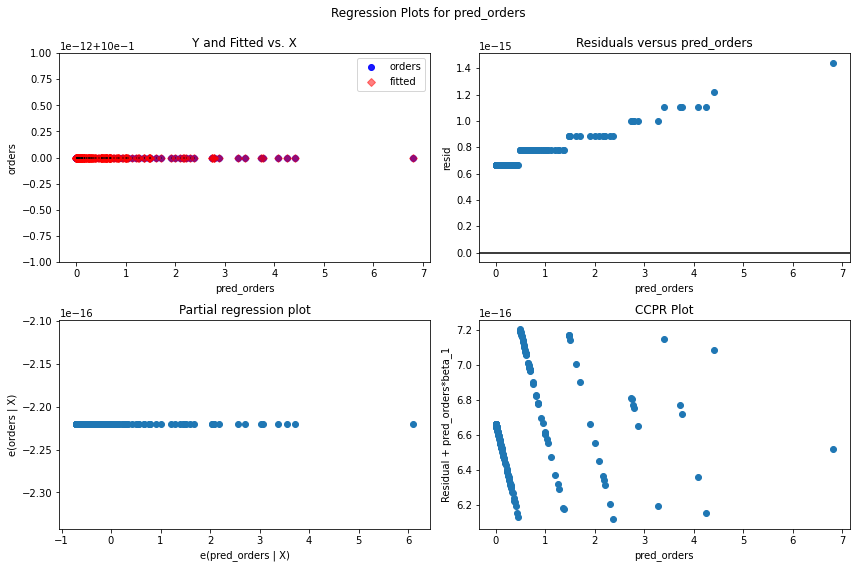

In [120]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pred_orders', fig=fig)

eval_env: 1


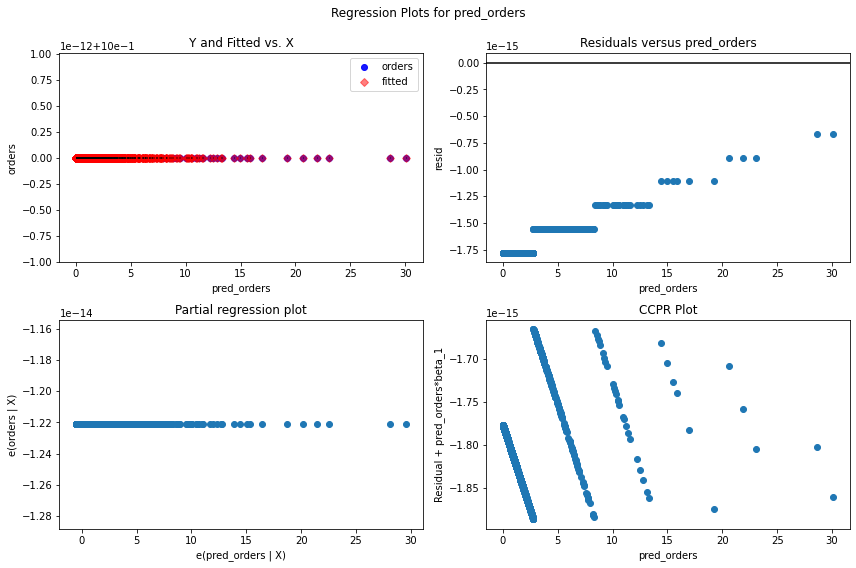

In [115]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'pred_orders', fig=fig)

eval_env: 1


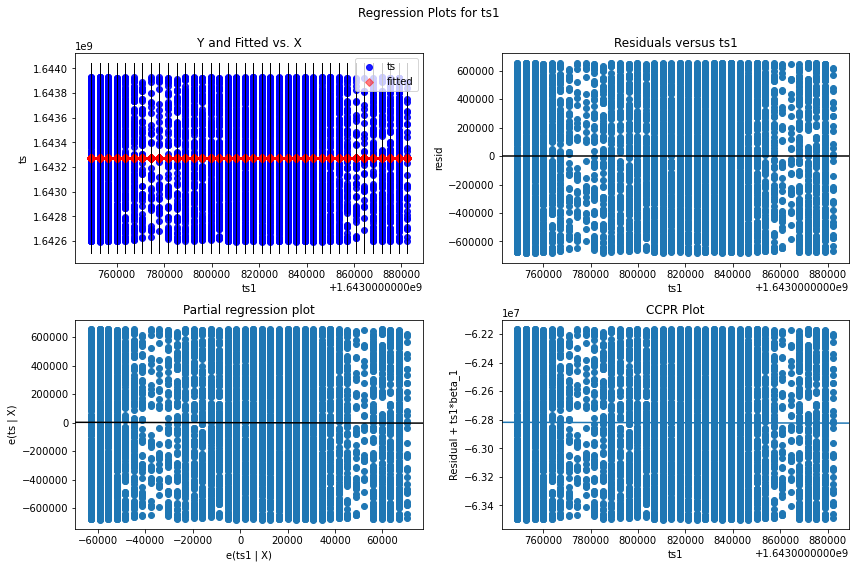

In [112]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'ts1', fig=fig)

In [116]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('fidn ~ fidn1', data=tt[0:10000]).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   fidn   R-squared:                      -0.009
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                nan
Time:                        00:58:30   Log-Likelihood:            -3.9412e+05
No. Observations:               10000   AIC:                         7.882e+05
Df Residuals:                    9999   BIC:                         7.882e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.629e-18   8.35e-22   1949.884      0.0

eval_env: 1


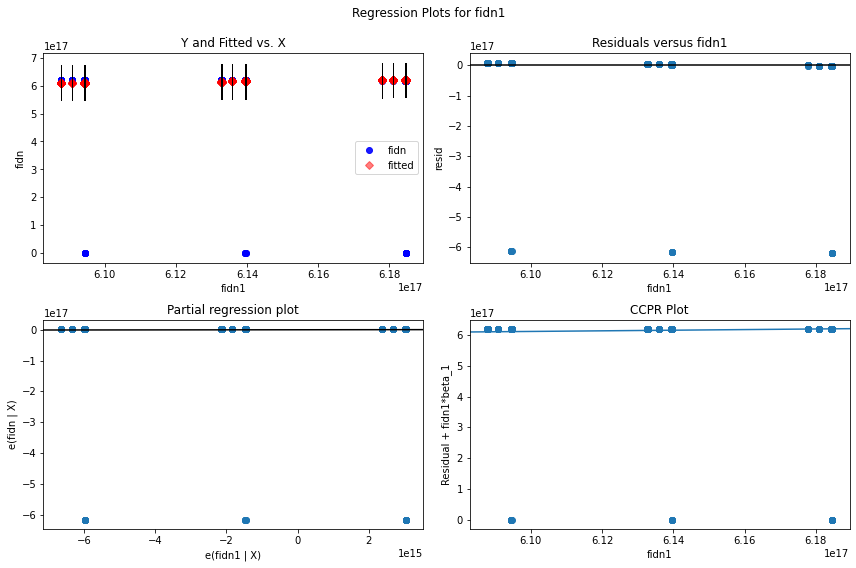

In [118]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'fidn1', fig=fig)

In [64]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = tt['vector']
s2 = tt['vector2']
s1 = s1[0:1000]
s2 = s2[0:1000]
s1 = s1.to_numpy()
s2 = s2.to_numpy()
path = dtw.warping_path(s1[0:10000], s2[0:10000])
dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



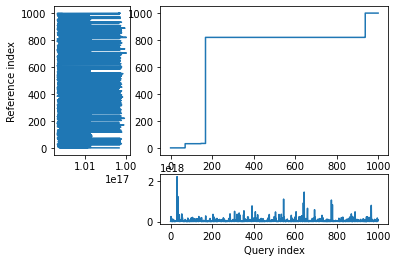

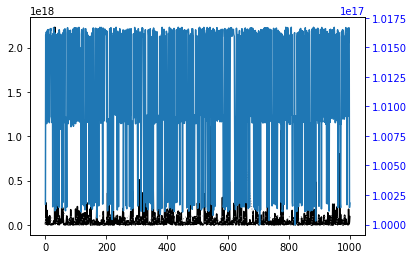

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


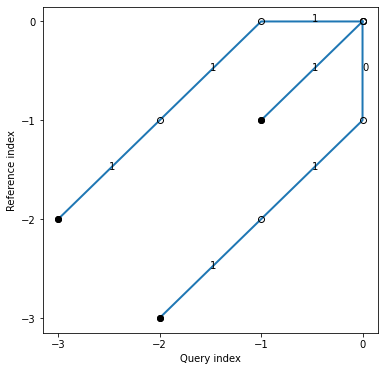

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [65]:
import numpy as np

s11 = s1[0:1000]
s22 = s2[0:1000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



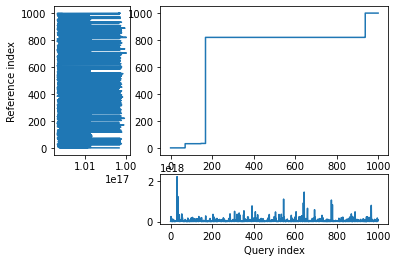

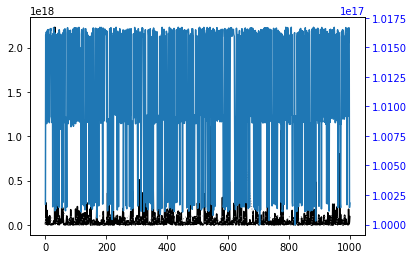

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


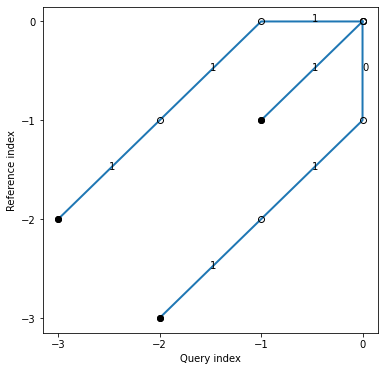

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [77]:
import numpy as np

s11 = s1[0:1000]
s22 = s2[0:1000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts,vector,vector2
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00,1643882400,1643648400,1.464000e+16,1.001725e+17
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00,1643882400,1642892400,4.635999e+16,1.016062e+17
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00,1643882400,1643839200,2.488800e+17,1.009244e+17
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00,1643882400,1643270400,6.710112e+15,1.016299e+17
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00,1643882400,1642694400,4.229229e+16,1.008545e+17
...,...,...,...,...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00,1628013600,1643209200,5.034314e+16,1.016258e+17
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00,1628013600,1643018400,3.503873e+16,1.008750e+17
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00,1628013600,1643907600,1.452912e+17,1.001886e+17
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00,1628013600,1643634000,0.000000e+00,1.016512e+17


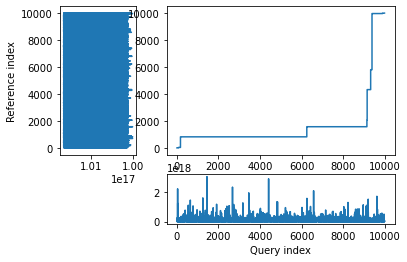

In [ ]:
import numpy as np

s11 = s1[0:10000]
s22 = s2[0:10000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

In [80]:
y_true1 = s11
y_pred1 = s22

In [83]:
from numpy import array
from permetrics.regression import Metrics

#y_true1 = y_true1.to_numpy()
#y_pred1 = y_pred1.to_numpy()

obj1 = Metrics(y_true1, y_pred1)
print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=5))



multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
    print(obj2.symmetric_mean_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))

1.26628
1.26628
1.26628
1.26628
1.26628
1.26628


In [84]:
from numpy import array
from permetrics.regression import Metrics
y_true1  = s11
y_pred1  = s22
## 1-D array
#y_true1 = y_true1.to_numpy()
#y_pred1 = y_pred1.to_numpy()
obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array


#multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
   # print(obj2.mean_arctangent_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))
    print(obj2.mean_arctangent_absolute_percentage_error(clean=True,decimal=5))

1.12837
1.12837
1.12837
1.12837
1.12837
1.12837


D:\anaconda3\lib\site-packages\permetrics\regression.py:244: RuntimeWarning: divide by zero encountered in true_divide
  return round(mean(arctan(divide(abs(y_true - y_pred), y_true))), decimal)


In [ ]:
# Pairplot

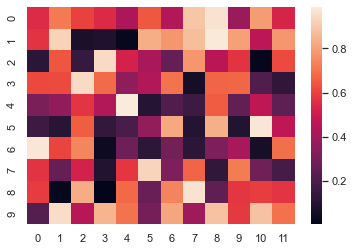

In [96]:
import numpy as np; np.random.seed(0)
import seaborn as sns; 
sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

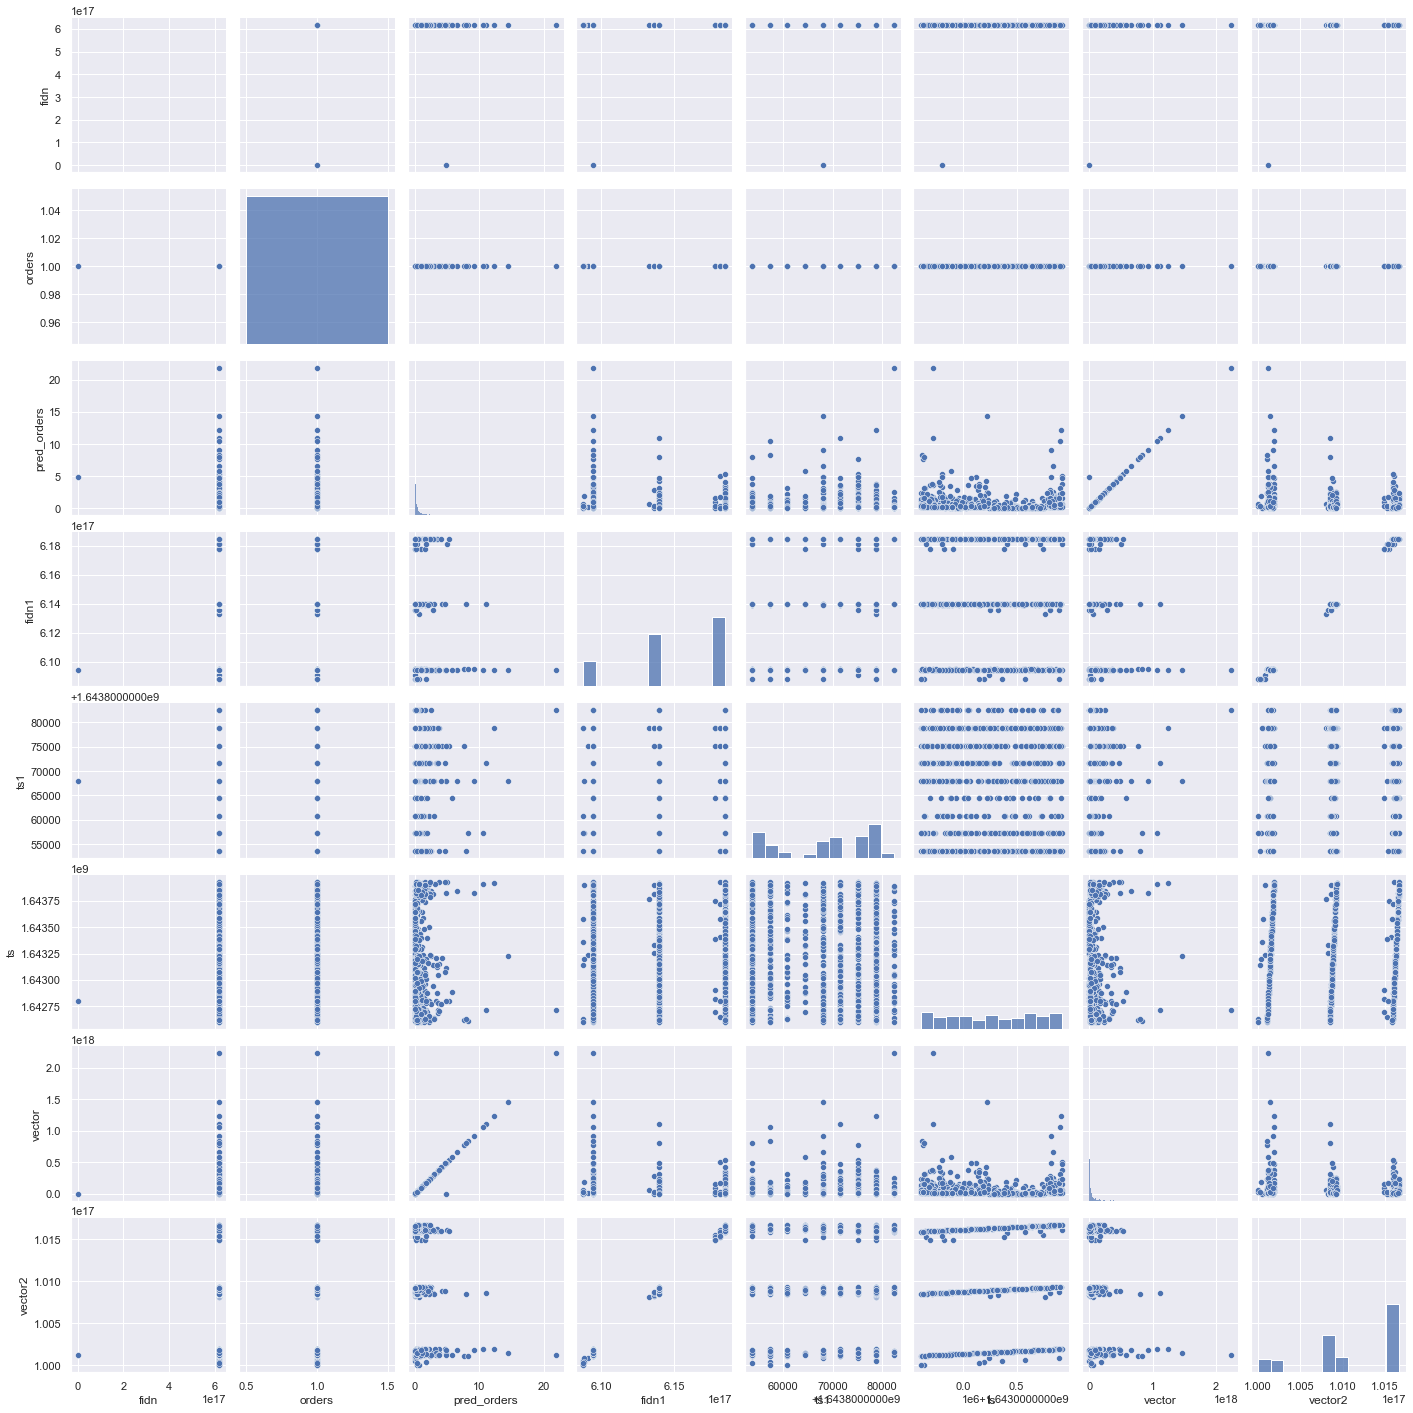

In [97]:
sns.pairplot(tt[0:1000])
plt.show()

In [85]:
testing_series  = s11
prediction_series  = s22
training_series = s1[0:10000]

In [88]:
import numpy as np


def MASE(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
    print("Needs to be tested.")
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

print(MASE(training_series, testing_series, prediction_series))

Needs to be tested.
1.127823130444927


In [89]:
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts,vector,vector2
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00,1643882400,1643648400,1.464000e+16,1.001725e+17
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00,1643882400,1642892400,4.635999e+16,1.016062e+17
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00,1643882400,1643839200,2.488800e+17,1.009244e+17
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00,1643882400,1643270400,6.710112e+15,1.016299e+17
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00,1643882400,1642694400,4.229229e+16,1.008545e+17
...,...,...,...,...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00,1628013600,1643209200,5.034314e+16,1.016258e+17
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00,1628013600,1643018400,3.503873e+16,1.008750e+17
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00,1628013600,1643907600,1.452912e+17,1.001886e+17
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00,1628013600,1643634000,0.000000e+00,1.016512e+17


In [90]:
y = ['ts1','ts','vector','vector2']
yy = tt[y]


In [75]:
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts,vector,vector2
221276,618454664673492991,2022-02-03 10:00:00,1,0.144,2022-01-31 17:00:00,609451998630117375,2022-01-31 17:00:00,1643882400,1643648400,1.464000e+16,1.001725e+17
768795,618454483965575167,2022-02-03 10:00:00,1,0.456,2022-01-22 23:00:00,618459200345604095,2022-01-22 23:00:00,1643882400,1642892400,4.635999e+16,1.016062e+17
71855,618454581659566079,2022-02-03 10:00:00,1,2.448,2022-02-02 22:00:00,613955600453206015,2022-02-02 22:00:00,1643882400,1643839200,2.488800e+17,1.009244e+17
504255,618464936817328127,2022-02-03 10:00:00,1,0.066,2022-01-27 08:00:00,618461231796453375,2022-01-27 08:00:00,1643882400,1643270400,6.710112e+15,1.016299e+17
926203,618439300219404287,2022-02-03 10:00:00,1,0.416,2022-01-20 16:00:00,613957631865782271,2022-01-20 16:00:00,1643882400,1642694400,4.229229e+16,1.008545e+17
...,...,...,...,...,...,...,...,...,...,...,...
547246,618460877494157311,2021-08-03 18:00:00,1,0.500,2022-01-26 15:00:00,618459197460709375,2022-01-26 15:00:00,1628013600,1643209200,5.034314e+16,1.016258e+17
690216,618459198190780415,2021-08-03 18:00:00,1,0.348,2022-01-24 10:00:00,613961337227182079,2022-01-24 10:00:00,1628013600,1643018400,3.503873e+16,1.008750e+17
28800,618464937363636223,2021-08-03 18:00:00,1,1.443,2022-02-03 17:00:00,609454032565567487,2022-02-03 17:00:00,1628013600,1643907600,1.452912e+17,1.001886e+17
235496,618461231455666175,2021-08-03 18:00:00,1,0.000,2022-01-31 13:00:00,618454174061035519,2022-01-31 13:00:00,1628013600,1643634000,0.000000e+00,1.016512e+17


In [ ]:
qq1 

In [ ]:
dfinal = qq.merge(rr, how='inner', left_on='fidn', right_on='fidn1')

In [200]:
tt = pd.concat([qq, rr.reindex(rr.index)], axis=1)
tt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time
1,NaN,NaT,NaN,0.666,2022-02-03 23:00:00,6.184612e+17,2022-02-03 23:00:00
2,NaN,NaT,NaN,0.894,2022-02-03 23:00:00,6.184601e+17,2022-02-03 23:00:00
3,NaN,NaT,NaN,0.854,2022-02-03 23:00:00,6.180911e+17,2022-02-03 23:00:00
4,NaN,NaT,NaN,1.133,2022-02-03 23:00:00,6.184650e+17,2022-02-03 23:00:00
5,NaN,NaT,NaN,1.100,2022-02-03 23:00:00,6.184542e+17,2022-02-03 23:00:00
...,...,...,...,...,...,...,...
6622070,6.184612e+17,2022-01-20 19:00:00,1.0,NaN,NaT,NaN,NaT
6622079,6.184545e+17,2022-01-30 19:00:00,1.0,NaN,NaT,NaN,NaT
6622098,6.184609e+17,2022-01-26 17:00:00,1.0,NaN,NaT,NaN,NaT
6622107,6.184545e+17,2022-01-20 22:00:00,1.0,NaN,NaT,NaN,NaT


In [130]:
tttt = tt['time']

In [136]:
tt['datetime'] = tt['time'].apply(lambda x: pd.Timestamp(x))
tt

In [137]:
tt

,pred_orders,fidn1,time,fidn,time1,orders,datetime
1,0.666,618461232492707839,2022-02-03 23:00:00,618459200109412351,2021-08-28 21:00:00,1,2022-02-03 23:00:00
2,0.894,618460113995825151,2022-02-03 23:00:00,618464936820211711,2021-12-29 21:00:00,1,2022-02-03 23:00:00
3,0.854,618091109430591487,2022-02-03 23:00:00,618461231294971903,2022-01-07 21:00:00,1,2022-02-03 23:00:00
4,1.133,618464965934972927,2022-02-03 23:00:00,618464929257095167,2021-12-31 22:00:00,1,2022-02-03 23:00:00
5,1.100,618454173902700543,2022-02-03 23:00:00,618091109430853631,2021-09-27 15:00:00,1,2022-02-03 23:00:00
...,...,...,...,...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00,618454581547368447,2021-11-16 17:00:00,1,2022-01-19 12:00:00
999996,0.408,613954461066330111,2022-01-19 12:00:00,618464937400074239,2021-11-20 13:00:00,1,2022-01-19 12:00:00
999997,0.133,613955557847465983,2022-01-19 12:00:00,618464936187396095,2021-08-12 22:00:00,1,2022-01-19 12:00:00
999998,0.210,618460877213401087,2022-01-19 12:00:00,618454173948837887,2021-08-16 16:00:00,1,2022-01-19 12:00:00


In [ ]:
#df = df.sort_values(by = ['MyCol', 'MyIdx'], ascending = [False, True])

In [ ]:
tt['vector'] = tt['time'].apply(lambda x: x = )
tt

In [147]:
import time
import datetime
import numpy as np
#df['ts'] = pd.to_timedelta(tt['time'], unit='seconds').dt.total_seconds().astype(int)

tt['ts'] = tt.datetime.values.astype(np.int64) // 10 ** 9
tt

,pred_orders,fidn1,time,fidn,time1,orders,datetime,vector,ts
1,0.666,618461232492707839,2022-02-03 23:00:00,618459200109412351,2021-08-28 21:00:00,1,2022-02-03 23:00:00,4.118952e+17,1643929200
2,0.894,618460113995825151,2022-02-03 23:00:00,618464936820211711,2021-12-29 21:00:00,1,2022-02-03 23:00:00,5.529033e+17,1643929200
3,0.854,618091109430591487,2022-02-03 23:00:00,618461231294971903,2022-01-07 21:00:00,1,2022-02-03 23:00:00,5.278498e+17,1643929200
4,1.133,618464965934972927,2022-02-03 23:00:00,618464929257095167,2021-12-31 22:00:00,1,2022-02-03 23:00:00,7.007208e+17,1643929200
5,1.100,618454173902700543,2022-02-03 23:00:00,618091109430853631,2021-09-27 15:00:00,1,2022-02-03 23:00:00,6.802996e+17,1643929200
...,...,...,...,...,...,...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00,618454581547368447,2021-11-16 17:00:00,1,2022-01-19 12:00:00,1.517712e+18,1642593600
999996,0.408,613954461066330111,2022-01-19 12:00:00,618464937400074239,2021-11-20 13:00:00,1,2022-01-19 12:00:00,2.504934e+17,1642593600
999997,0.133,613955557847465983,2022-01-19 12:00:00,618464936187396095,2021-08-12 22:00:00,1,2022-01-19 12:00:00,8.165609e+16,1642593600
999998,0.210,618460877213401087,2022-01-19 12:00:00,618454173948837887,2021-08-16 16:00:00,1,2022-01-19 12:00:00,1.298768e+17,1642593600


In [148]:

tt['ts1'] = tt.time.values.astype(np.int64) // 10 ** 9
tt

,pred_orders,fidn1,time,fidn,time1,orders,datetime,vector,ts,ts1
1,0.666,618461232492707839,2022-02-03 23:00:00,618459200109412351,2021-08-28 21:00:00,1,2022-02-03 23:00:00,4.118952e+17,1643929200,1643929200
2,0.894,618460113995825151,2022-02-03 23:00:00,618464936820211711,2021-12-29 21:00:00,1,2022-02-03 23:00:00,5.529033e+17,1643929200,1643929200
3,0.854,618091109430591487,2022-02-03 23:00:00,618461231294971903,2022-01-07 21:00:00,1,2022-02-03 23:00:00,5.278498e+17,1643929200,1643929200
4,1.133,618464965934972927,2022-02-03 23:00:00,618464929257095167,2021-12-31 22:00:00,1,2022-02-03 23:00:00,7.007208e+17,1643929200,1643929200
5,1.100,618454173902700543,2022-02-03 23:00:00,618091109430853631,2021-09-27 15:00:00,1,2022-02-03 23:00:00,6.802996e+17,1643929200,1643929200
...,...,...,...,...,...,...,...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00,618454581547368447,2021-11-16 17:00:00,1,2022-01-19 12:00:00,1.517712e+18,1642593600,1642593600
999996,0.408,613954461066330111,2022-01-19 12:00:00,618464937400074239,2021-11-20 13:00:00,1,2022-01-19 12:00:00,2.504934e+17,1642593600,1642593600
999997,0.133,613955557847465983,2022-01-19 12:00:00,618464936187396095,2021-08-12 22:00:00,1,2022-01-19 12:00:00,8.165609e+16,1642593600,1642593600
999998,0.210,618460877213401087,2022-01-19 12:00:00,618454173948837887,2021-08-16 16:00:00,1,2022-01-19 12:00:00,1.298768e+17,1642593600,1642593600


In [158]:
dfssort = tt.sort_values(by = ['time1'], ascending = [False])
dfssort

,pred_orders,fidn1,time,fidn,time1,orders,datetime,vector,ts,ts1,vector2
221276,0.144,609451998630117375,2022-01-31 17:00:00,618454664673492991,2022-02-03 10:00:00,1,2022-01-31 17:00:00,1.442484e+16,1643648400,1643648400,1.001725e+17
768795,0.456,618459200345604095,2022-01-22 23:00:00,618454483965575167,2022-02-03 10:00:00,1,2022-01-22 23:00:00,4.633242e+16,1642892400,1642892400,1.016062e+17
71855,2.448,613955600453206015,2022-02-02 22:00:00,618454581659566079,2022-02-03 10:00:00,1,2022-02-02 22:00:00,2.470630e+17,1643839200,1643839200,1.009244e+17
504255,0.066,618461231796453375,2022-01-27 08:00:00,618464936817328127,2022-02-03 10:00:00,1,2022-01-27 08:00:00,6.707574e+15,1643270400,1643270400,1.016299e+17
926203,0.416,613957631865782271,2022-01-20 16:00:00,618439300219404287,2022-02-03 10:00:00,1,2022-01-20 16:00:00,4.195546e+16,1642694400,1642694400,1.008545e+17
...,...,...,...,...,...,...,...,...,...,...,...
547246,0.500,618459197460709375,2022-01-26 15:00:00,618460877494157311,2021-08-03 18:00:00,1,2022-01-26 15:00:00,5.081289e+16,1643209200,1643209200,1.016258e+17
690216,0.348,613961337227182079,2022-01-24 10:00:00,618459198190780415,2021-08-03 18:00:00,1,2022-01-24 10:00:00,3.510449e+16,1643018400,1643018400,1.008750e+17
28800,1.443,609454032565567487,2022-02-03 17:00:00,618464937363636223,2021-08-03 18:00:00,1,2022-02-03 17:00:00,1.445722e+17,1643907600,1643907600,1.001886e+17
235496,0.000,618454174061035519,2022-01-31 13:00:00,618461231455666175,2021-08-03 18:00:00,1,2022-01-31 13:00:00,0.000000e+00,1643634000,1643634000,1.016512e+17


In [159]:
tt['ts1'] = tt.time1.values.astype(np.int64) // 10 ** 9
tt

,pred_orders,fidn1,time,fidn,time1,orders,datetime,vector,ts,ts1,vector2
1,0.666,618461232492707839,2022-02-03 23:00:00,618459200109412351,2021-08-28 21:00:00,1,2022-02-03 23:00:00,6.771265e+16,1643929200,1630184400,1.016706e+17
2,0.894,618460113995825151,2022-02-03 23:00:00,618464936820211711,2021-12-29 21:00:00,1,2022-02-03 23:00:00,9.089339e+16,1643929200,1640811600,1.016705e+17
3,0.854,618091109430591487,2022-02-03 23:00:00,618461231294971903,2022-01-07 21:00:00,1,2022-02-03 23:00:00,8.677477e+16,1643929200,1641589200,1.016098e+17
4,1.133,618464965934972927,2022-02-03 23:00:00,618464929257095167,2021-12-31 22:00:00,1,2022-02-03 23:00:00,1.151935e+17,1643929200,1640988000,1.016713e+17
5,1.100,618454173902700543,2022-02-03 23:00:00,618091109430853631,2021-09-27 15:00:00,1,2022-02-03 23:00:00,1.118364e+17,1643929200,1632754800,1.016695e+17
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00,618454581547368447,2021-11-16 17:00:00,1,2022-01-19 12:00:00,2.492985e+17,1642593600,1637082000,1.008489e+17
999996,0.408,613954461066330111,2022-01-19 12:00:00,618464937400074239,2021-11-20 13:00:00,1,2022-01-19 12:00:00,4.114589e+16,1642593600,1637413200,1.008478e+17
999997,0.133,613955557847465983,2022-01-19 12:00:00,618464936187396095,2021-08-12 22:00:00,1,2022-01-19 12:00:00,1.341278e+16,1642593600,1628805600,1.008479e+17
999998,0.210,618460877213401087,2022-01-19 12:00:00,618454173948837887,2021-08-16 16:00:00,1,2022-01-19 12:00:00,2.133348e+16,1642593600,1629129600,1.015880e+17


In [160]:
tt['vector'] = tt['pred_orders']*tt['fidn1']*(tt['ts1']/10000000000)
tt['vector2'] = tt['fidn1']*(tt['ts']/10000000000)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tt

,pred_orders,fidn1,time,fidn,time1,orders,datetime,vector,ts,ts1,vector2
1,0.666,618461232492707839,2022-02-03 23:00:00,618459200109412351,2021-08-28 21:00:00,1,2022-02-03 23:00:00,6.714651e+16,1643929200,1630184400,1.016706e+17
2,0.894,618460113995825151,2022-02-03 23:00:00,618464936820211711,2021-12-29 21:00:00,1,2022-02-03 23:00:00,9.072102e+16,1643929200,1640811600,1.016705e+17
3,0.854,618091109430591487,2022-02-03 23:00:00,618461231294971903,2022-01-07 21:00:00,1,2022-02-03 23:00:00,8.665125e+16,1643929200,1641589200,1.016098e+17
4,1.133,618464965934972927,2022-02-03 23:00:00,618464929257095167,2021-12-31 22:00:00,1,2022-02-03 23:00:00,1.149874e+17,1643929200,1640988000,1.016713e+17
5,1.100,618454173902700543,2022-02-03 23:00:00,618091109430853631,2021-09-27 15:00:00,1,2022-02-03 23:00:00,1.110762e+17,1643929200,1632754800,1.016695e+17
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.472,613961325636222975,2022-01-19 12:00:00,618454581547368447,2021-11-16 17:00:00,1,2022-01-19 12:00:00,2.484620e+17,1642593600,1637082000,1.008489e+17
999996,0.408,613954461066330111,2022-01-19 12:00:00,618464937400074239,2021-11-20 13:00:00,1,2022-01-19 12:00:00,4.101612e+16,1642593600,1637413200,1.008478e+17
999997,0.133,613955557847465983,2022-01-19 12:00:00,618464936187396095,2021-08-12 22:00:00,1,2022-01-19 12:00:00,1.330019e+16,1642593600,1628805600,1.008479e+17
999998,0.210,618460877213401087,2022-01-19 12:00:00,618454173948837887,2021-08-16 16:00:00,1,2022-01-19 12:00:00,2.115861e+16,1642593600,1629129600,1.015880e+17


In [93]:
# Совпадающие значения !!!!!!!!!!!!!!!!!!!!!!!!!!

fftt = tt.loc[(tt['time'] == tt['time1']) & (tt['fidn'] == tt['fidn1'])]
fftt

,fidn,time1,orders,pred_orders,prediction_date_m,fidn1,time,ts1,ts,vector,vector2


In [161]:
!pip install dtaidistance

You should consider upgrading via the 'D:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [165]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = tt['vector']
s2 = tt['vector2']
s1 = s1.to_numpy()
s2 = s2.to_numpy()
#path = dtw.warping_path(s1[0:10000], s2[0:10000])
#dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)

In [169]:

!pip install dtw-python


You should consider upgrading via the 'D:\anaconda3\python.exe -m pip install --upgrade pip' command.


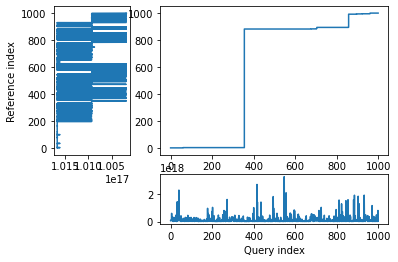

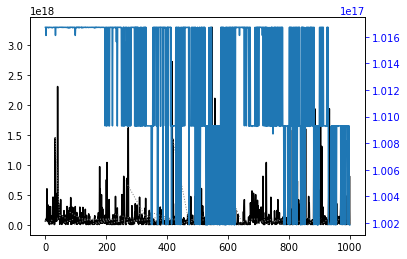

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


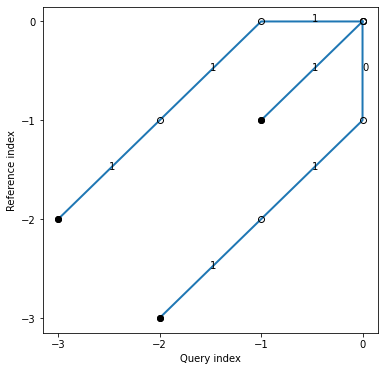

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [172]:
import numpy as np

s11 = s1[0:1000]
s22 = s2[0:1000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()


In [ ]:
ff = dfffff.loc[(rr['time'] == ll['time1']) & (ll['fidn'] == rr['fidn1'])]

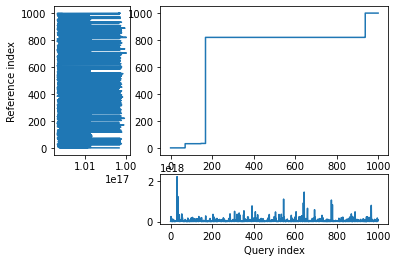

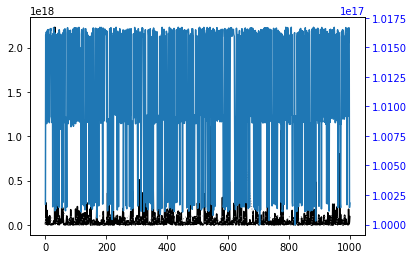

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


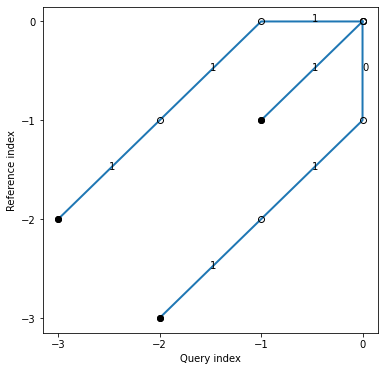

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [77]:
import numpy as np

s11 = s1[0:4000]
s22 = s2[0:4000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

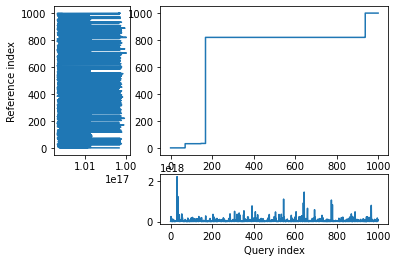

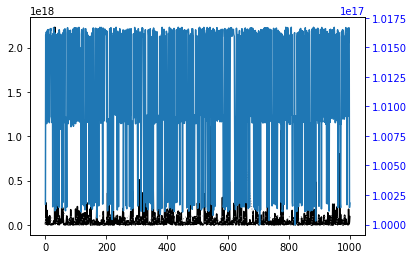

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")
D:\anaconda3\lib\site-packages\dtw\stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


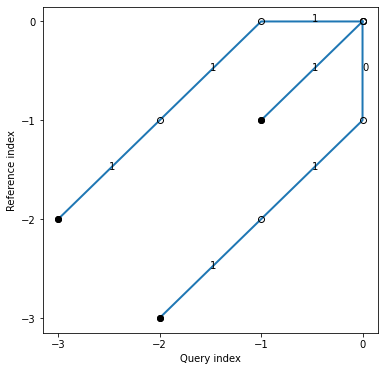

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [79]:
import numpy as np

s11 = s1[0:10000]
s22 = s2[0:10000]


## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(s11, s22, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(s11, s22, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

In [73]:

s11 = s1[0:20000]
s22 = s2[0:20000]

In [74]:
from numpy import array
from permetrics.regression import Metrics
y_true1  = s11
y_pred1  = s22
## 1-D array
#y_true1 = y_true1.to_numpy()
#y_pred1 = y_pred1.to_numpy()
obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array


#multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
   # print(obj2.mean_arctangent_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))
    print(obj2.mean_arctangent_absolute_percentage_error(clean=True,decimal=5))

1.12837
1.12837
1.12837
1.12837
1.12837
1.12837


In [458]:
from numpy import array
from permetrics.regression import Metrics

## 1-D array
y_true1 = y_true.to_numpy()
y_pred1 = y_pred.to_numpy()
obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array

multi_outputs = [None, "raw_values", [0.3, 1.2], array([1.8, 0.4]), (0.1, 0.10)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
    print(obj2.mean_arctangent_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))


0.295
0.295
0.295
0.295
0.295
0.295


In [175]:
dfss = df1.sort_values(by = ['creation_date_m'], ascending = [True])

In [178]:
dfss
dfss = df1.sort_values(by = ['creation_date_m'], ascending = [False])
dfss

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [179]:
dfss

,creation_date,fid,creation_date_m,fidn
2658968,2022-02-03 07:04:37.935000,8953a9462cbffff,2022-02-03 07:00:00,618464932820418559
4849342,2022-02-03 07:06:18.979000,8953a9c1373ffff,2022-02-03 07:00:00,618464965848989695
990030,2022-02-03 07:07:19.471000,892d9ad99c7ffff,2022-02-03 07:00:00,617795438535770111
4436369,2022-02-03 07:02:50.652000,89530cb6403ffff,2022-02-03 07:00:00,618454173947789311
3870264,2022-02-03 07:03:49.372000,8953a92a287ffff,2022-02-03 07:00:00,618464925299769343
...,...,...,...,...
6175011,2021-08-03 15:37:14.780000,89520218ec7ffff,2021-08-03 15:00:00,618435852334792703
6576721,2021-08-03 15:22:24.285000,893e696db8bffff,2021-08-03 15:00:00,618091109482758143
4444739,2021-08-03 15:40:48.235000,8953a952c63ffff,2021-08-03 15:00:00,618464936202600447
3929113,2021-08-03 15:24:16.174000,89521e9727bffff,2021-08-03 15:00:00,618437810365136895


In [73]:
rr = dfqq1[1:1000000]
rr

,pred_orders,prediction_date_m,fidn1,time
1,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
5,1.100,2022-02-03 23:00:00,618454173902700543,2022-02-03 23:00:00
...,...,...,...,...
999995,2.472,2022-01-19 12:00:00,613961325636222975,2022-01-19 12:00:00
999996,0.408,2022-01-19 12:00:00,613954461066330111,2022-01-19 12:00:00
999997,0.133,2022-01-19 12:00:00,613955557847465983,2022-01-19 12:00:00
999998,0.210,2022-01-19 12:00:00,618460877213401087,2022-01-19 12:00:00


In [ ]:
#############################################

In [87]:
dfffff1.loc[(rr['time'] == ll['time1'])]
dfffff1


,pred_orders,prediction_date_m,fidn1,time
1,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
5,1.100,2022-02-03 23:00:00,618454173902700543,2022-02-03 23:00:00
...,...,...,...,...
999995,2.472,2022-01-19 12:00:00,613961325636222975,2022-01-19 12:00:00
999996,0.408,2022-01-19 12:00:00,613954461066330111,2022-01-19 12:00:00
999997,0.133,2022-01-19 12:00:00,613955557847465983,2022-01-19 12:00:00
999998,0.210,2022-01-19 12:00:00,618460877213401087,2022-01-19 12:00:00


In [88]:
dfffff2.loc[(ll['fidn'] == rr['fidn1'])]
dfffff2

,pred_orders,prediction_date_m,fidn1,time
1,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
5,1.100,2022-02-03 23:00:00,618454173902700543,2022-02-03 23:00:00
...,...,...,...,...
999995,2.472,2022-01-19 12:00:00,613961325636222975,2022-01-19 12:00:00
999996,0.408,2022-01-19 12:00:00,613954461066330111,2022-01-19 12:00:00
999997,0.133,2022-01-19 12:00:00,613955557847465983,2022-01-19 12:00:00
999998,0.210,2022-01-19 12:00:00,618460877213401087,2022-01-19 12:00:00


In [100]:
dfffff = rr

ff = dfffff.loc[(rr['time'] == ll['time1']) & (ll['fidn'] == rr['fidn1'])]


ff

,pred_orders,prediction_date_m,fidn1,time


In [102]:
ff = dfffff2.loc[(ll['fidn'] == rr['fidn1'])]
ff

,pred_orders,prediction_date_m,fidn1,time
1564,0.149,2022-02-03 23:00:00,618460876767231999,2022-02-03 23:00:00
6239,0.854,2022-02-03 22:00:00,618457068979355647,2022-02-03 22:00:00
26176,0.610,2022-02-03 17:00:00,618457069050920959,2022-02-03 17:00:00
28564,0.666,2022-02-03 17:00:00,618461229324959743,2022-02-03 17:00:00
36044,0.309,2022-02-03 15:00:00,618464932338860031,2022-02-03 15:00:00
...,...,...,...,...
974807,0.340,2022-01-19 19:00:00,618464937441230847,2022-01-19 19:00:00
975044,0.101,2022-01-19 19:00:00,618459198296686591,2022-01-19 19:00:00
976265,0.680,2022-01-19 19:00:00,618464935673331711,2022-01-19 19:00:00
989372,0.756,2022-01-19 15:00:00,618454483965575167,2022-01-19 15:00:00


In [105]:
ff = dfffff.loc[(rr['time'] == ll['time1'])]
ff

,pred_orders,prediction_date_m,fidn1,time
50752,0.444,2022-02-03 10:00:00,618461231424471039,2022-02-03 10:00:00
54547,0.292,2022-02-03 08:00:00,613950572325765119,2022-02-03 08:00:00
54671,1.751,2022-02-03 08:00:00,609457769187115007,2022-02-03 08:00:00
62183,0.618,2022-02-03 01:00:00,609457733535531007,2022-02-03 01:00:00
62394,1.030,2022-02-03 01:00:00,609457733099323391,2022-02-03 01:00:00
...,...,...,...,...
987670,1.190,2022-01-19 16:00:00,618464937439395839,2022-01-19 16:00:00
988679,0.505,2022-01-19 16:00:00,613957632270532607,2022-01-19 16:00:00
994565,0.707,2022-01-19 14:00:00,618461232391782399,2022-01-19 14:00:00
995924,1.010,2022-01-19 13:00:00,613955600553869311,2022-01-19 13:00:00


In [ ]:
###################################################################################################################################

In [77]:
dfff2 = pd.concat([ll, rr.reindex(rr.index)], axis=1)
dfff2

,fidn,orders,creation_date_md,time,time1,pred_orders,prediction_date_m,fidn1,time
1,618459200109412351,1,2021-08-28 21:00:00,2021-08-28 21:00:00,2021-08-28 21:00:00,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00
2,618464936820211711,1,2021-12-29 21:00:00,2021-12-29 21:00:00,2021-12-29 21:00:00,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00
3,618461231294971903,1,2022-01-07 21:00:00,2022-01-07 21:00:00,2022-01-07 21:00:00,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00
4,618464929257095167,1,2021-12-31 22:00:00,2021-12-31 22:00:00,2021-12-31 22:00:00,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00
5,618091109430853631,1,2021-09-27 15:00:00,2021-09-27 15:00:00,2021-09-27 15:00:00,1.100,2022-02-03 23:00:00,618454173902700543,2022-02-03 23:00:00
...,...,...,...,...,...,...,...,...,...
999995,618454581547368447,1,2021-11-16 17:00:00,2021-11-16 17:00:00,2021-11-16 17:00:00,2.472,2022-01-19 12:00:00,613961325636222975,2022-01-19 12:00:00
999996,618464937400074239,1,2021-11-20 13:00:00,2021-11-20 13:00:00,2021-11-20 13:00:00,0.408,2022-01-19 12:00:00,613954461066330111,2022-01-19 12:00:00
999997,618464936187396095,1,2021-08-12 22:00:00,2021-08-12 22:00:00,2021-08-12 22:00:00,0.133,2022-01-19 12:00:00,613955557847465983,2022-01-19 12:00:00
999998,618454173948837887,1,2021-08-16 16:00:00,2021-08-16 16:00:00,2021-08-16 16:00:00,0.210,2022-01-19 12:00:00,618460877213401087,2022-01-19 12:00:00


In [ ]:
import time
from datetime import datetime
d = dd[]

unixtime = time.mktime(d.timetuple())

In [109]:
tt =['fidn','time1', 'fidn1', 'time']
dd = dfff2[tt]
dd

,fidn,time1,fidn1,time,time
1,618459200109412351,2021-08-28 21:00:00,618461232492707839,2021-08-28 21:00:00,2022-02-03 23:00:00
2,618464936820211711,2021-12-29 21:00:00,618460113995825151,2021-12-29 21:00:00,2022-02-03 23:00:00
3,618461231294971903,2022-01-07 21:00:00,618091109430591487,2022-01-07 21:00:00,2022-02-03 23:00:00
4,618464929257095167,2021-12-31 22:00:00,618464965934972927,2021-12-31 22:00:00,2022-02-03 23:00:00
5,618091109430853631,2021-09-27 15:00:00,618454173902700543,2021-09-27 15:00:00,2022-02-03 23:00:00
...,...,...,...,...,...
999995,618454581547368447,2021-11-16 17:00:00,613961325636222975,2021-11-16 17:00:00,2022-01-19 12:00:00
999996,618464937400074239,2021-11-20 13:00:00,613954461066330111,2021-11-20 13:00:00,2022-01-19 12:00:00
999997,618464936187396095,2021-08-12 22:00:00,613955557847465983,2021-08-12 22:00:00,2022-01-19 12:00:00
999998,618454173948837887,2021-08-16 16:00:00,618460877213401087,2021-08-16 16:00:00,2022-01-19 12:00:00


In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

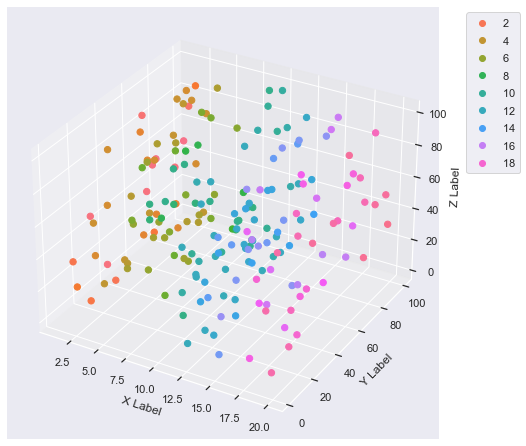

In [459]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 200
x = np.random.uniform(1, 20, size=n)
y = np.random.uniform(1, 100, size=n)
z = np.random.uniform(1, 100, size=n)

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [406]:
dt = dfhhww1.set_index(['time'])
dt1 = dfqq1.set_index(['time'])


In [506]:
dfqq1['time1'] = dfqq1['time']

C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/3606518329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfqq1['time1'] = dfqq1['time']


In [507]:
dfff2 = pd.concat([dfhhww1, dfqq1.reindex(dfqq1.index)], axis=1)
dfff2

,fidn,orders,creation_date_md,time,pred_orders,prediction_date_m,fidn1,time,time1
0,618460913664786431,1,2021-12-24 12:21:00,2021-12-24 12:00:00,0.999,2022-02-03 23:00:00,618461233004412927,2022-02-03 23:00:00,2022-02-03 23:00:00
1,618459200109412351,1,2021-08-28 21:12:00,2021-08-28 21:00:00,0.666,2022-02-03 23:00:00,618461232492707839,2022-02-03 23:00:00,2022-02-03 23:00:00
2,618464936820211711,1,2021-12-29 21:05:00,2021-12-29 21:00:00,0.894,2022-02-03 23:00:00,618460113995825151,2022-02-03 23:00:00,2022-02-03 23:00:00
3,618461231294971903,1,2022-01-07 21:05:00,2022-01-07 21:00:00,0.854,2022-02-03 23:00:00,618091109430591487,2022-02-03 23:00:00,2022-02-03 23:00:00
4,618464929257095167,1,2021-12-31 22:47:00,2021-12-31 22:00:00,1.133,2022-02-03 23:00:00,618464965934972927,2022-02-03 23:00:00,2022-02-03 23:00:00
...,...,...,...,...,...,...,...,...,...
99995,618461233030103039,1,2021-10-31 18:22:00,2021-10-31 18:00:00,0.544,2022-02-02 15:00:00,613955600597909503,2022-02-02 15:00:00,2022-02-02 15:00:00
99996,618464922658144255,1,2021-12-03 21:11:00,2021-12-03 21:00:00,0.182,2022-02-02 15:00:00,618464937073967103,2022-02-02 15:00:00,2022-02-02 15:00:00
99997,618464936183726079,1,2021-11-12 23:25:00,2021-11-12 23:00:00,0.318,2022-02-02 15:00:00,609447382983114751,2022-02-02 15:00:00,2022-02-02 15:00:00
99998,618456399033139199,1,2021-11-08 09:00:00,2021-11-08 09:00:00,0.136,2022-02-02 15:00:00,618459197570547711,2022-02-02 15:00:00,2022-02-02 15:00:00


In [513]:
dfffff = dfff2

In [514]:
dfffff.loc[(dfff2['fidn'] == dfff2['fidn1'])]

,fidn,orders,creation_date_md,time,pred_orders,prediction_date_m,fidn1,time,time1
1564,618460876767231999,1,2022-01-30 21:45:00,2022-01-30 21:00:00,0.149,2022-02-03 23:00:00,618460876767231999,2022-02-03 23:00:00,2022-02-03 23:00:00
6239,618457068979355647,1,2021-09-29 17:05:00,2021-09-29 17:00:00,0.854,2022-02-03 22:00:00,618457068979355647,2022-02-03 22:00:00,2022-02-03 22:00:00
26176,618457069050920959,1,2021-12-04 16:50:00,2021-12-04 16:00:00,0.610,2022-02-03 17:00:00,618457069050920959,2022-02-03 17:00:00,2022-02-03 17:00:00
28564,618461229324959743,1,2021-10-08 17:01:00,2021-10-08 17:00:00,0.666,2022-02-03 17:00:00,618461229324959743,2022-02-03 17:00:00,2022-02-03 17:00:00
36044,618464932338860031,1,2021-11-04 12:07:00,2021-11-04 12:00:00,0.309,2022-02-03 15:00:00,618464932338860031,2022-02-03 15:00:00,2022-02-03 15:00:00
37427,618464932817010687,1,2021-10-01 23:00:00,2021-10-01 23:00:00,2.163,2022-02-03 14:00:00,618464932817010687,2022-02-03 14:00:00,2022-02-03 14:00:00
40894,618460113419894783,1,2021-11-21 13:29:00,2021-11-21 13:00:00,0.298,2022-02-03 13:00:00,618460113419894783,2022-02-03 13:00:00,2022-02-03 13:00:00
44235,618464969587687423,1,2021-10-09 15:58:00,2021-10-09 15:00:00,0.515,2022-02-03 12:00:00,618464969587687423,2022-02-03 12:00:00,2022-02-03 12:00:00
64624,618459197822205951,1,2021-10-13 20:09:00,2021-10-13 20:00:00,0.111,2022-02-03 00:00:00,618459197822205951,2022-02-03 00:00:00,2022-02-03 00:00:00
66054,618457068975161343,1,2021-10-04 07:56:00,2021-10-04 07:00:00,0.610,2022-02-03 00:00:00,618457068975161343,2022-02-03 00:00:00,2022-02-03 00:00:00


In [ ]:
dfffff.loc[(dfff2['time'] == dfff2['time1'])]

In [407]:
dt

,fidn,orders,creation_date_md
time,,,
2021-12-24 12:00:00,618460913664786431,1,2021-12-24 12:21:00
2021-08-28 21:00:00,618459200109412351,1,2021-08-28 21:12:00
2021-12-29 21:00:00,618464936820211711,1,2021-12-29 21:05:00
2022-01-07 21:00:00,618461231294971903,1,2022-01-07 21:05:00
2021-12-31 22:00:00,618464929257095167,1,2021-12-31 22:47:00
...,...,...,...
2021-10-31 18:00:00,618461233030103039,1,2021-10-31 18:22:00
2021-12-03 21:00:00,618464922658144255,1,2021-12-03 21:11:00
2021-11-12 23:00:00,618464936183726079,1,2021-11-12 23:25:00


In [ ]:
dfffff.loc[(dttt['time']== dt1111['time']) & (dt1111['fidn'] == dttt['fidn'])]

In [458]:

dt1['fidn'] = dt1['fidn1']
dt1111 = dt1.drop(['fidn1','prediction_date_m'], axis=1)
dt1111


,pred_orders,fidn
time,,
2022-02-03 23:00:00,0.999,618461233004412927
2022-02-03 23:00:00,0.666,618461232492707839
2022-02-03 23:00:00,0.894,618460113995825151
2022-02-03 23:00:00,0.854,618091109430591487
2022-02-03 23:00:00,1.133,618464965934972927
...,...,...
2022-02-02 15:00:00,0.544,613955600597909503
2022-02-02 15:00:00,0.182,618464937073967103
2022-02-02 15:00:00,0.318,609447382983114751


In [414]:
dttt = dt.drop(['creation_date_md'], axis=1)


In [415]:
dttt

,fidn,orders
time,,
2021-12-24 12:00:00,618460913664786431,1
2021-08-28 21:00:00,618459200109412351,1
2021-12-29 21:00:00,618464936820211711,1
2022-01-07 21:00:00,618461231294971903,1
2021-12-31 22:00:00,618464929257095167,1
...,...,...
2021-10-31 18:00:00,618461233030103039,1
2021-12-03 21:00:00,618464922658144255,1
2021-11-12 23:00:00,618464936183726079,1


In [465]:
x=dt1111
y=dttt

y

,fidn,orders
time,,
2021-12-24 12:00:00,618460913664786431,1
2021-08-28 21:00:00,618459200109412351,1
2021-12-29 21:00:00,618464936820211711,1
2022-01-07 21:00:00,618461231294971903,1
2021-12-31 22:00:00,618464929257095167,1
...,...,...
2021-10-31 18:00:00,618461233030103039,1
2021-12-03 21:00:00,618464922658144255,1
2021-11-12 23:00:00,618464936183726079,1


In [466]:
x

,pred_orders,fidn
time,,
2022-02-03 23:00:00,0.999,618461233004412927
2022-02-03 23:00:00,0.666,618461232492707839
2022-02-03 23:00:00,0.894,618460113995825151
2022-02-03 23:00:00,0.854,618091109430591487
2022-02-03 23:00:00,1.133,618464965934972927
...,...,...
2022-02-02 15:00:00,0.544,613955600597909503
2022-02-02 15:00:00,0.182,618464937073967103
2022-02-02 15:00:00,0.318,609447382983114751


In [489]:
dfffff = dttt

In [461]:
merged_df = dttt.merge(dt1111, how='inner', left_on=["time", "fidn"], right_on=["time","fidn"])
merged_df

,fidn,orders,pred_orders
time,,,
2022-02-02 20:00:00,618464937036218367,1,1.274
2022-02-03 01:00:00,618454581862727679,1,0.164
2022-02-02 16:00:00,618464923080982527,1,0.750
2022-02-02 19:00:00,618460139528388607,1,0.665
2022-02-02 19:00:00,618460139528388607,1,0.665
...,...,...,...
2022-02-02 22:00:00,618464936166424575,1,0.182
2022-02-03 02:00:00,618454484466270207,1,6.200
2022-02-02 22:00:00,618464969153576959,1,0.364


In [473]:
mm = merged_df['pred_orders'].apply(np.floor)
merged_df['pred_orders_r'] = mm
merged_df

,fidn,orders,pred_orders,pred_orders_r
time,,,,
2022-02-02 20:00:00,618464937036218367,1,1.274,1.0
2022-02-03 01:00:00,618454581862727679,1,0.164,0.0
2022-02-02 16:00:00,618464923080982527,1,0.750,0.0
2022-02-02 19:00:00,618460139528388607,1,0.665,0.0
2022-02-02 19:00:00,618460139528388607,1,0.665,0.0
...,...,...,...,...
2022-02-02 22:00:00,618464936166424575,1,0.182,0.0
2022-02-03 02:00:00,618454484466270207,1,6.200,6.0
2022-02-02 22:00:00,618464969153576959,1,0.364,0.0


In [484]:
#t = ['fidn', 'orders', 'pred_orders', 'pred_orders_r']
ff = merged_df.reset_index(drop=True, inplace=True)
merged_df

,fidn,orders,pred_orders,pred_orders_r
0,618464937036218367,1,1.274,1.0
1,618454581862727679,1,0.164,0.0
2,618464923080982527,1,0.750,0.0
3,618460139528388607,1,0.665,0.0
4,618460139528388607,1,0.665,0.0
...,...,...,...,...
404,618464936166424575,1,0.182,0.0
405,618454484466270207,1,6.200,6.0
406,618464969153576959,1,0.364,0.0
407,618460882392580095,1,0.664,0.0


In [483]:
ff

In [ ]:
# Парные графики - чем ближе разные метрики к диагонали, тем лучше. 
# Параллельные линии, группировки у цента , распределения по объёму говорят об отсутствии корреляции, неоднородности, дисперсии, ошибках 

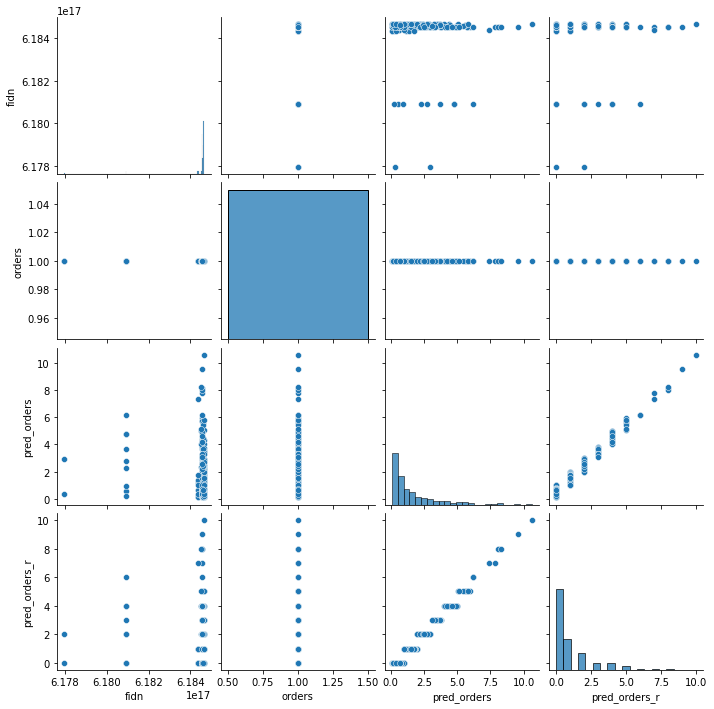

In [485]:
sns.pairplot(merged_df)
plt.show()

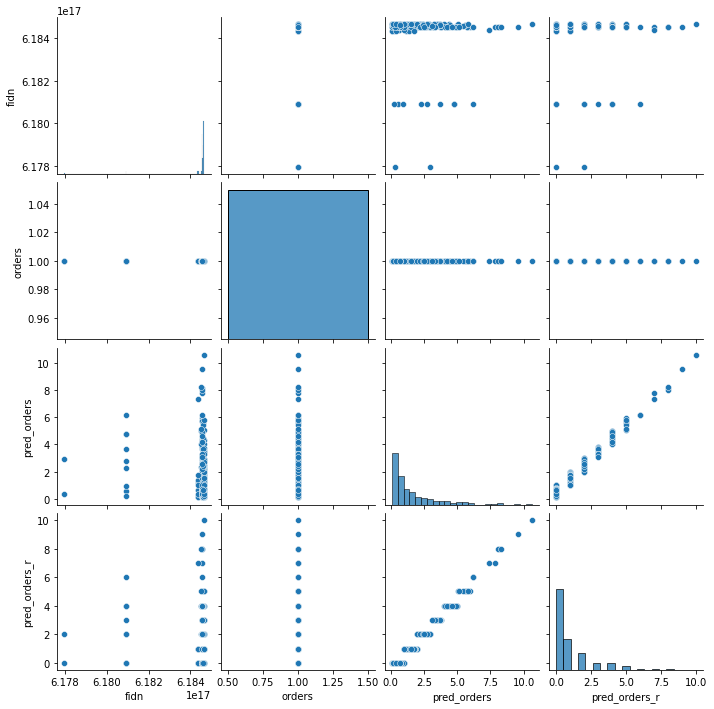

In [486]:
# importing packages
import seaborn
import pandas
 
# load the csv

 
# pairplot
seaborn.pairplot(merged_df)

In [456]:
new_df = pd.merge(x, y,  how='left', left_on=['time','fidn'],right_on = ['time','fidn'])
new_df

,pred_orders,fidn,orders
time,,,
2022-02-03 23:00:00,0.999,618461233004412927,NaN
2022-02-03 23:00:00,0.666,618461232492707839,NaN
2022-02-03 23:00:00,0.894,618460113995825151,NaN
2022-02-03 23:00:00,0.854,618091109430591487,NaN
2022-02-03 23:00:00,1.133,618464965934972927,NaN
...,...,...,...
2022-02-02 15:00:00,0.544,613955600597909503,NaN
2022-02-02 15:00:00,0.182,618464937073967103,NaN
2022-02-02 15:00:00,0.318,609447382983114751,NaN


In [450]:
alrr = pd.merge(dt1111, dttt)

In [ ]:
merge=pd.merge(dt1111,dttt,left_index=True, right_index=True)

In [436]:
merge

,pred_orders,fidn_x,fidn_y,orders
time,,,,
2022-02-02 15:00:00,2.040,618461232228728831,618457069032046591,1
2022-02-02 15:00:00,2.040,618461232228728831,618464937175154687,1
2022-02-02 15:00:00,2.040,618461232228728831,618464927180128255,1
2022-02-02 15:00:00,2.040,618461232228728831,618464969206792191,1
2022-02-02 15:00:00,2.040,618461232228728831,618454472327167999,1
...,...,...,...,...
2022-02-03 10:00:00,0.113,609428653687701503,618458074862845951,1
2022-02-03 10:00:00,0.113,609428653687701503,618454581659566079,1
2022-02-03 10:00:00,0.222,609452000928595967,618464937349218303,1


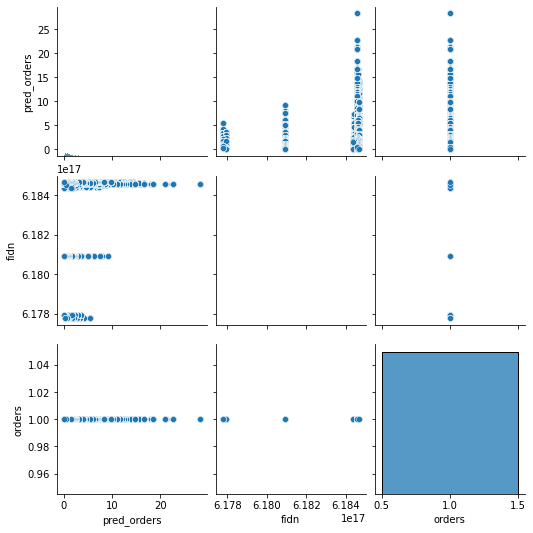

In [418]:
# importing packages
import seaborn
import pandas
 
# load the csv

 
# pairplot
seaborn.pairplot(alrr)

In [421]:
y_true = alrr['pred_orders']  
y_pred = alrr['orders'] 

In [423]:
!pip install permetrics


You should consider upgrading via the 'D:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [432]:
from numpy import array
from permetrics.regression import Metrics

## 1-D array
y_true1 = y_true.to_numpy()
y_pred1 = y_pred.to_numpy()
obj1 = Metrics(y_true1, y_pred1)
print(obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5))

## > 1-D array


multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
    print(obj2.mean_arctangent_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))

0.69743
0.69743
0.69743
0.69743
0.69743
0.69743


In [434]:
from numpy import array
from permetrics.regression import Metrics

y_true1 = y_true.to_numpy()
y_pred1 = y_pred.to_numpy()

obj1 = Metrics(y_true1, y_pred1)
print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=5))



multi_outputs = [None, "raw_values", [0.3, 1.2], array([0.5, 0.2]), (0.1, 0.9)]
obj2 = Metrics(y_true1, y_pred1)
for multi_output in multi_outputs:
    print(obj2.symmetric_mean_absolute_percentage_error(clean=True, multi_output=multi_output, decimal=5))

0.81899
0.81899
0.81899
0.81899
0.81899
0.81899


In [420]:

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

y_true = alrr['pred_orders']  
y_pred = alrr['orders'] 
mean_absolute_percentage_error(y_true, y_pred)

172.31773378711662

In [391]:
dt1['fidn'] = dt1['fidn1']

dt2 = dt1.drop(['fidn1'], axis=1)
dt1

,pred_orders,fidn1,fid,fidn
prediction_date_m,,,,
2022-02-03 23:00:00,0.999,618461233004412927,618461233004412927,618461233004412927
2022-02-03 23:00:00,0.666,618461232492707839,618461232492707839,618461232492707839
2022-02-03 23:00:00,0.894,618460113995825151,618460113995825151,618460113995825151
2022-02-03 23:00:00,0.854,618091109430591487,618091109430591487,618091109430591487
2022-02-03 23:00:00,1.133,618464965934972927,618464965934972927,618464965934972927
...,...,...,...,...
2022-02-02 15:00:00,0.544,613955600597909503,613955600597909503,613955600597909503
2022-02-02 15:00:00,0.182,618464937073967103,618464937073967103,618464937073967103
2022-02-02 15:00:00,0.318,609447382983114751,609447382983114751,609447382983114751


In [398]:
dt

,fidn,orders
creation_date_md,,
2021-12-24 12:21:00,618460913664786431,1
2021-08-28 21:12:00,618459200109412351,1
2021-12-29 21:05:00,618464936820211711,1
2022-01-07 21:05:00,618461231294971903,1
2021-12-31 22:47:00,618464929257095167,1
...,...,...
2021-10-31 18:22:00,618461233030103039,1
2021-12-03 21:11:00,618464922658144255,1
2021-11-12 23:25:00,618464936183726079,1


In [392]:
dt2

,pred_orders,fidn
prediction_date_m,,
2022-02-03 23:00:00,0.999,618461233004412927
2022-02-03 23:00:00,0.666,618461232492707839
2022-02-03 23:00:00,0.894,618460113995825151
2022-02-03 23:00:00,0.854,618091109430591487
2022-02-03 23:00:00,1.133,618464965934972927
...,...,...
2022-02-02 15:00:00,0.544,613955600597909503
2022-02-02 15:00:00,0.182,618464937073967103
2022-02-02 15:00:00,0.318,609447382983114751


In [394]:
alrr = pd.merge(dt, dt2)

In [395]:
alrr

,fidn,orders,pred_orders
0,618459200109412351,1,0.666
1,618459200109412351,1,1.332
2,618459200109412351,1,1.221
3,618459200109412351,1,1.776
4,618459200109412351,1,1.443
...,...,...,...
1876734,618458060776013823,1,0.496
1876735,618458060776013823,1,0.124
1876736,618458060776013823,1,0.248
1876737,618458060776013823,1,0.124


In [368]:
dfqq1 = dfqq[0:100000]
dfww1 = dfww[0:100000]





In [169]:
dff = df2

dff['prediction_date'] = df2['pred_date']

C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/573451319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['prediction_date'] = df2['pred_date']


In [93]:
dfff = pd.concat([df1, df2.reindex(df1.index)], axis=1)
dfff

,creation_date,fid,pred_date,fid,prediction_date
0,2021-12-24 09:21:18.346000,89536ec9a73ffff,2022-02-03 23:00:00.000000,8953736f493ffff,2022-02-03 23:00:00.000000
1,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 23:00:00.000000,8953736d613ffff,2022-02-03 23:00:00.000000
2,2021-12-29 18:05:23.048000,8953a955133ffff,2022-02-03 23:00:00.000000,89536326a77ffff,2022-02-03 23:00:00.000000
3,2022-01-07 18:05:18.523000,89537368eafffff,2022-02-03 23:00:00.000000,893e696d86fffff,2022-02-03 23:00:00.000000
4,2021-12-31 19:47:39.692000,8953a938e67ffff,2022-02-03 23:00:00.000000,8953a9c1893ffff,2022-02-03 23:00:00.000000
...,...,...,...,...,...
6622115,2021-12-19 08:55:35.355000,89531139057ffff,NaN,NaN,NaN
6622116,2021-11-01 14:11:05.374000,8953110c17bffff,NaN,NaN,NaN
6622117,2021-09-02 16:13:46.618000,895373681d7ffff,NaN,NaN,NaN
6622118,2021-11-12 18:01:11.384000,893e696dba3ffff,NaN,NaN,NaN


In [170]:
dfg = dfff.dropna()
dfg

,pred_date,fid,prediction_date,fid1,creation_date,fid,fid1
0,2022-02-03 23:00:00.000000,6.184612e+17,2022-02-03 23:00:00.000000,6.184612e+17,2021-12-24 09:21:18.346000,6.184609e+17,6.184609e+17
1,2022-02-03 23:00:00.000000,6.184612e+17,2022-02-03 23:00:00.000000,6.184612e+17,2021-08-28 18:12:59.072000,6.184592e+17,6.184592e+17
2,2022-02-03 23:00:00.000000,6.184601e+17,2022-02-03 23:00:00.000000,6.184601e+17,2021-12-29 18:05:23.048000,6.184649e+17,6.184649e+17
3,2022-02-03 23:00:00.000000,6.180911e+17,2022-02-03 23:00:00.000000,6.180911e+17,2022-01-07 18:05:18.523000,6.184612e+17,6.184612e+17
4,2022-02-03 23:00:00.000000,6.184650e+17,2022-02-03 23:00:00.000000,6.184650e+17,2021-12-31 19:47:39.692000,6.184649e+17,6.184649e+17
...,...,...,...,...,...,...,...
995,2022-02-03 23:00:00.000000,6.139613e+17,2022-02-03 23:00:00.000000,6.139613e+17,2022-01-09 10:30:48.952000,6.184612e+17,6.184612e+17
996,2022-02-03 23:00:00.000000,6.094540e+17,2022-02-03 23:00:00.000000,6.094540e+17,2021-09-09 11:49:19.505000,6.184649e+17,6.184649e+17
997,2022-02-03 23:00:00.000000,6.139613e+17,2022-02-03 23:00:00.000000,6.139613e+17,2021-08-06 18:51:24.324000,6.184581e+17,6.184581e+17
998,2022-02-03 23:00:00.000000,6.094469e+17,2022-02-03 23:00:00.000000,6.094469e+17,2021-08-25 10:10:35.332000,6.184650e+17,6.184650e+17


In [171]:
resg = df1['fid'].apply(int, base=16)
resg

0          618460913664786431
1          618459200109412351
2          618464936820211711
3          618461231294971903
4          618464929257095167
                  ...        
6622115    618454483929137151
6622116    618454471868678143
6622117    618461231079489535
6622118    618091109484331007
6622119    618464936134180863
Name: fid, Length: 6622120, dtype: int64

In [172]:
resg2 = df2['fid'].apply(int, base=16)
resg2

0          618461233004412927
1          618461232492707839
2          618460113995825151
3          618091109430591487
4          618464965934972927
                  ...        
4117395    618464937407676415
4117396    618460114007883775
4117397    618459117547683839
4117398    618461232681189375
4117399    618456287856820223
Name: fid, Length: 4117400, dtype: int64

In [174]:
df11= df1
df11.loc['fid1'] = resg
df1111 = df11
df22 = df2
df22.loc['fid2'] = resg2
df2222 = df22

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [144]:
import pandas as pd

In [176]:

resgg = df2222[0:1000]
resgg2 = df1111[0:1000]
dfff = pd.concat([resgg, resgg2.reindex(resg.index)], axis=1)
dfff

,pred_date,fid,prediction_date,creation_date,fid
0,2022-02-03 23:00:00.000000,8953736f493ffff,2022-02-03 23:00:00.000000,2021-12-24 09:21:18.346000,89536ec9a73ffff
1,2022-02-03 23:00:00.000000,8953736d613ffff,2022-02-03 23:00:00.000000,2021-08-28 18:12:59.072000,895355da297ffff
2,2022-02-03 23:00:00.000000,89536326a77ffff,2022-02-03 23:00:00.000000,2021-12-29 18:05:23.048000,8953a955133ffff
3,2022-02-03 23:00:00.000000,893e696d86fffff,2022-02-03 23:00:00.000000,2022-01-07 18:05:18.523000,89537368eafffff
4,2022-02-03 23:00:00.000000,8953a9c1893ffff,2022-02-03 23:00:00.000000,2021-12-31 19:47:39.692000,8953a938e67ffff
...,...,...,...,...,...
6622115,NaN,NaN,NaN,NaN,NaN
6622116,NaN,NaN,NaN,NaN,NaN
6622117,NaN,NaN,NaN,NaN,NaN
6622118,NaN,NaN,NaN,NaN,NaN


In [184]:
r = df1.set_index(['creation_date'])
q = df2.set_index(['pred_date'])

r = r.dropna()
q = q.dropna()


,fid
creation_date,
2021-12-24 09:21:18.346000,89536ec9a73ffff
2021-08-28 18:12:59.072000,895355da297ffff
2021-12-29 18:05:23.048000,8953a955133ffff
2022-01-07 18:05:18.523000,89537368eafffff
2021-12-31 19:47:39.692000,8953a938e67ffff
...,...
2021-12-19 08:55:35.355000,89531139057ffff
2021-11-01 14:11:05.374000,8953110c17bffff
2021-09-02 16:13:46.618000,895373681d7ffff


In [186]:
q

,fid,prediction_date
pred_date,,
2022-02-03 23:00:00.000000,8953736f493ffff,2022-02-03 23:00:00.000000
2022-02-03 23:00:00.000000,8953736d613ffff,2022-02-03 23:00:00.000000
2022-02-03 23:00:00.000000,89536326a77ffff,2022-02-03 23:00:00.000000
2022-02-03 23:00:00.000000,893e696d86fffff,2022-02-03 23:00:00.000000
2022-02-03 23:00:00.000000,8953a9c1893ffff,2022-02-03 23:00:00.000000
...,...,...
2021-12-11 02:00:00.000000,8953a957437ffff,2021-12-11 02:00:00.000000
2021-12-11 02:00:00.000000,89536326b2fffff,2021-12-11 02:00:00.000000
2021-12-11 02:00:00.000000,895354a6987ffff,2021-12-11 02:00:00.000000


In [193]:
#qd = q.drop('prediction_date',axis='columns', inplace=True)
q

,fid
pred_date,
2022-02-03 23:00:00.000000,8953736f493ffff
2022-02-03 23:00:00.000000,8953736d613ffff
2022-02-03 23:00:00.000000,89536326a77ffff
2022-02-03 23:00:00.000000,893e696d86fffff
2022-02-03 23:00:00.000000,8953a9c1893ffff
...,...
2021-12-11 02:00:00.000000,8953a957437ffff
2021-12-11 02:00:00.000000,89536326b2fffff
2021-12-11 02:00:00.000000,895354a6987ffff


In [195]:
r

,fid
creation_date,
2021-12-24 09:21:18.346000,89536ec9a73ffff
2021-08-28 18:12:59.072000,895355da297ffff
2021-12-29 18:05:23.048000,8953a955133ffff
2022-01-07 18:05:18.523000,89537368eafffff
2021-12-31 19:47:39.692000,8953a938e67ffff
...,...
2021-12-19 08:55:35.355000,89531139057ffff
2021-11-01 14:11:05.374000,8953110c17bffff
2021-09-02 16:13:46.618000,895373681d7ffff


In [261]:
dff1 = df1[0:100000]
dff2 = df2[0:100000]


In [262]:
inner_merged_total = pd.merge(dff1, dff2)
inner_merged_total = inner_merged_total.dropna()
inner_merged_total = inner_merged_total.drop('pred_date', 1)

C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/1643935686.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  inner_merged_total = inner_merged_total.drop('pred_date', 1)


In [263]:
inner_merged_total

,creation_date,fid,prediction_date
0,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 23:00:00.000000
1,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 22:00:00.000000
2,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 21:00:00.000000
3,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 20:00:00.000000
4,2021-08-28 18:12:59.072000,895355da297ffff,2022-02-03 19:00:00.000000
...,...,...,...
1876734,2021-12-31 19:31:39.633000,89534545d07ffff,2022-02-02 22:00:00.000000
1876735,2021-12-31 19:31:39.633000,89534545d07ffff,2022-02-02 21:00:00.000000
1876736,2021-12-31 19:31:39.633000,89534545d07ffff,2022-02-02 20:00:00.000000
1876737,2021-12-31 19:31:39.633000,89534545d07ffff,2022-02-02 19:00:00.000000


In [264]:
inner_merged_total['fidn'] = inner_merged_total['fid'].apply(int, base=16)
inner_merged_total1 = inner_merged_total.drop('fid',1)
inner_merged_total1

C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/1492261691.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  inner_merged_total1 = inner_merged_total.drop('fid',1)


,creation_date,prediction_date,fidn
0,2021-08-28 18:12:59.072000,2022-02-03 23:00:00.000000,618459200109412351
1,2021-08-28 18:12:59.072000,2022-02-03 22:00:00.000000,618459200109412351
2,2021-08-28 18:12:59.072000,2022-02-03 21:00:00.000000,618459200109412351
3,2021-08-28 18:12:59.072000,2022-02-03 20:00:00.000000,618459200109412351
4,2021-08-28 18:12:59.072000,2022-02-03 19:00:00.000000,618459200109412351
...,...,...,...
1876734,2021-12-31 19:31:39.633000,2022-02-02 22:00:00.000000,618458060776013823
1876735,2021-12-31 19:31:39.633000,2022-02-02 21:00:00.000000,618458060776013823
1876736,2021-12-31 19:31:39.633000,2022-02-02 20:00:00.000000,618458060776013823
1876737,2021-12-31 19:31:39.633000,2022-02-02 19:00:00.000000,618458060776013823


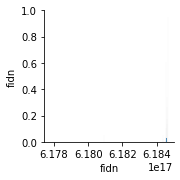

In [221]:
# importing packages
import seaborn
import pandas
 
# load the csv

 
# pairplot
seaborn.pairplot(inner_merged_total1)

In [268]:
it = inner_merged_total1

In [269]:
itt = pd.to_datetime(it['creation_date'])
itt

0         2021-08-28 18:12:59.072
1         2021-08-28 18:12:59.072
2         2021-08-28 18:12:59.072
3         2021-08-28 18:12:59.072
4         2021-08-28 18:12:59.072
                    ...          
1876734   2021-12-31 19:31:39.633
1876735   2021-12-31 19:31:39.633
1876736   2021-12-31 19:31:39.633
1876737   2021-12-31 19:31:39.633
1876738   2021-12-31 19:31:39.633
Name: creation_date, Length: 1876739, dtype: datetime64[ns]

In [270]:
ittt = pd.to_datetime(it['prediction_date'])
ittt

0         2022-02-03 23:00:00
1         2022-02-03 22:00:00
2         2022-02-03 21:00:00
3         2022-02-03 20:00:00
4         2022-02-03 19:00:00
                  ...        
1876734   2022-02-02 22:00:00
1876735   2022-02-02 21:00:00
1876736   2022-02-02 20:00:00
1876737   2022-02-02 19:00:00
1876738   2022-02-02 17:00:00
Name: prediction_date, Length: 1876739, dtype: datetime64[ns]

In [271]:
it['creation_date'] = itt
it['prediction_date'] = ittt
it

,creation_date,prediction_date,fidn
0,2021-08-28 18:12:59.072,2022-02-03 23:00:00,618459200109412351
1,2021-08-28 18:12:59.072,2022-02-03 22:00:00,618459200109412351
2,2021-08-28 18:12:59.072,2022-02-03 21:00:00,618459200109412351
3,2021-08-28 18:12:59.072,2022-02-03 20:00:00,618459200109412351
4,2021-08-28 18:12:59.072,2022-02-03 19:00:00,618459200109412351
...,...,...,...
1876734,2021-12-31 19:31:39.633,2022-02-02 22:00:00,618458060776013823
1876735,2021-12-31 19:31:39.633,2022-02-02 21:00:00,618458060776013823
1876736,2021-12-31 19:31:39.633,2022-02-02 20:00:00,618458060776013823
1876737,2021-12-31 19:31:39.633,2022-02-02 19:00:00,618458060776013823


In [285]:
tm = pd.to_numeric(it.creation_date)
tm

0          1630174379072000000
1          1630174379072000000
2          1630174379072000000
3          1630174379072000000
4          1630174379072000000
                  ...         
1876734    1640979099633000000
1876735    1640979099633000000
1876736    1640979099633000000
1876737    1640979099633000000
1876738    1640979099633000000
Name: creation_date, Length: 1876739, dtype: int64

In [286]:
tm2 = pd.to_numeric(it.prediction_date)
tm2

0          1643929200000000000
1          1643925600000000000
2          1643922000000000000
3          1643918400000000000
4          1643914800000000000
                  ...         
1876734    1643839200000000000
1876735    1643835600000000000
1876736    1643832000000000000
1876737    1643828400000000000
1876738    1643821200000000000
Name: prediction_date, Length: 1876739, dtype: int64

In [288]:
it['creation_date1'] = it['creation_date'].astype('datetime64[s]')
it['prediction_date1'] = it['prediction_date'].astype('datetime64[s]')
it

,creation_date,prediction_date,fidn,creation_date1,prediction_date1,creation_daten,prediction_daten
0,2021-08-28 18:12:59.072,2022-02-03 23:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 23:00:00,1630174379000000000,1630174379000000000
1,2021-08-28 18:12:59.072,2022-02-03 22:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 22:00:00,1630174379000000000,1630174379000000000
2,2021-08-28 18:12:59.072,2022-02-03 21:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 21:00:00,1630174379000000000,1630174379000000000
3,2021-08-28 18:12:59.072,2022-02-03 20:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 20:00:00,1630174379000000000,1630174379000000000
4,2021-08-28 18:12:59.072,2022-02-03 19:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 19:00:00,1630174379000000000,1630174379000000000
...,...,...,...,...,...,...,...
1876734,2021-12-31 19:31:39.633,2022-02-02 22:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 22:00:00,1640979099000000000,1640979099000000000
1876735,2021-12-31 19:31:39.633,2022-02-02 21:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 21:00:00,1640979099000000000,1640979099000000000
1876736,2021-12-31 19:31:39.633,2022-02-02 20:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 20:00:00,1640979099000000000,1640979099000000000
1876737,2021-12-31 19:31:39.633,2022-02-02 19:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 19:00:00,1640979099000000000,1640979099000000000


In [289]:
it['creation_daten'] = pd.to_numeric(it.creation_date1)
it['prediction_daten'] = pd.to_numeric(it.prediction_date1)
it

,creation_date,prediction_date,fidn,creation_date1,prediction_date1,creation_daten,prediction_daten
0,2021-08-28 18:12:59.072,2022-02-03 23:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 23:00:00,1630174379000000000,1643929200000000000
1,2021-08-28 18:12:59.072,2022-02-03 22:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 22:00:00,1630174379000000000,1643925600000000000
2,2021-08-28 18:12:59.072,2022-02-03 21:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 21:00:00,1630174379000000000,1643922000000000000
3,2021-08-28 18:12:59.072,2022-02-03 20:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 20:00:00,1630174379000000000,1643918400000000000
4,2021-08-28 18:12:59.072,2022-02-03 19:00:00,618459200109412351,2021-08-28 18:12:59,2022-02-03 19:00:00,1630174379000000000,1643914800000000000
...,...,...,...,...,...,...,...
1876734,2021-12-31 19:31:39.633,2022-02-02 22:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 22:00:00,1640979099000000000,1643839200000000000
1876735,2021-12-31 19:31:39.633,2022-02-02 21:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 21:00:00,1640979099000000000,1643835600000000000
1876736,2021-12-31 19:31:39.633,2022-02-02 20:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 20:00:00,1640979099000000000,1643832000000000000
1876737,2021-12-31 19:31:39.633,2022-02-02 19:00:00,618458060776013823,2021-12-31 19:31:39,2022-02-02 19:00:00,1640979099000000000,1643828400000000000


In [290]:
pp = ['fidn','creation_daten','prediction_daten']
itpp = it[pp]
itpp

,fidn,creation_daten,prediction_daten
0,618459200109412351,1630174379000000000,1643929200000000000
1,618459200109412351,1630174379000000000,1643925600000000000
2,618459200109412351,1630174379000000000,1643922000000000000
3,618459200109412351,1630174379000000000,1643918400000000000
4,618459200109412351,1630174379000000000,1643914800000000000
...,...,...,...
1876734,618458060776013823,1640979099000000000,1643839200000000000
1876735,618458060776013823,1640979099000000000,1643835600000000000
1876736,618458060776013823,1640979099000000000,1643832000000000000
1876737,618458060776013823,1640979099000000000,1643828400000000000


In [295]:
itpp['cs'] = itpp['creation_daten']/1000000000000
itpp['ps'] = itpp['prediction_daten']/1000000000000

C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/4054949137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itpp['cs'] = itpp['creation_daten']/1000000000000
C:\Users\mucle\AppData\Local\Temp/ipykernel_26728/4054949137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itpp['ps'] = itpp['prediction_daten']/1000000000000


In [296]:
itpp['ps']

0          1643929.2
1          1643925.6
2          1643922.0
3          1643918.4
4          1643914.8
             ...    
1876734    1643839.2
1876735    1643835.6
1876736    1643832.0
1876737    1643828.4
1876738    1643821.2
Name: ps, Length: 1876739, dtype: float64

In [298]:
q = ['ps','cs','fidn']
data = itpp[q]

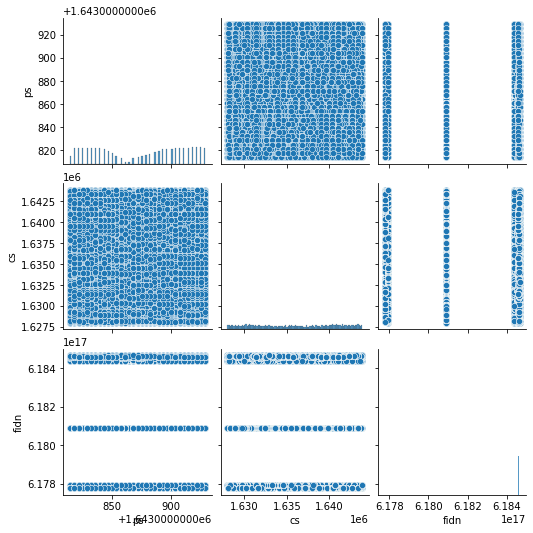

In [299]:
# importing packages
import seaborn
import pandas
 
# load the csv

 
# pairplot
seaborn.pairplot(data)

In [317]:
data['pss'] = data['ps']/10000
data['css'] = data['cs']/10000
data['fidn'] = data['fidn']/1000000000000000
data

,ps,cs,fidn,pss,css
0,1643929.2,1630174.379,6.184592e-10,164.39292,163.017438
1,1643925.6,1630174.379,6.184592e-10,164.39256,163.017438
2,1643922.0,1630174.379,6.184592e-10,164.39220,163.017438
3,1643918.4,1630174.379,6.184592e-10,164.39184,163.017438
4,1643914.8,1630174.379,6.184592e-10,164.39148,163.017438
...,...,...,...,...,...
1876734,1643839.2,1640979.099,6.184581e-10,164.38392,164.097910
1876735,1643835.6,1640979.099,6.184581e-10,164.38356,164.097910
1876736,1643832.0,1640979.099,6.184581e-10,164.38320,164.097910
1876737,1643828.4,1640979.099,6.184581e-10,164.38284,164.097910


In [318]:
dd = ['fidn','pss','css']
ff = data[dd]


In [302]:
gg = data.groupby('fidn')
gg

In [325]:
jj = df['pred_orders']
jj = jj[0:1876738]
jj

0          0.999
1          0.666
2          0.894
3          0.854
4          1.133
           ...  
1876733    0.000
1876734    0.000
1876735    0.000
1876736    0.000
1876737    0.000
Name: pred_orders, Length: 1876738, dtype: float64

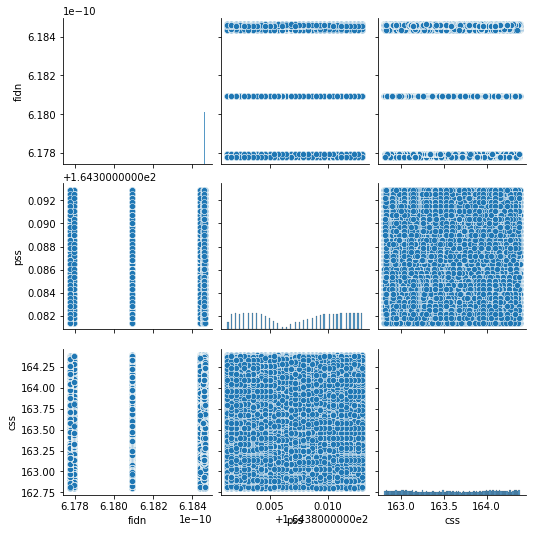

In [319]:
sns.pairplot(ff)

In [309]:


def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

y_true = ff['pss']  
y_pred = ff['css'] 
mean_absolute_percentage_error(y_true, y_pred)

In [311]:
y_true = ff['pss']  
y_pred = ff['css'] 
mean_absolute_percentage_error(y_true, y_pred)

0.4766538312990884

In [314]:
def mean_absolute_percentage_error1(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [315]:
mean_absolute_percentage_error(y_true, y_pred)

0.4766538312990884

In [321]:
ff[100000:1000100]

,fidn,pss,css
100000,6.184650e-10,164.38896,164.105668
100001,6.184650e-10,164.38860,164.105668
100002,6.184650e-10,164.38608,164.105668
100003,6.184650e-10,164.38572,164.105668
100004,6.184650e-10,164.38536,164.105668
...,...,...,...
1000095,6.184571e-10,164.38500,164.138809
1000096,6.184571e-10,164.38464,164.138809
1000097,6.184571e-10,164.38428,164.138809
1000098,6.184571e-10,164.38392,164.138809


In [281]:
itpp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fidn,1876739.0,6.184505e+17,6.260178e+13,6.177775e+17,6.184545e+17,6.184609e+17,6.184649e+17,6.184650e+17
creation_daten,1876739.0,1.636038e+18,4.777442e+15,1.628004e+18,1.631626e+18,1.636065e+18,1.640381e+18,1.643872e+18
prediction_daten,1876739.0,1.636038e+18,4.777442e+15,1.628004e+18,1.631626e+18,1.636065e+18,1.640381e+18,1.643872e+18


In [ ]:
it['Time'] = it['creation_date'].astype('datetime64[s]')

In [222]:
it = inner_merged_total1

In [162]:
f = ['prediction_date','creation_date']
g = dfff[f]
g
h = 

,prediction_date,creation_date
0,2022-02-03 23:00:00.000000,2021-12-24 09:21:18.346000
1,2022-02-03 23:00:00.000000,2021-08-28 18:12:59.072000
2,2022-02-03 23:00:00.000000,2021-12-29 18:05:23.048000
3,2022-02-03 23:00:00.000000,2022-01-07 18:05:18.523000
4,2022-02-03 23:00:00.000000,2021-12-31 19:47:39.692000
...,...,...
995,2022-02-03 23:00:00.000000,2022-01-09 10:30:48.952000
996,2022-02-03 23:00:00.000000,2021-09-09 11:49:19.505000
997,2022-02-03 23:00:00.000000,2021-08-06 18:51:24.324000
998,2022-02-03 23:00:00.000000,2021-08-25 10:10:35.332000


In [114]:
s = dfff['fid']

In [122]:
dfg1 = dfg.apply(pd.to_numeric, errors='coerce')

print(dfg1)

         creation_date  fid  pred_date  fid  prediction_date
0                  NaN  NaN        NaN  NaN              NaN
1                  NaN  NaN        NaN  NaN              NaN
2                  NaN  NaN        NaN  NaN              NaN
3                  NaN  NaN        NaN  NaN              NaN
4                  NaN  NaN        NaN  NaN              NaN
...                ...  ...        ...  ...              ...
4117395            NaN  NaN        NaN  NaN              NaN
4117396            NaN  NaN        NaN  NaN              NaN
4117397            NaN  NaN        NaN  NaN              NaN
4117398            NaN  NaN        NaN  NaN              NaN
4117399            NaN  NaN        NaN  NaN              NaN

[4117400 rows x 5 columns]


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle

data = dfff

a = dfff['creation_date']
b = dfff['pred_date']
c = df1['fid']
d = df2['fid'] 

d

0          8953736f493ffff
1          8953736d613ffff
2          89536326a77ffff
3          893e696d86fffff
4          8953a9c1893ffff
                ...       
4117395    8953a957437ffff
4117396    89536326b2fffff
4117397    895354a6987ffff
4117398    8953736e14fffff
4117399    89532b792cfffff
Name: fid, Length: 4117400, dtype: object

In [69]:
counts = dfh3.groupby(['orders']).orders.agg('count').to_frame('count').reset_index()
counts

,orders,count
0,0,12765
1,892c905552fffff,10
2,892c9055533ffff,12
3,892c90555bbffff,3
4,892c960894fffff,860
...,...,...
14308,8953a9cf6b3ffff,8
14309,8953a9cf6c3ffff,15
14310,8953a9d8b37ffff,1
14311,8953a9d8b8fffff,1


In [ ]:
counts = dfh3.groupby(['orders']).orders.agg('count').to_frame('count').reset_index()

In [22]:
import geopandas as gpd
from h3 import h3
incidents = 

In [ ]:
h3_level = 3
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.geometry.y, row.geometry.x, h3_level)
 
incidents['h3'] = incidents.apply(lat_lng_to_h3, axis=1)

In [24]:
import h3.api.numpy_int as h3

In [27]:
import h3.api.basic_str as h3

In [ ]:
APERTURE_SIZE = 9
hex_col = 'hex'+str(APERTURE_SIZE)

# find hexs containing the points
df311[hex_col] = df311.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,APERTURE_SIZE),1)

# aggregate the points
df311g = df311.groupby(hex_col).size().to_frame('cnt').reset_index()

#find center of hex for visualization
df311g['lat'] = df311g[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
df311g['lng'] = df311g[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# pltot the hexs
plot_scatter(df311g, metric_col='cnt', marker='o',figsize=(17,15))
plt.title('hex-grid: noise complaints');